In [42]:
# carregando os dados
file_names_normal = ['normal_0.mat', 'normal_1.mat', 'normal_2.mat', 'normal_3.mat']
file_names_12k = ['b021_3.mat', 'ir021_0.mat', 'ir021_3.mat', 'or021_3_0.mat', 'or021_3_3.mat', 
                 'or021_3_0.mat', 'or021_3_3.mat', 'or021_6_0.mat', 'or021_6_3.mat', 'or021_12_0.mat', 'or021_12_3.mat']

def load_data(file_names):
    
    import scipy.io    
    
    file_data = []
    
    for name in file_names:
        data = scipy.io.loadmat(name)  
        file_data.append(data)

    return file_data


data_normal = load_data(file_names_normal)
data_12k = load_data(file_names_12k)

# data_12k[0].keys()

dict_keys(['__header__', '__version__', '__globals__', 'X212_DE_time', 'X212_FE_time', 'X212_BA_time', 'X212RPM'])

In [76]:

def get_titles_dataset(dataset, pattern = r"X\d{3}_\w{2}_\w+"):
    
    import re
    from itertools import chain

    titles = []
    for data in dataset:
        keys = str(data.keys())
        match = re.findall(pattern, keys)
        titles.append(match)    

    return list(chain.from_iterable(titles))

In [77]:
# pegando os títulos da coluna de cada base de dados

data_titles_normal = get_titles_dataset(data_normal)
data_titles_12k = get_titles_dataset(data_12k)


In [27]:
def get_data_by_title(dataset, titles, sample_size=512):
    
    import pandas as pd       
  
    series = []
    for name in titles:
        for data in dataset:
           if name in data.keys():
               data_named = pd.Series(data[name][:sample_size].reshape(-1), name=name)
               series.append(data_named)
    
    return pd.DataFrame(series).T;

In [79]:
sample_normal = get_data_by_title(data_normal, data_titles_normal, sample_size=512)
sample_12k = get_data_by_title(data_12k, data_titles_12k, sample_size=512)

# plotando
def plot_sample(sample_data):
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    for title, data in sample_data.items():        
        plt.figure(figsize=(25,8))
        plt.scatter(np.arange(len(data)), data)
        plt.xlabel("Unidade???")
        plt.ylabel("Amplitude")
        plt.title(title)
        plt.show()


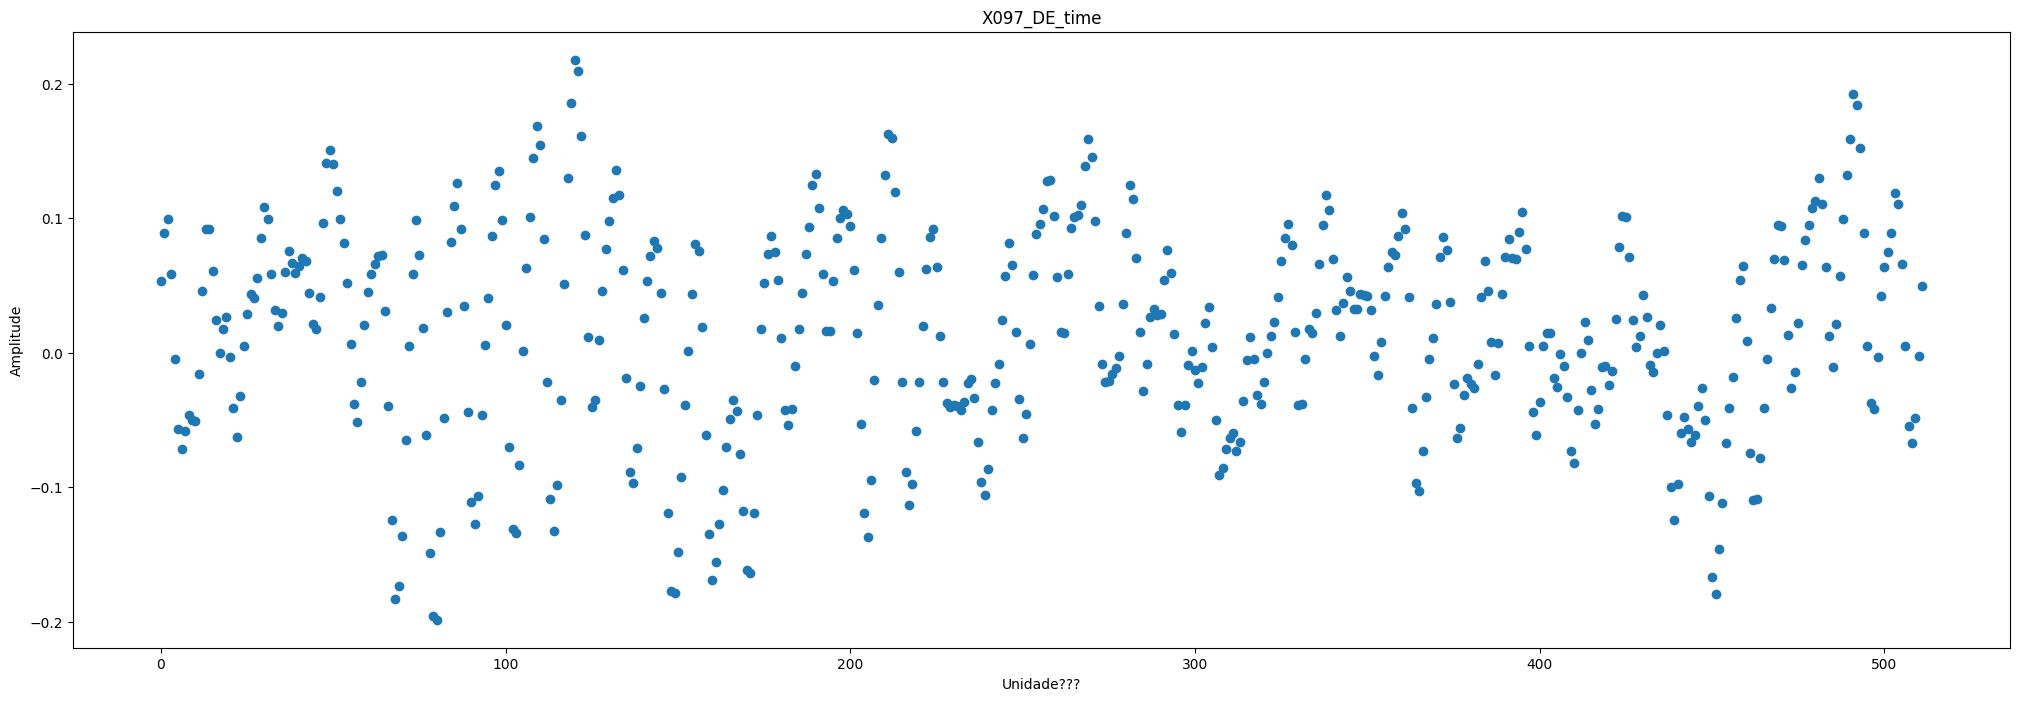

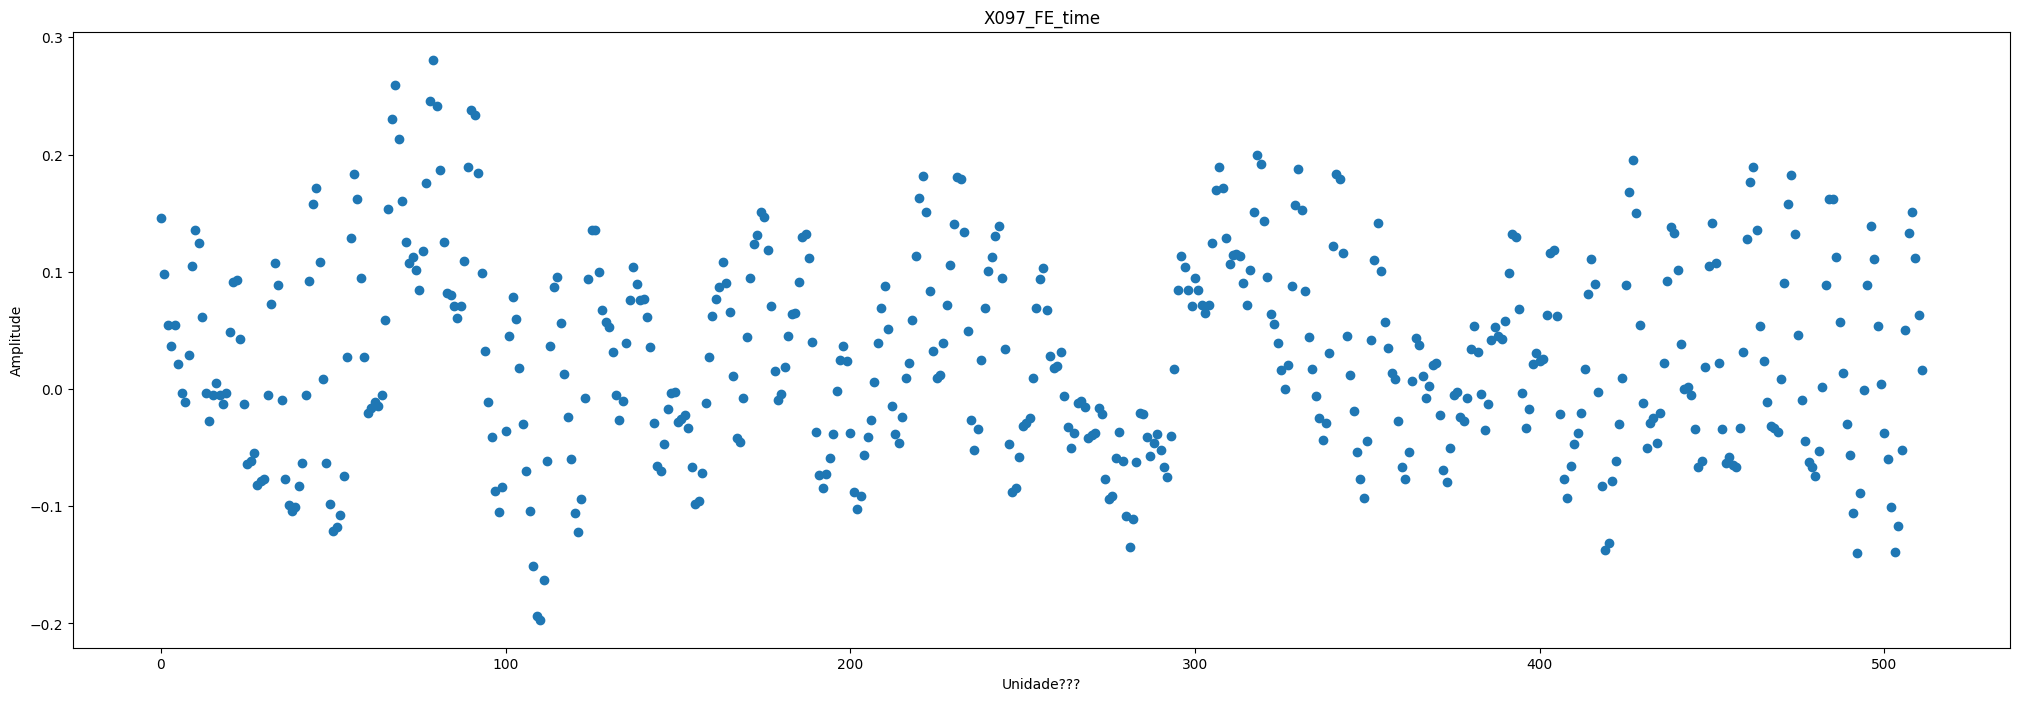

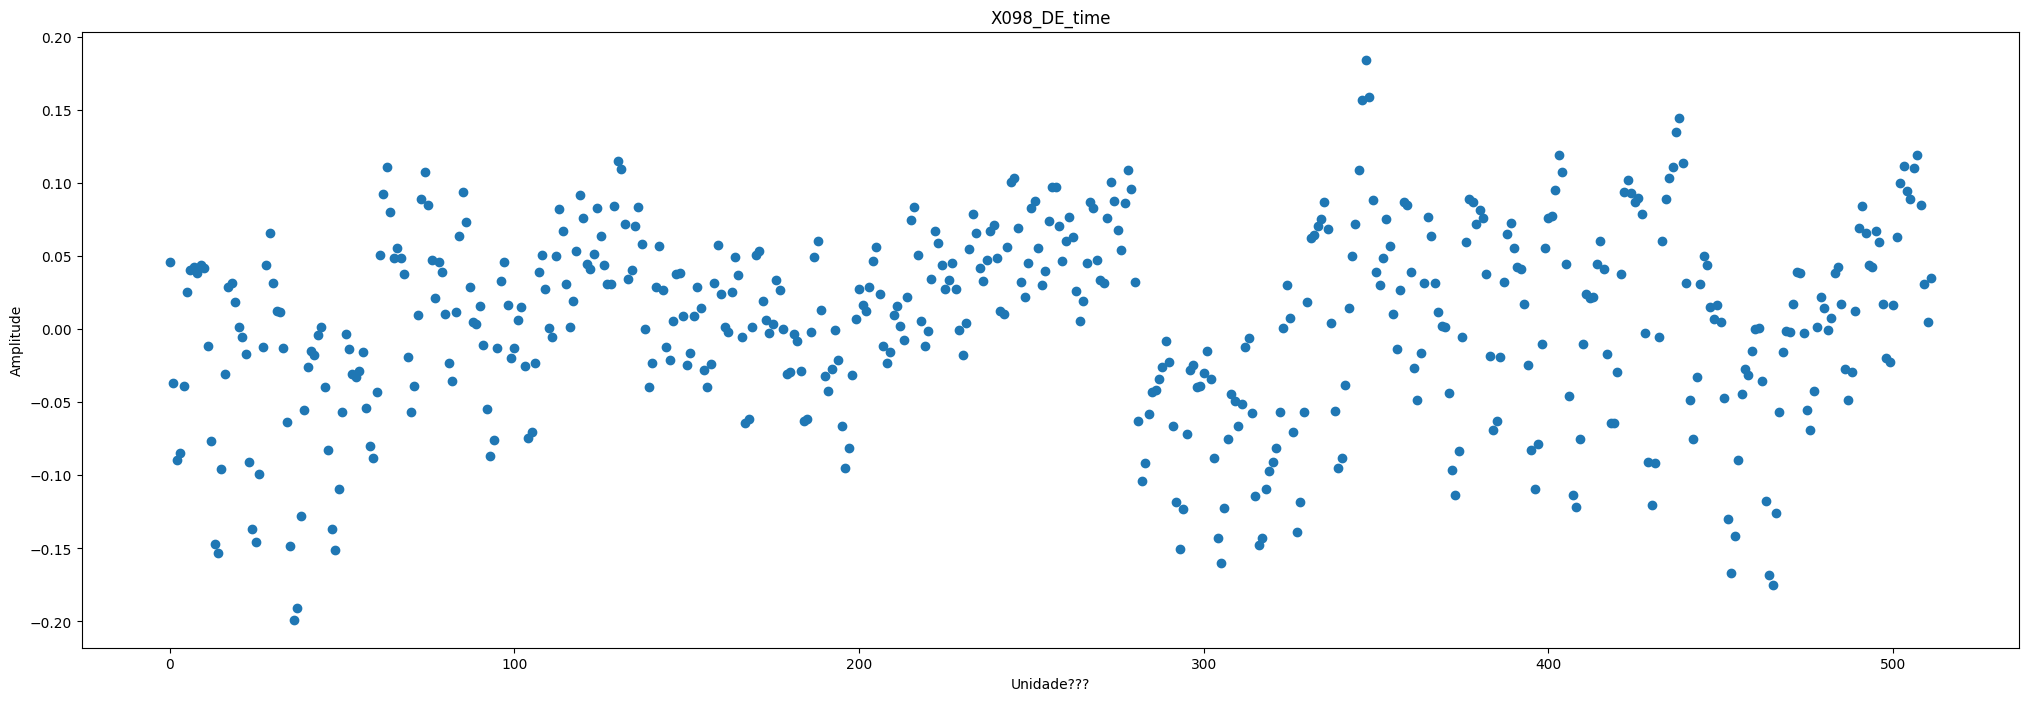

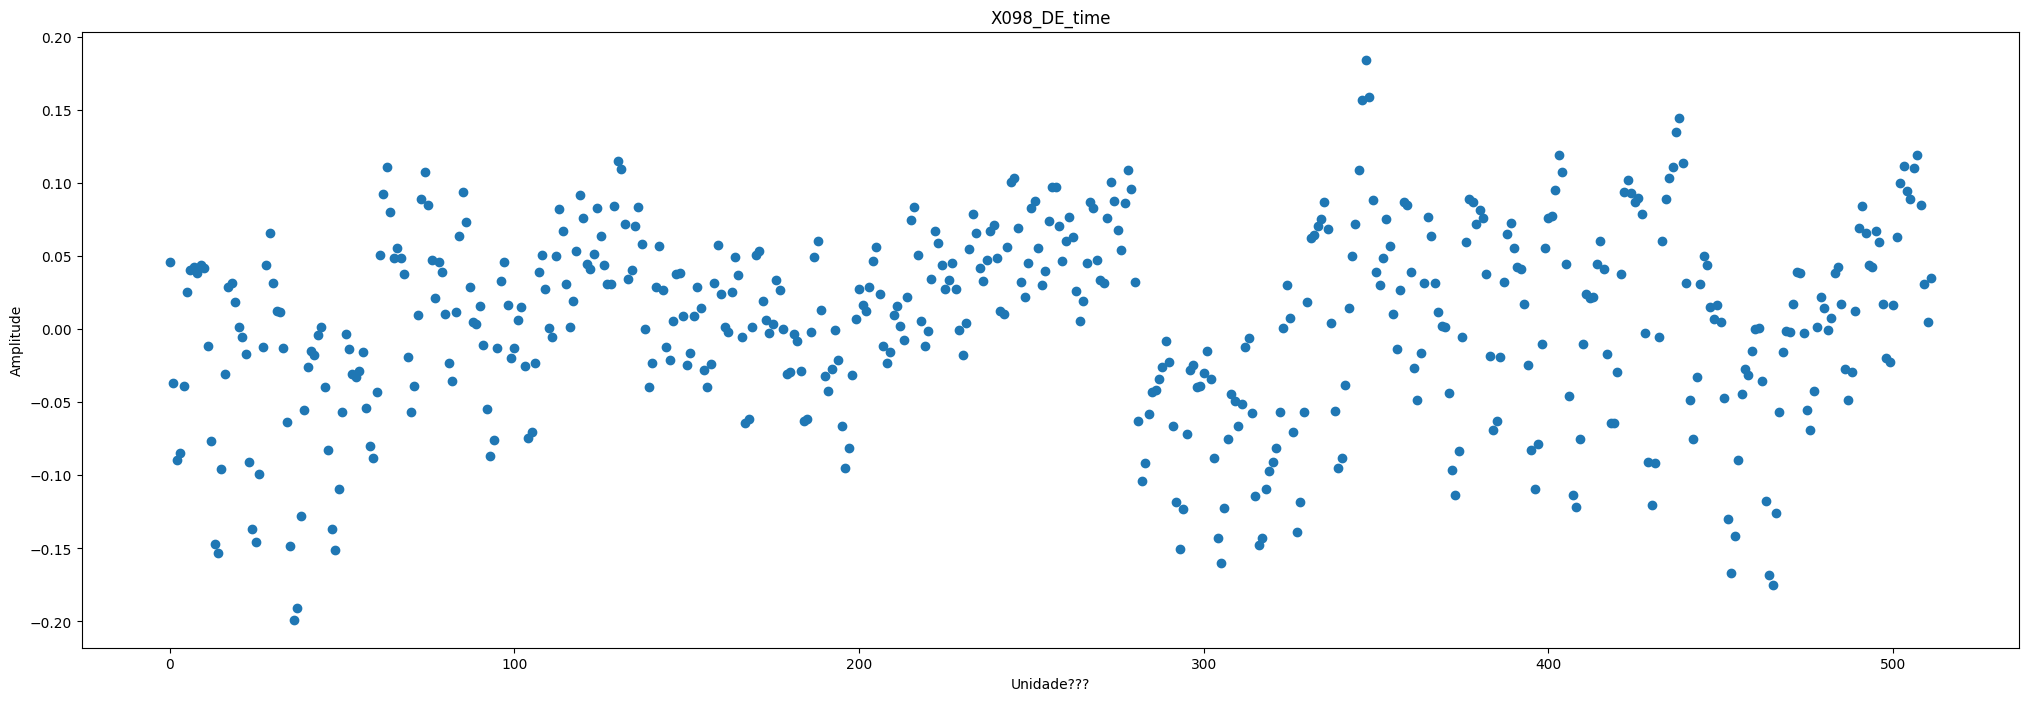

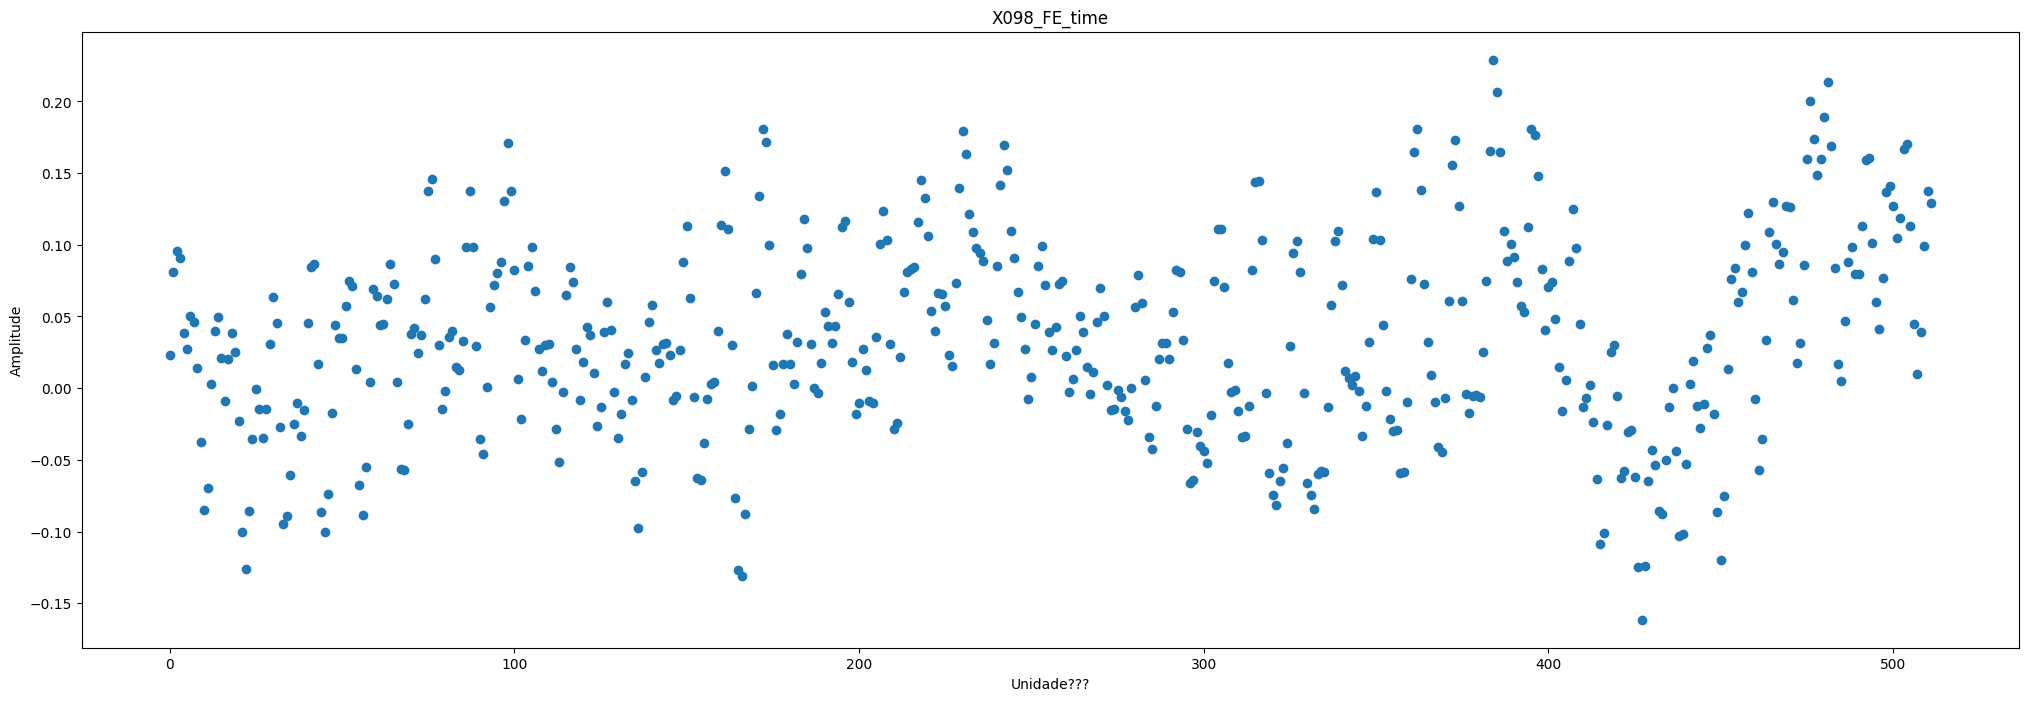

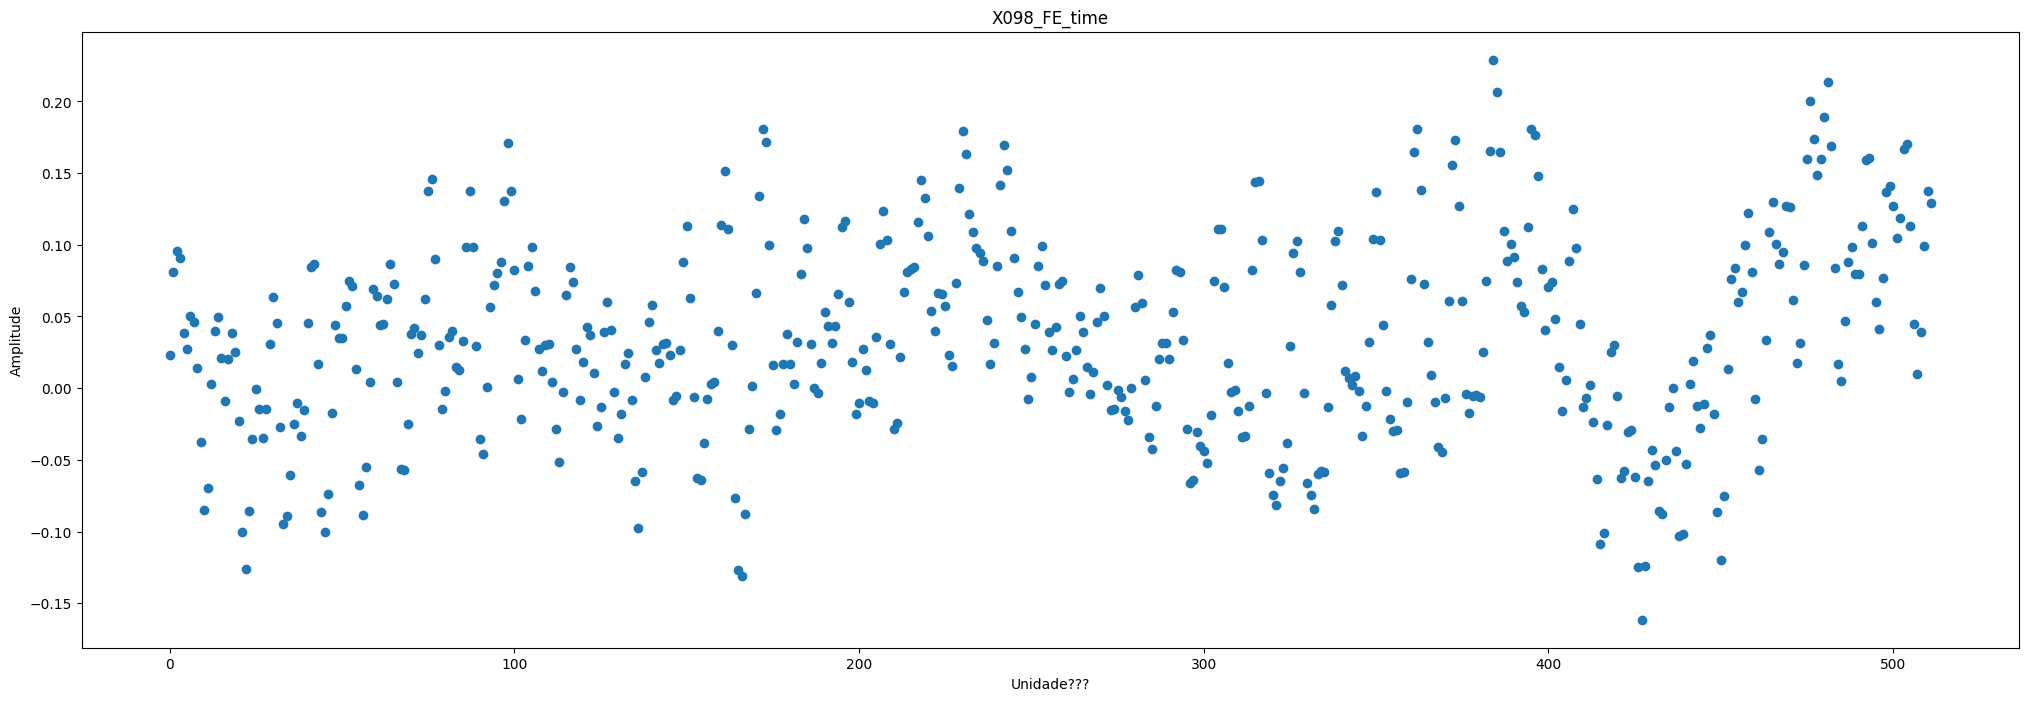

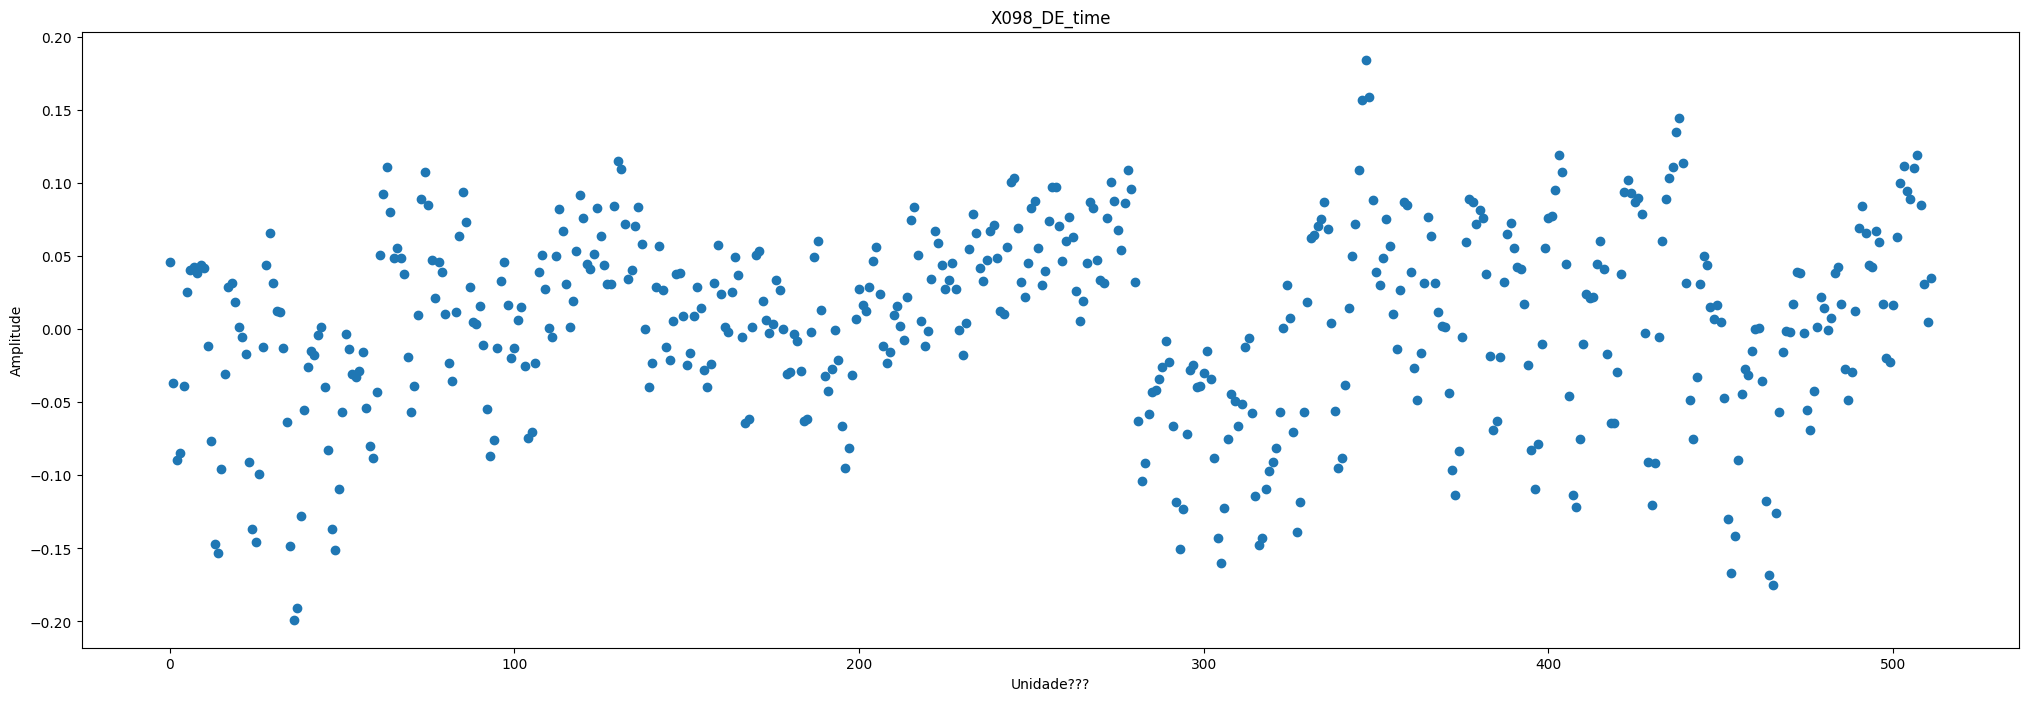

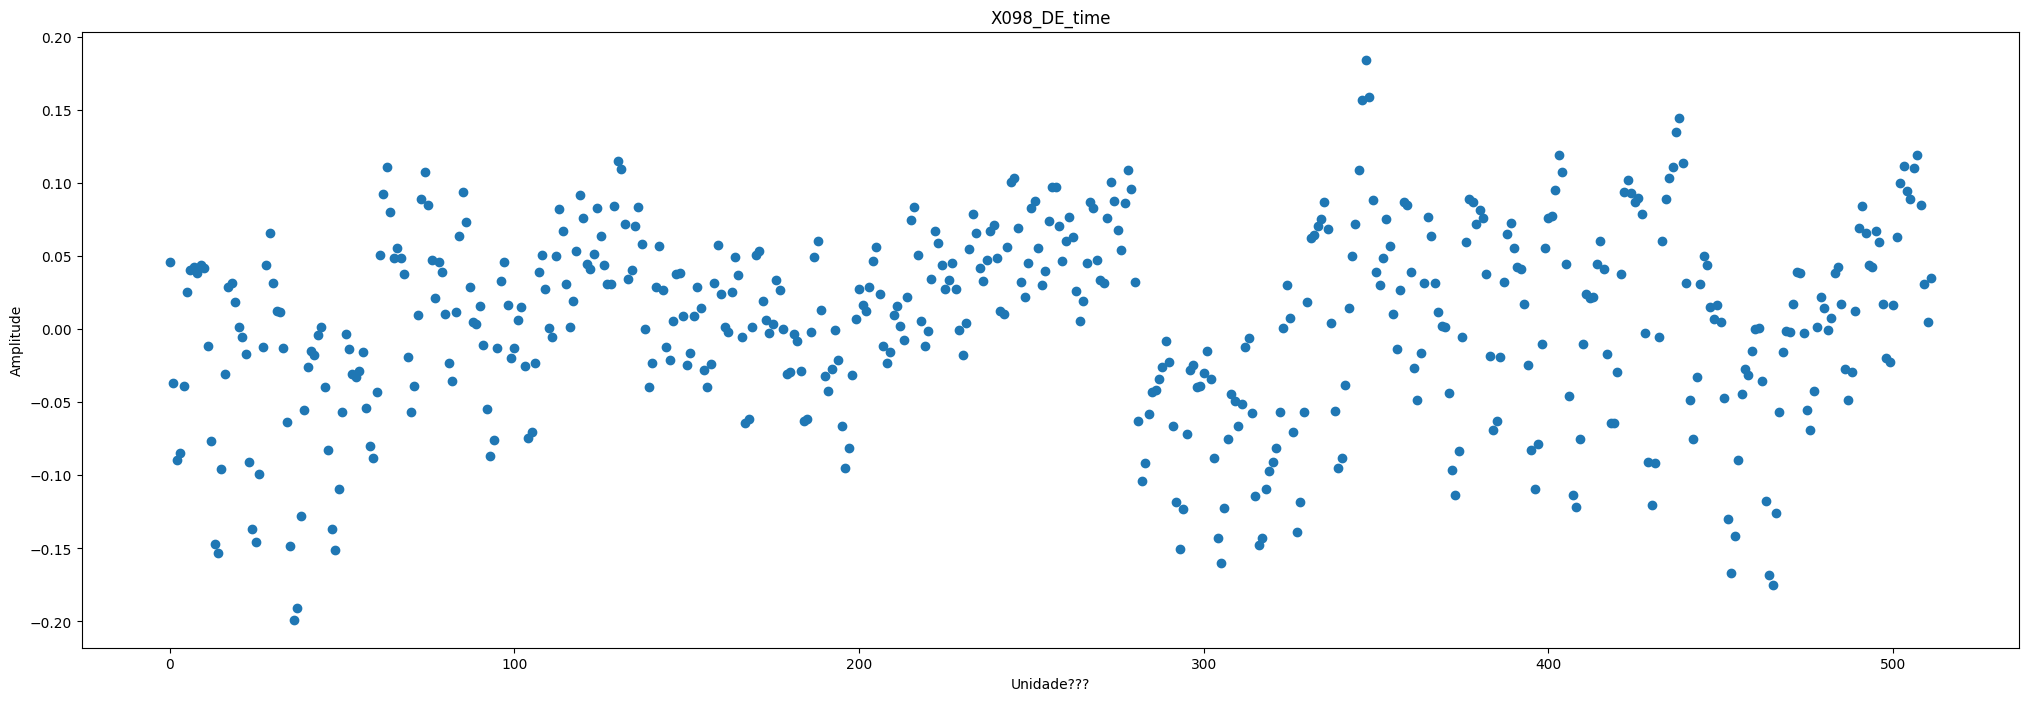

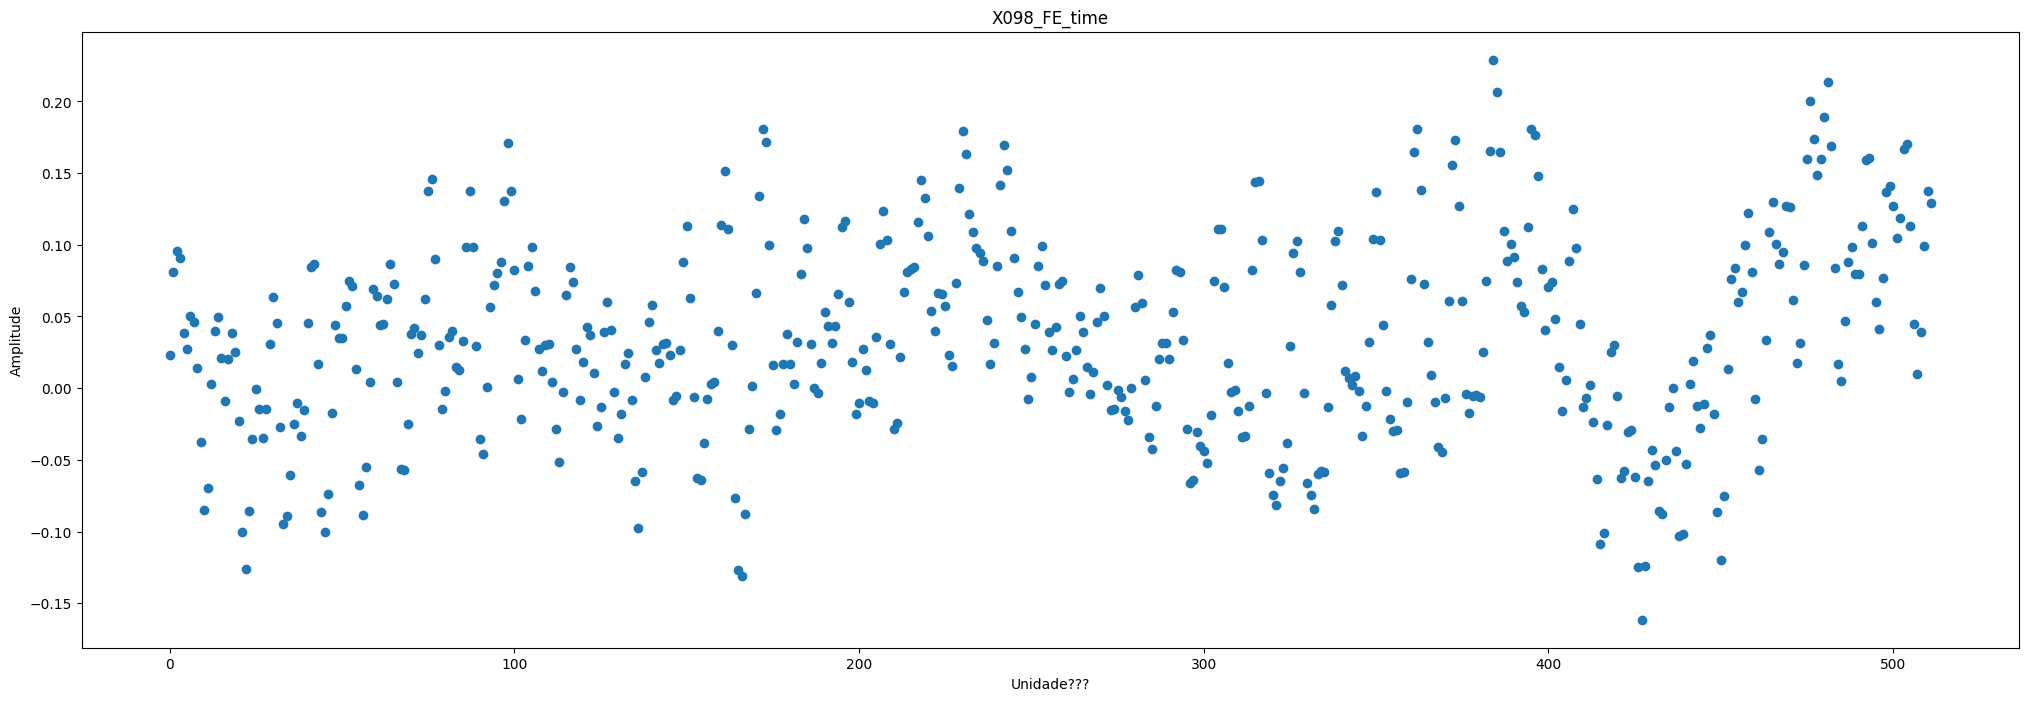

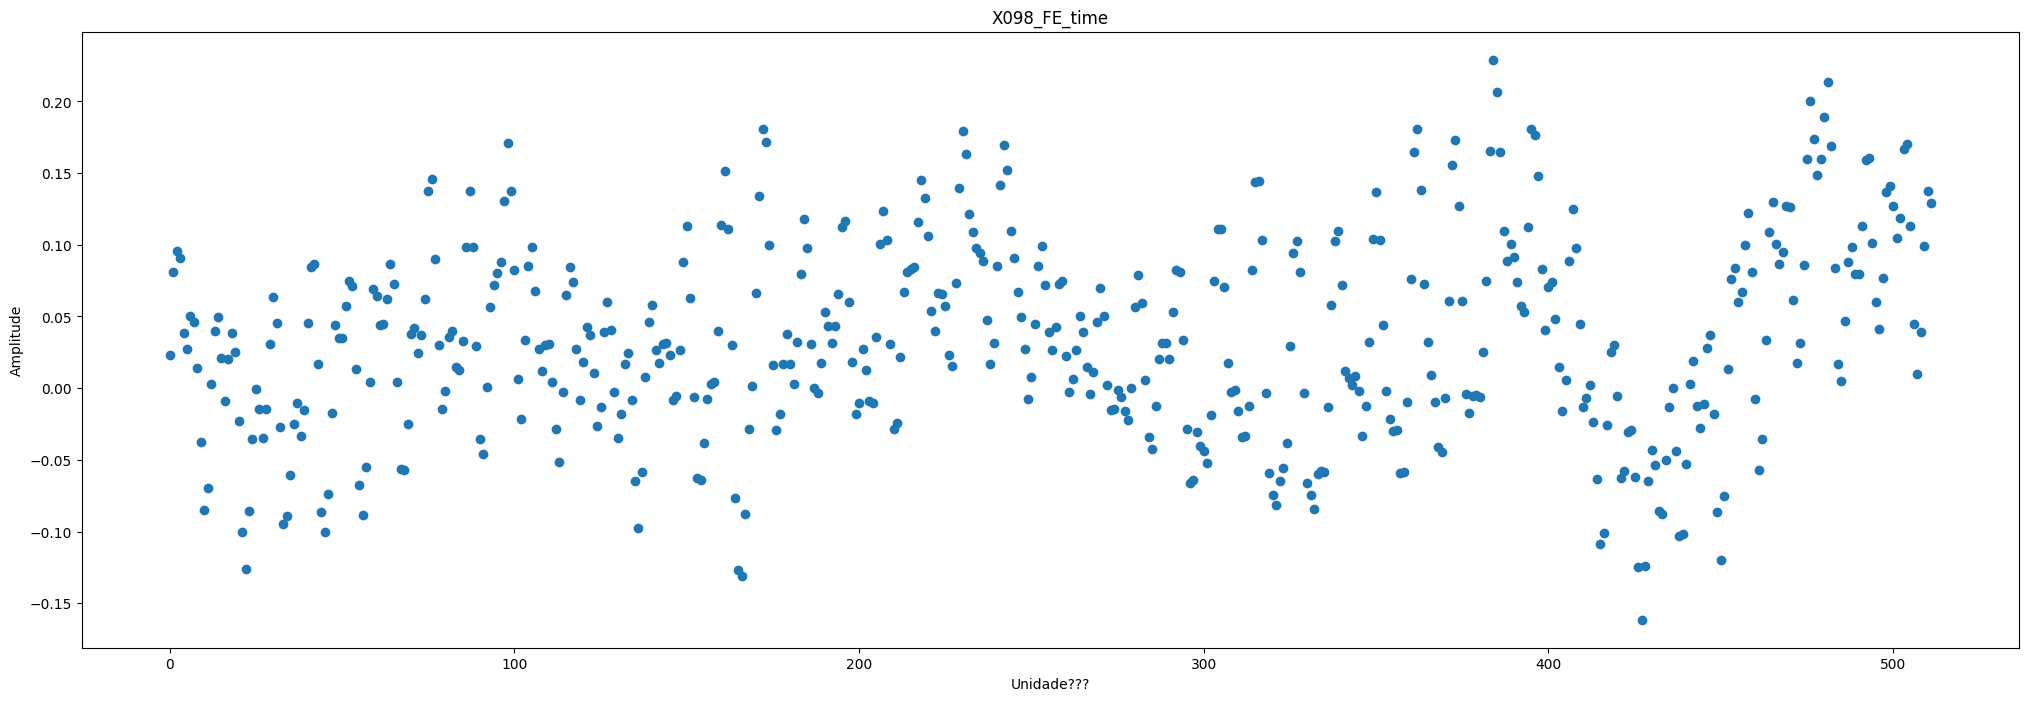

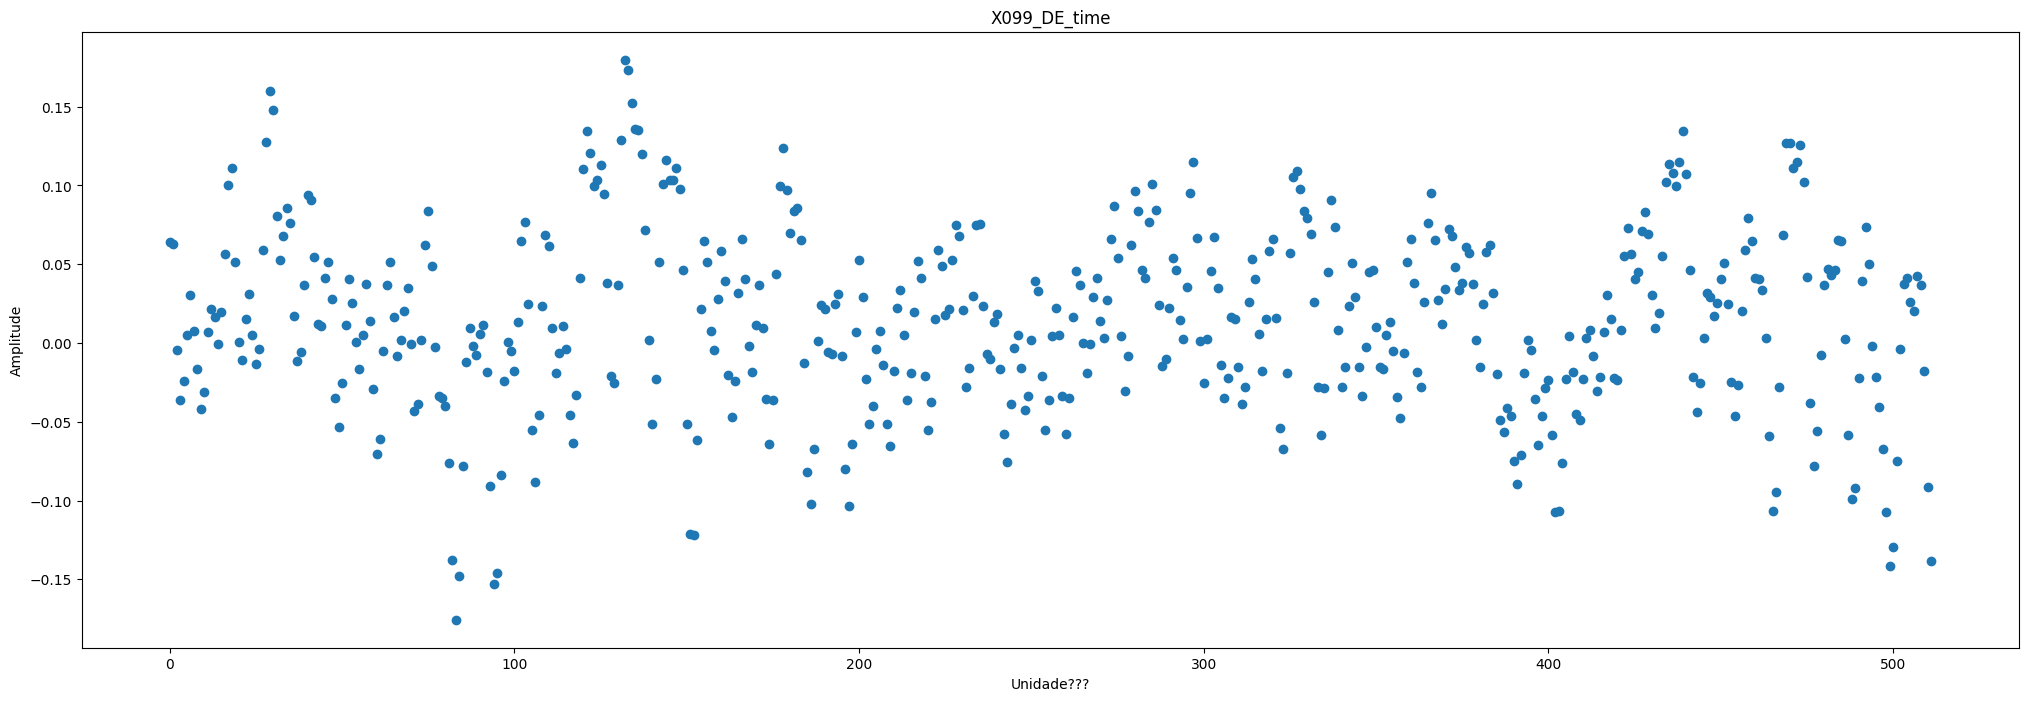

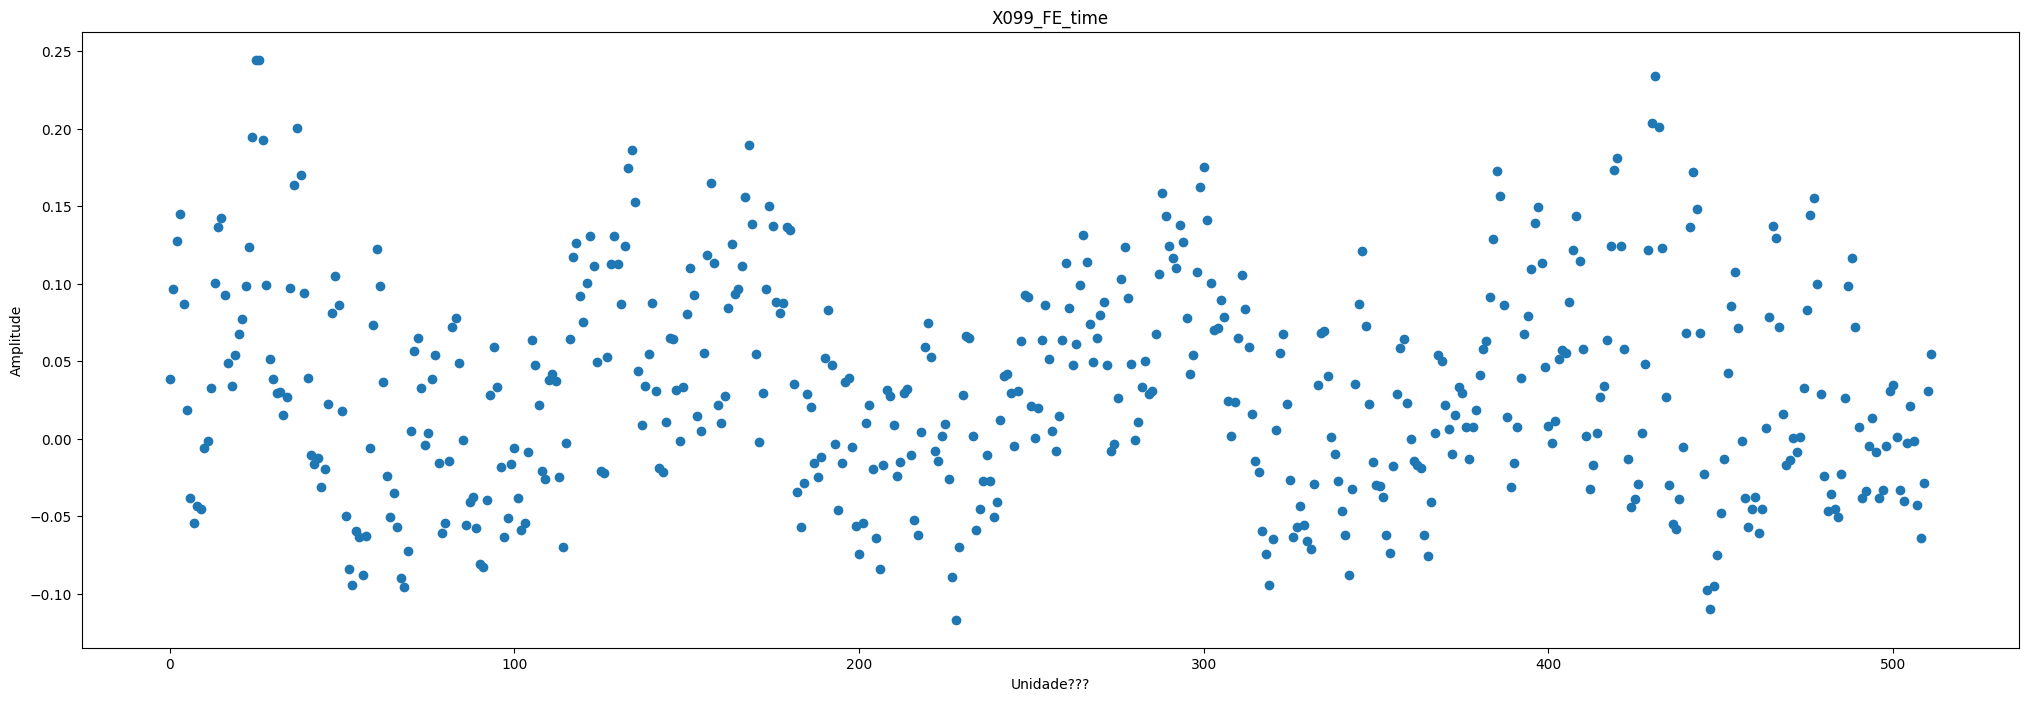

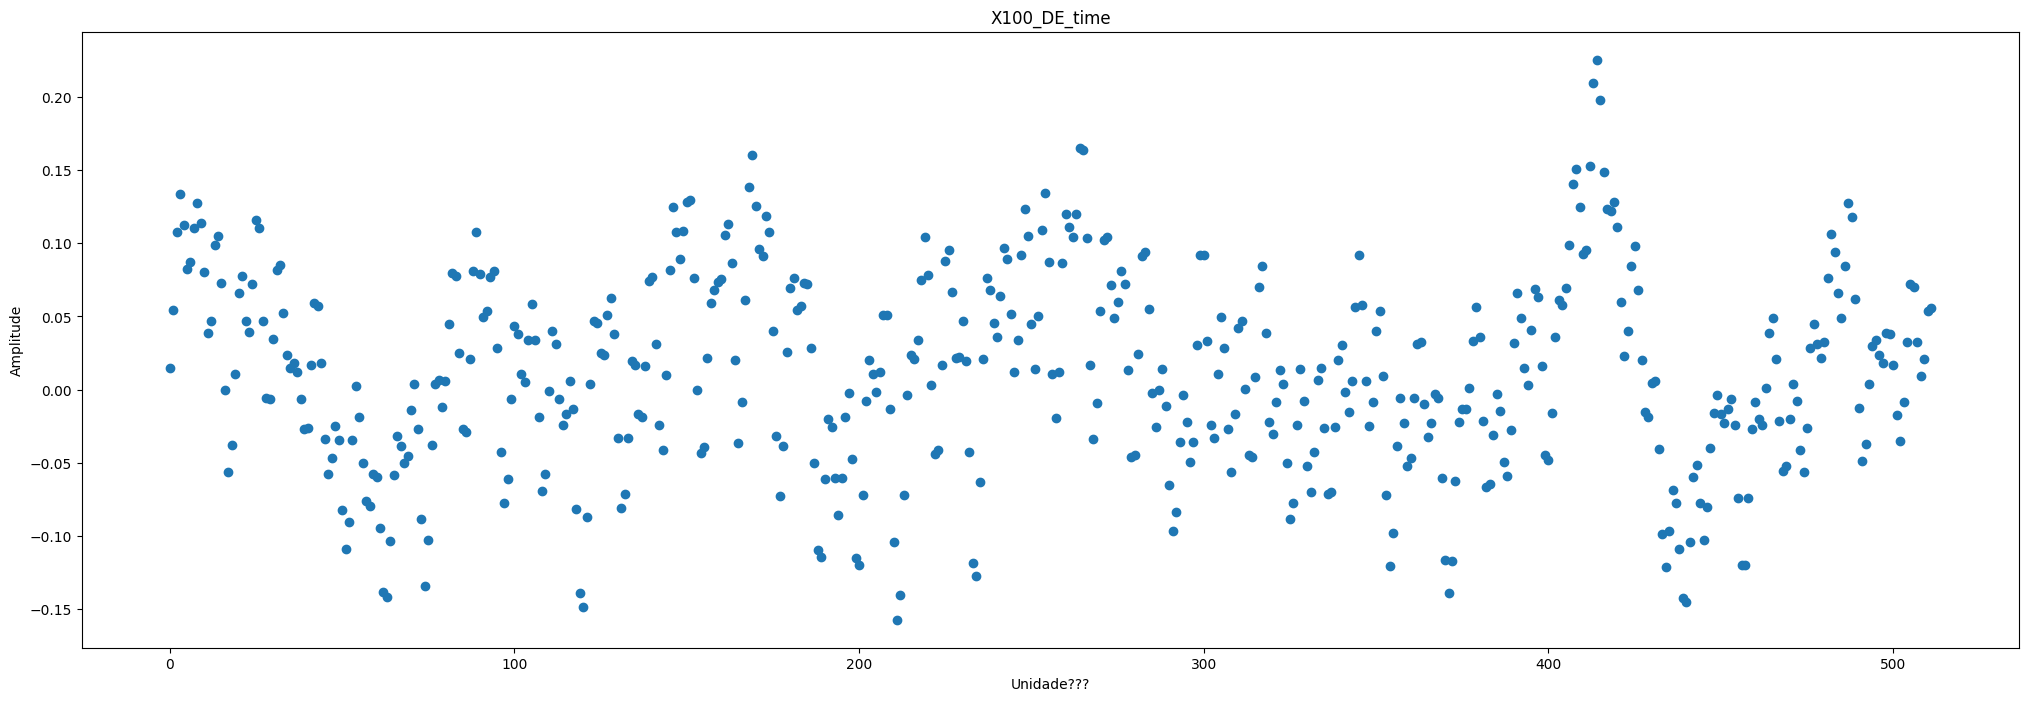

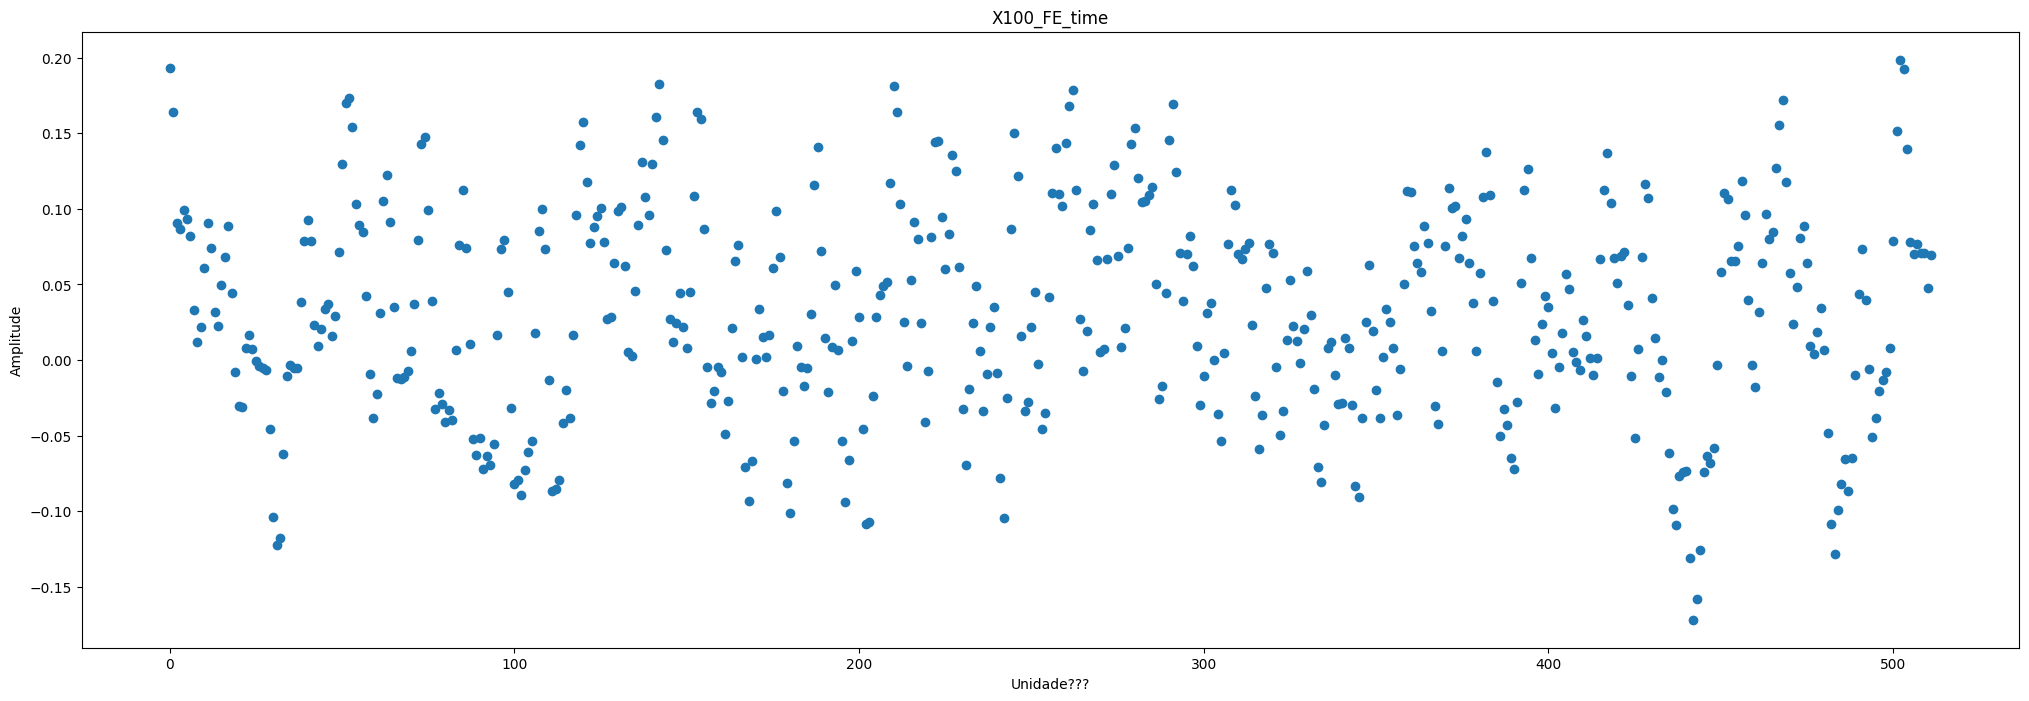

In [81]:
plot_sample(sample_normal)

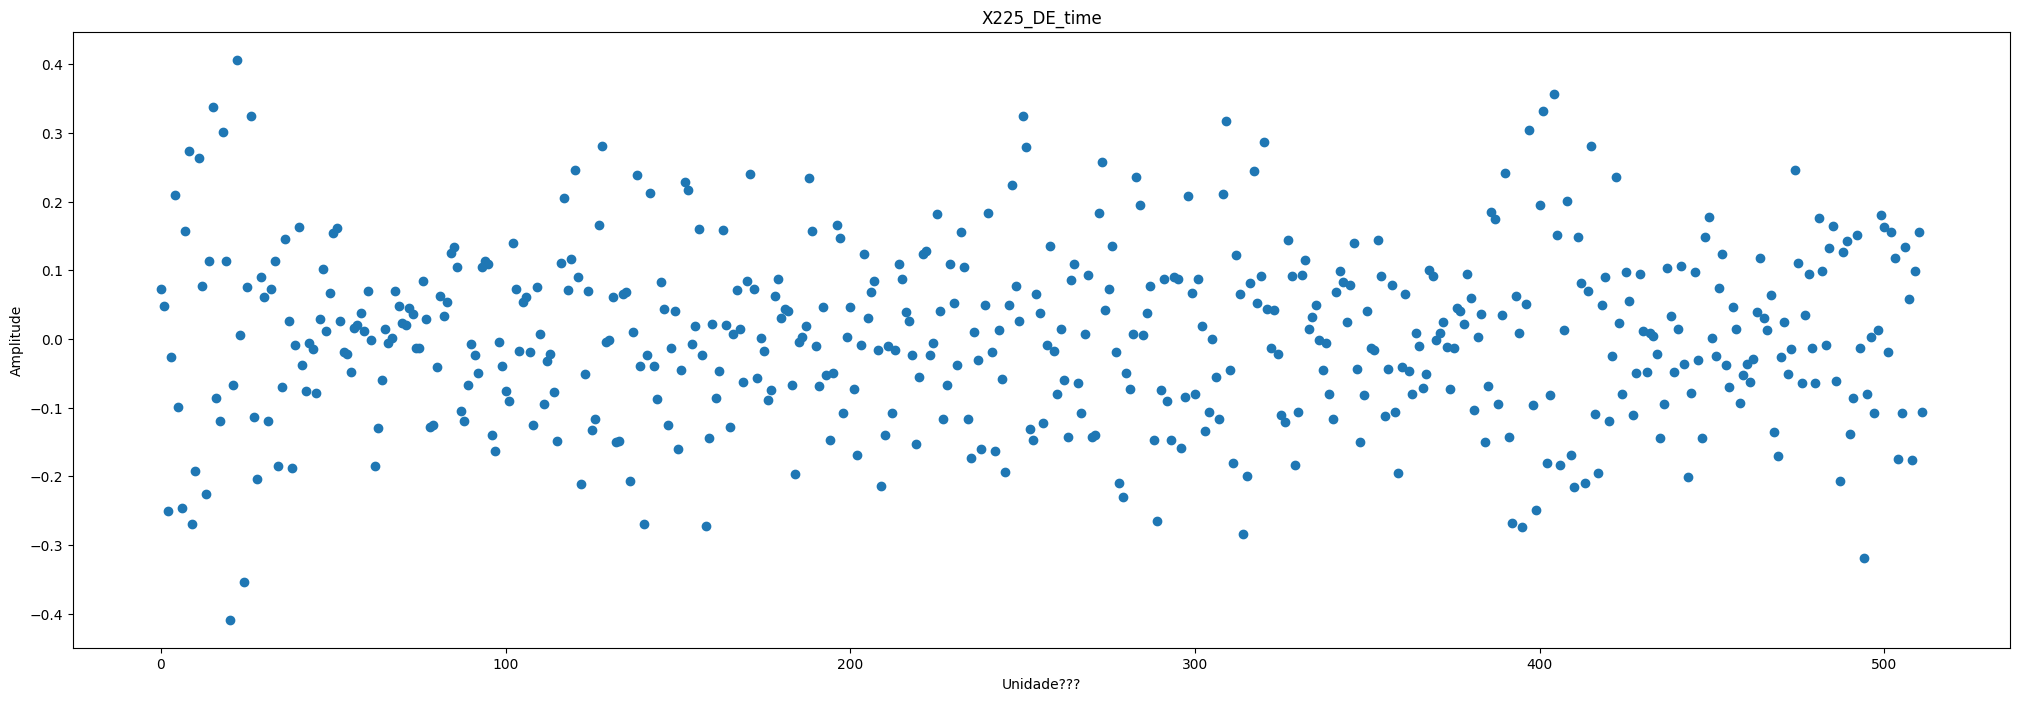

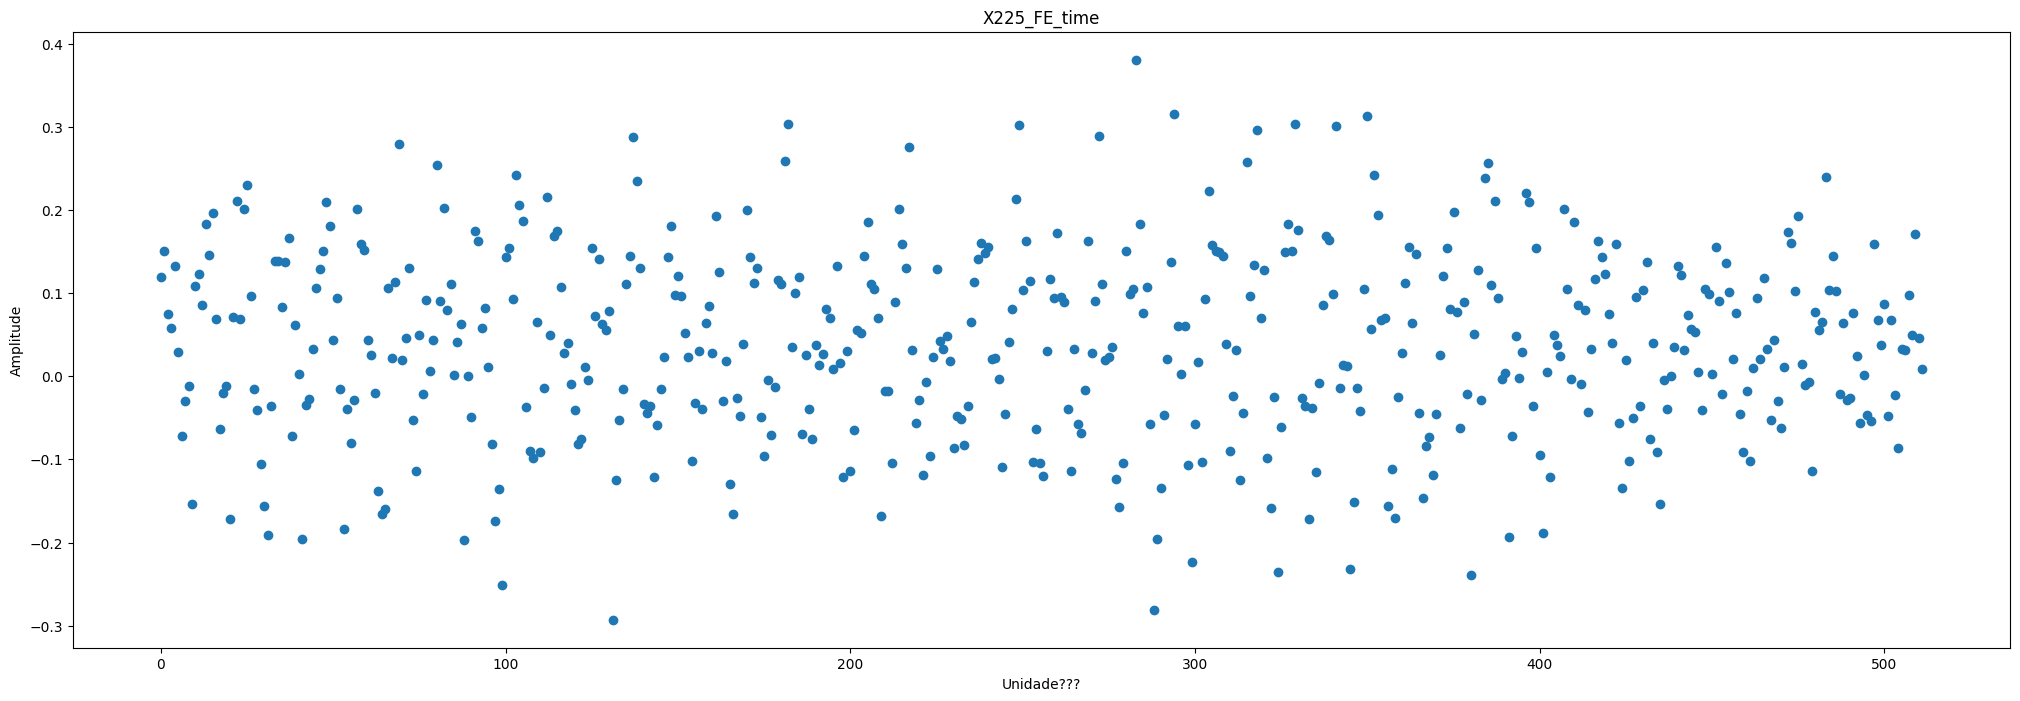

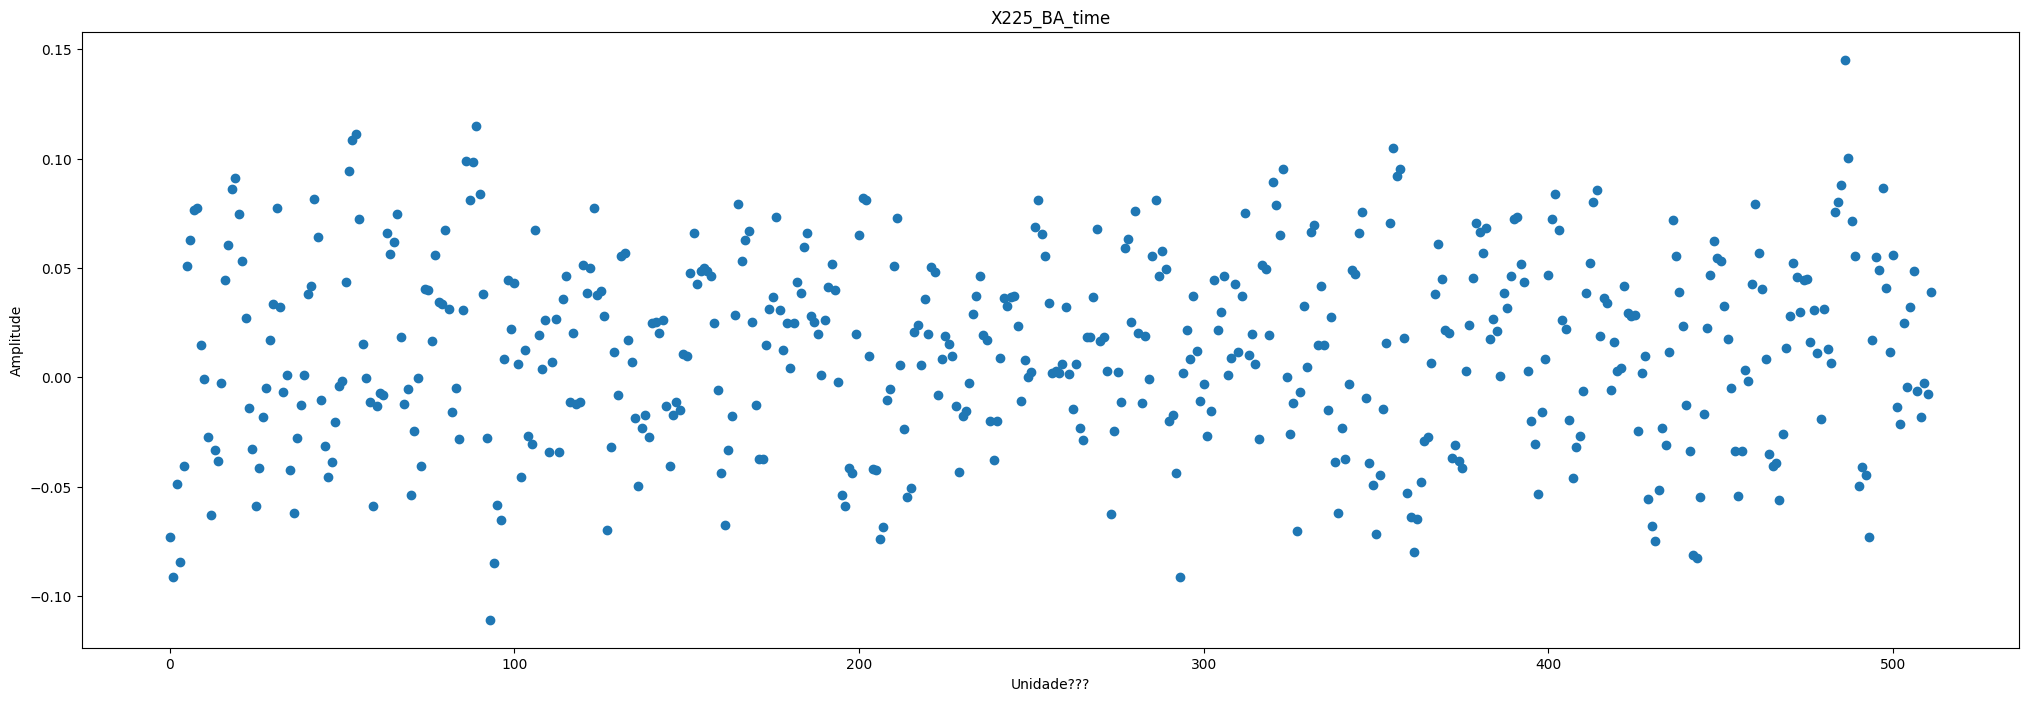

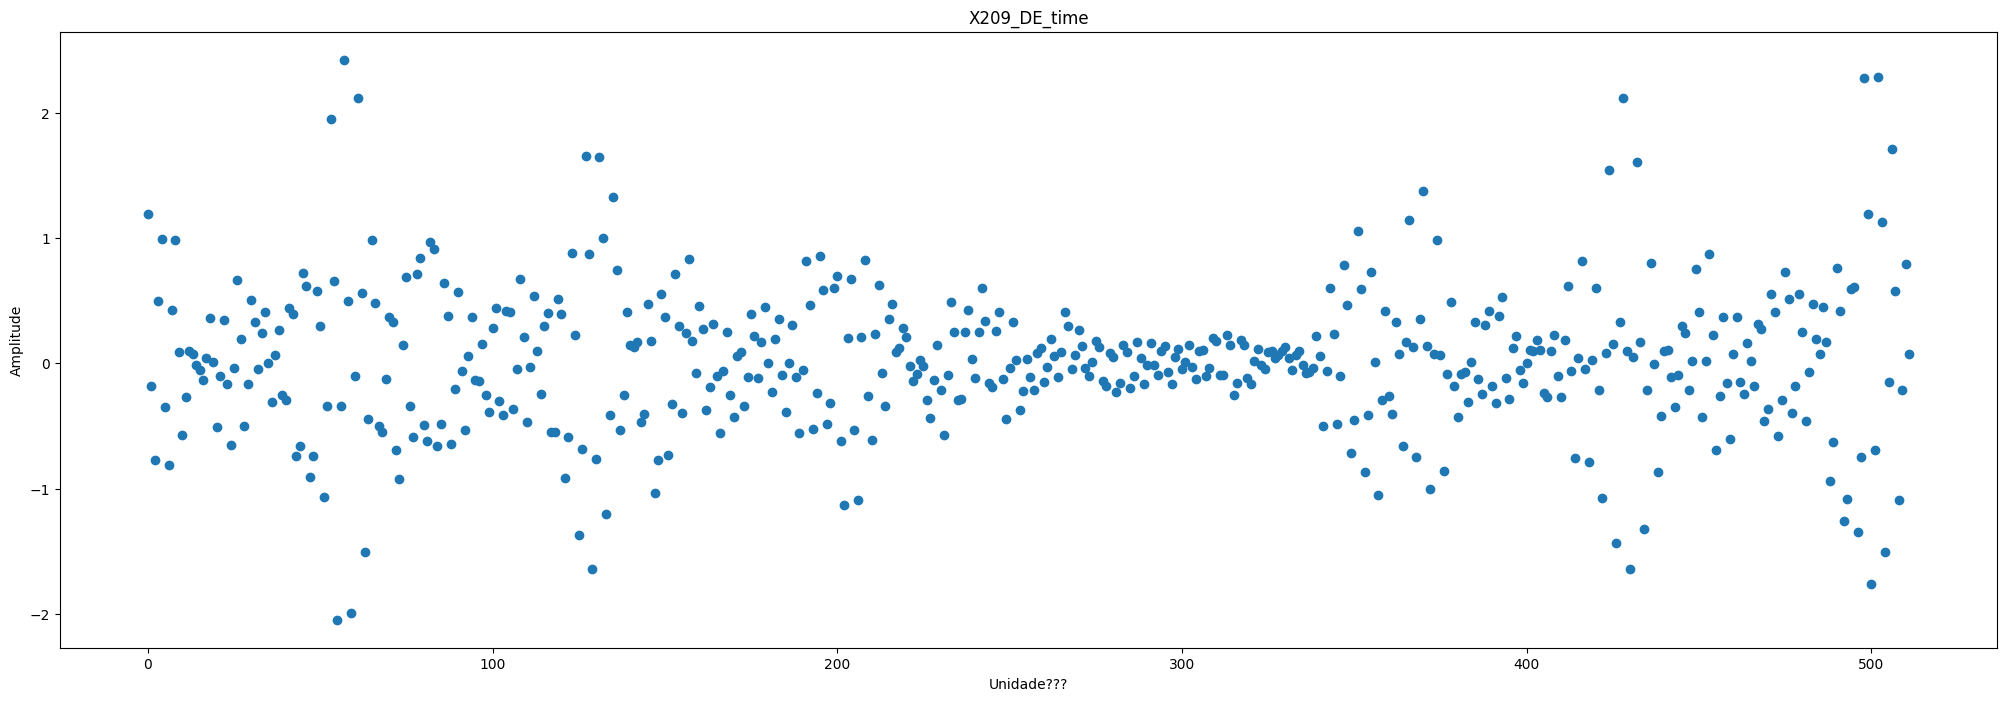

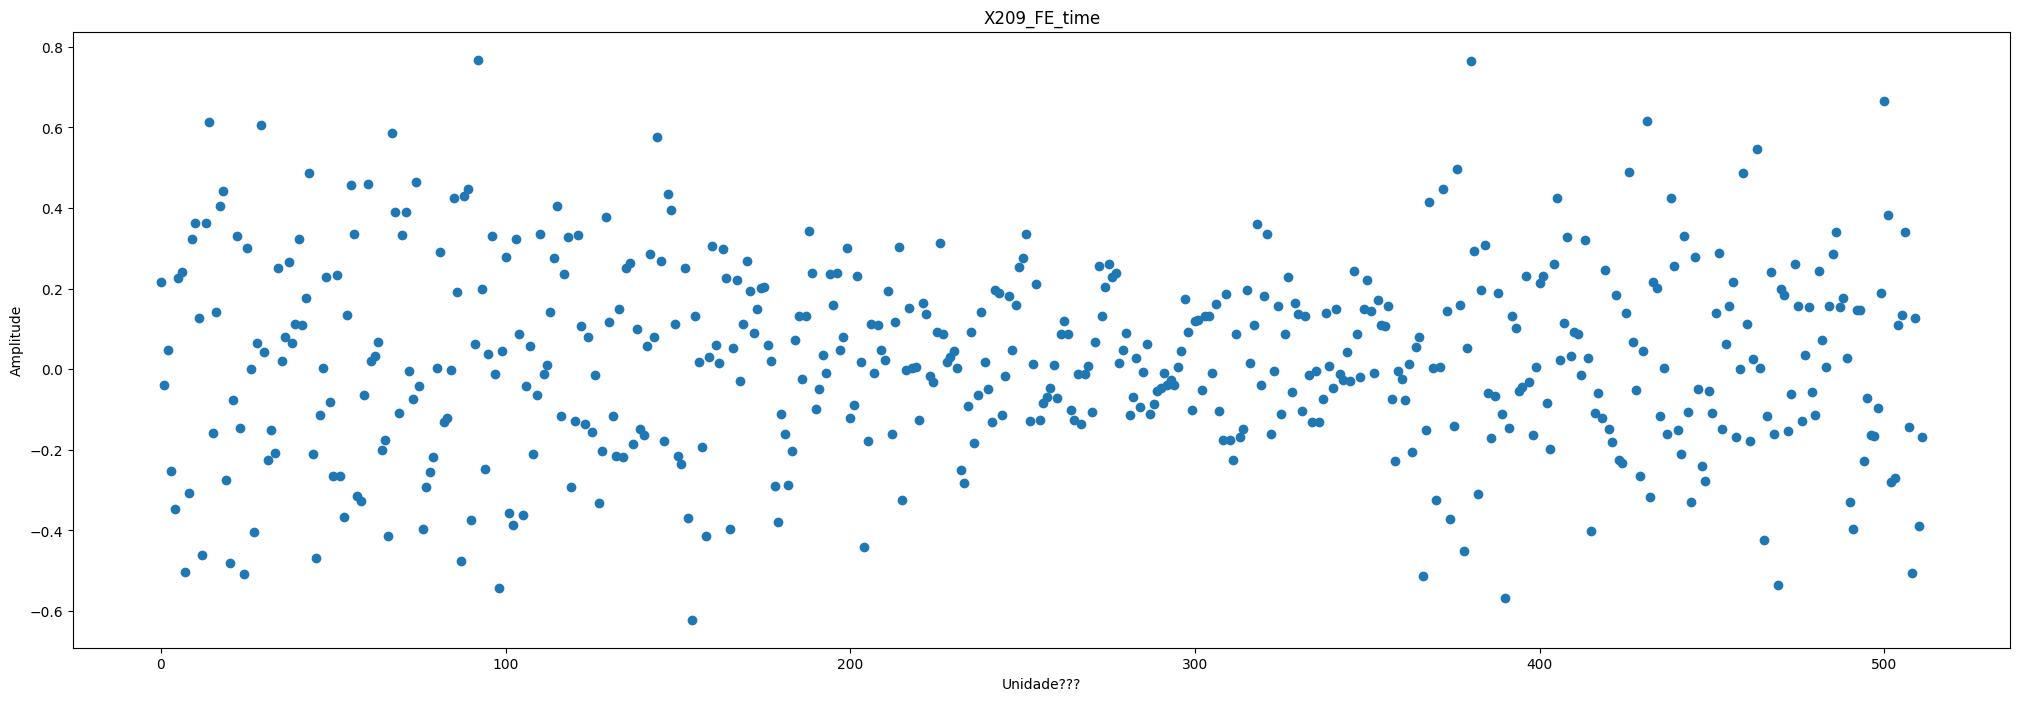

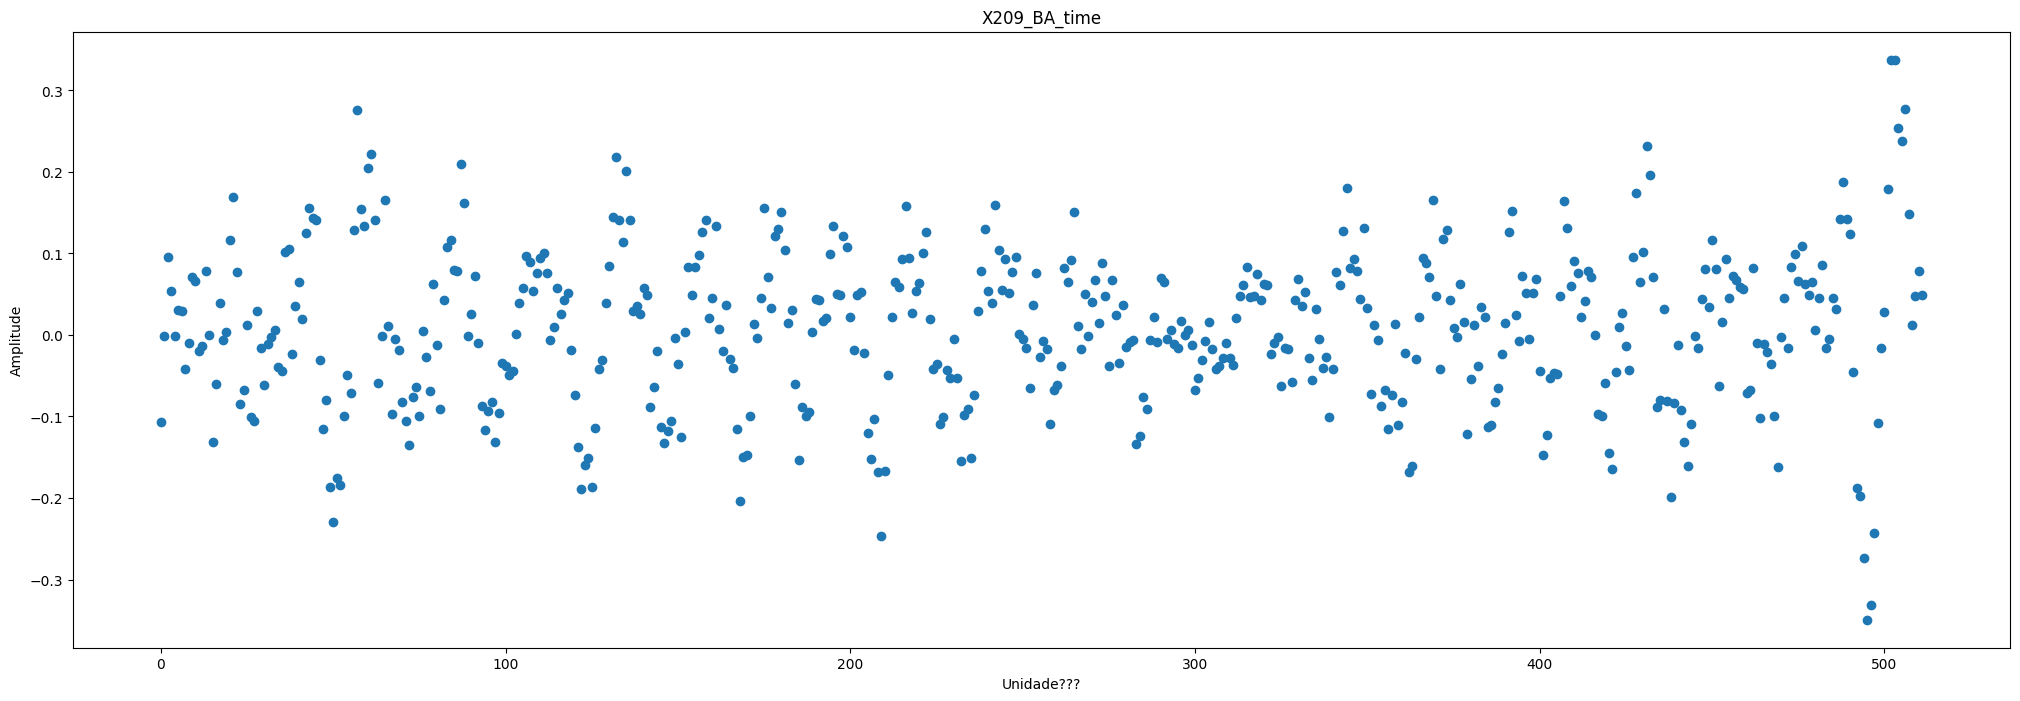

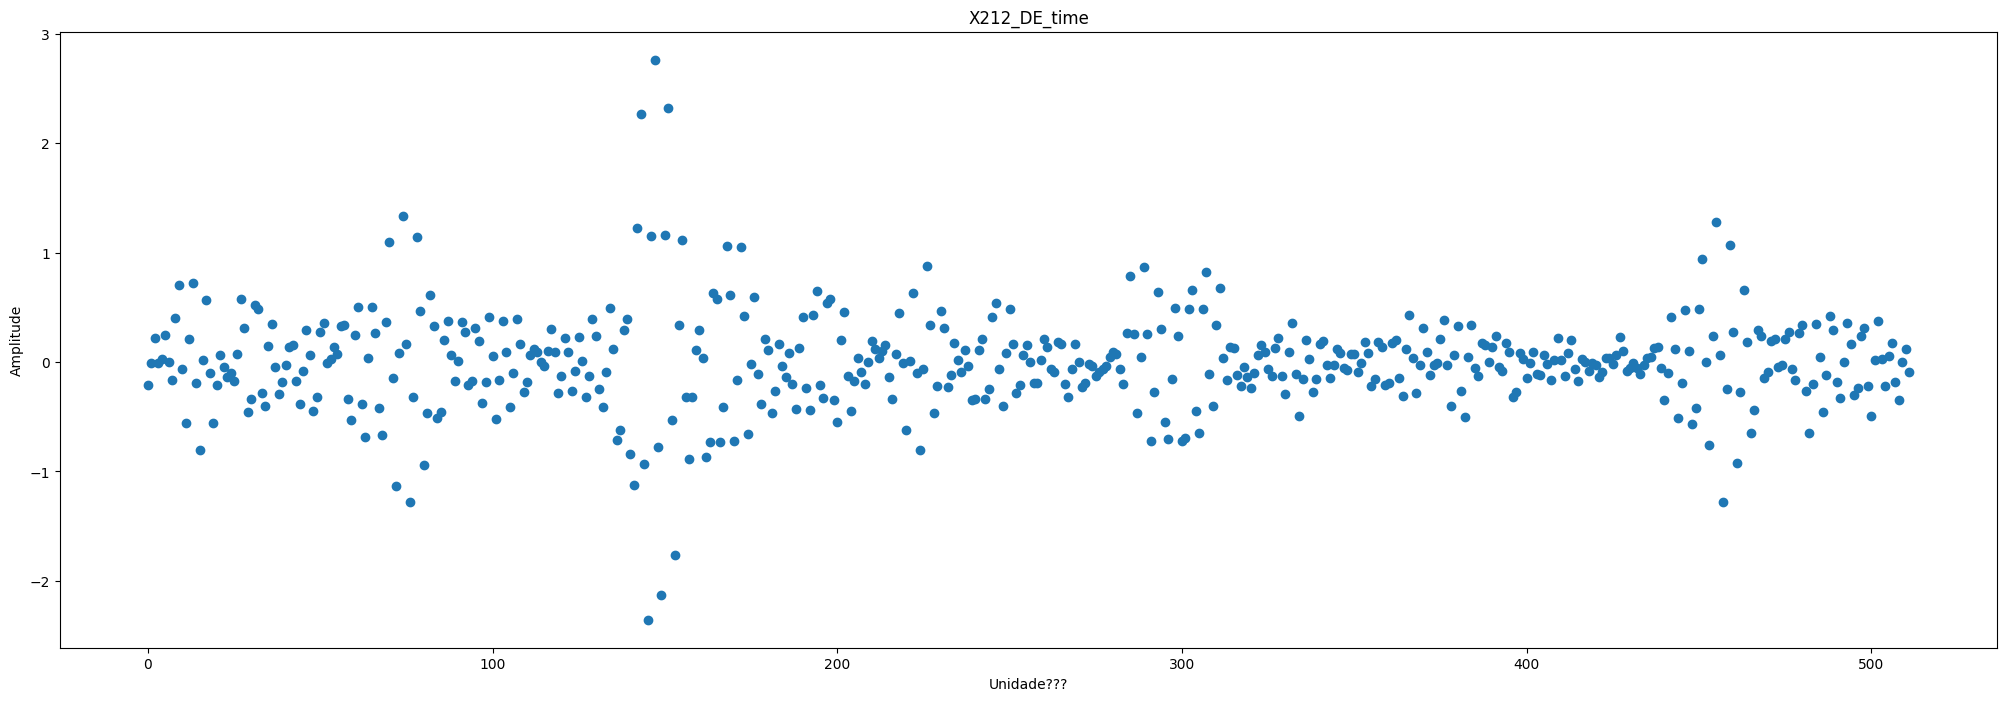

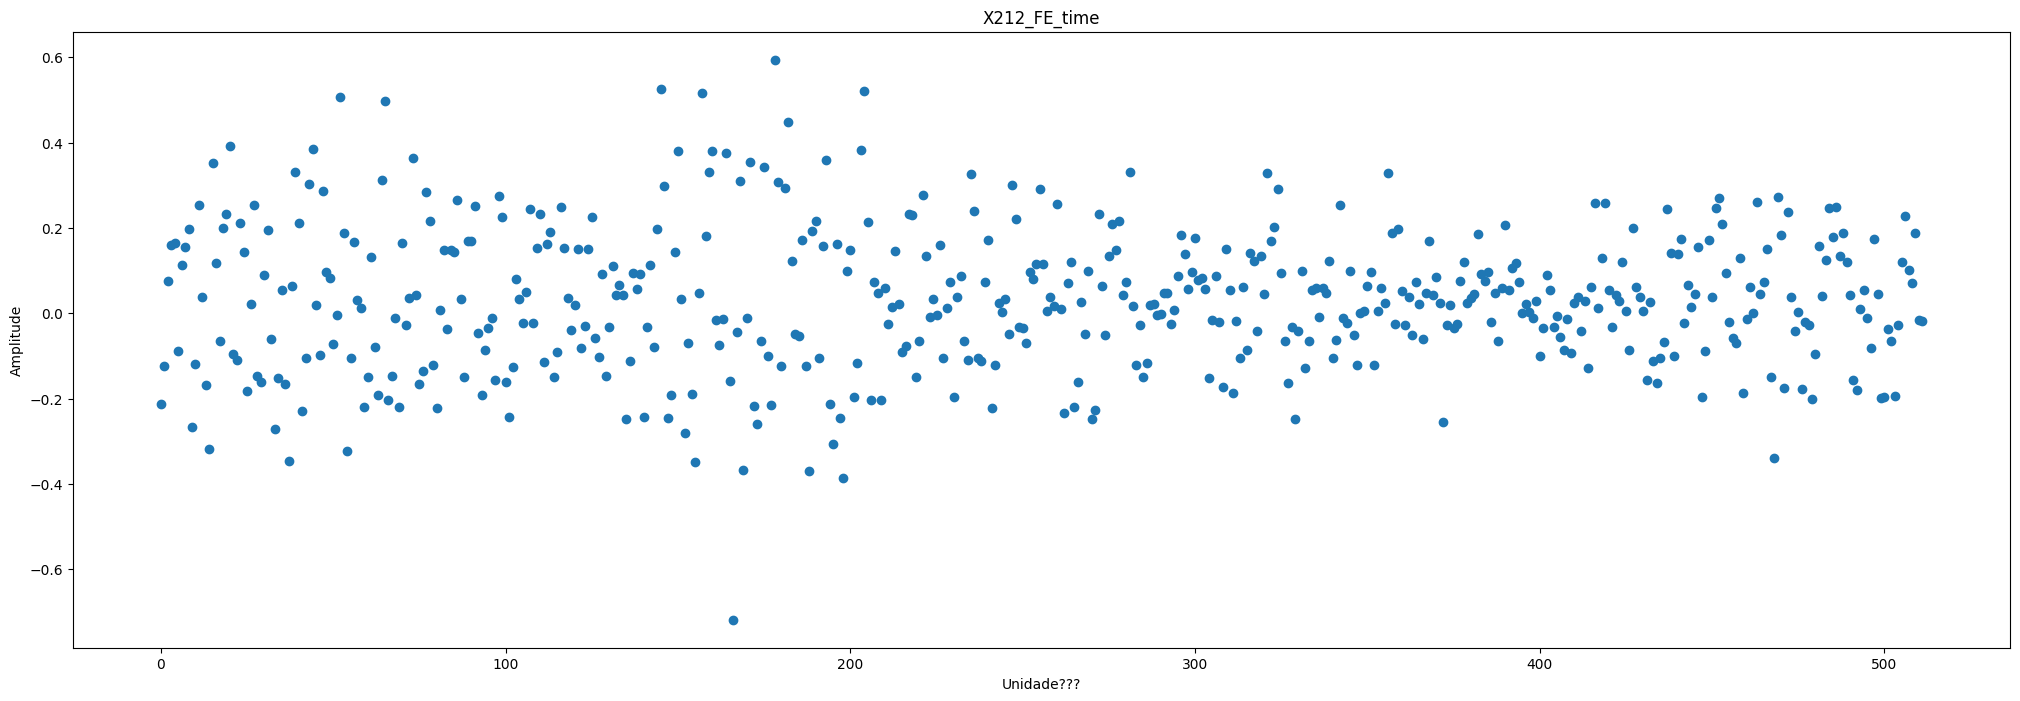

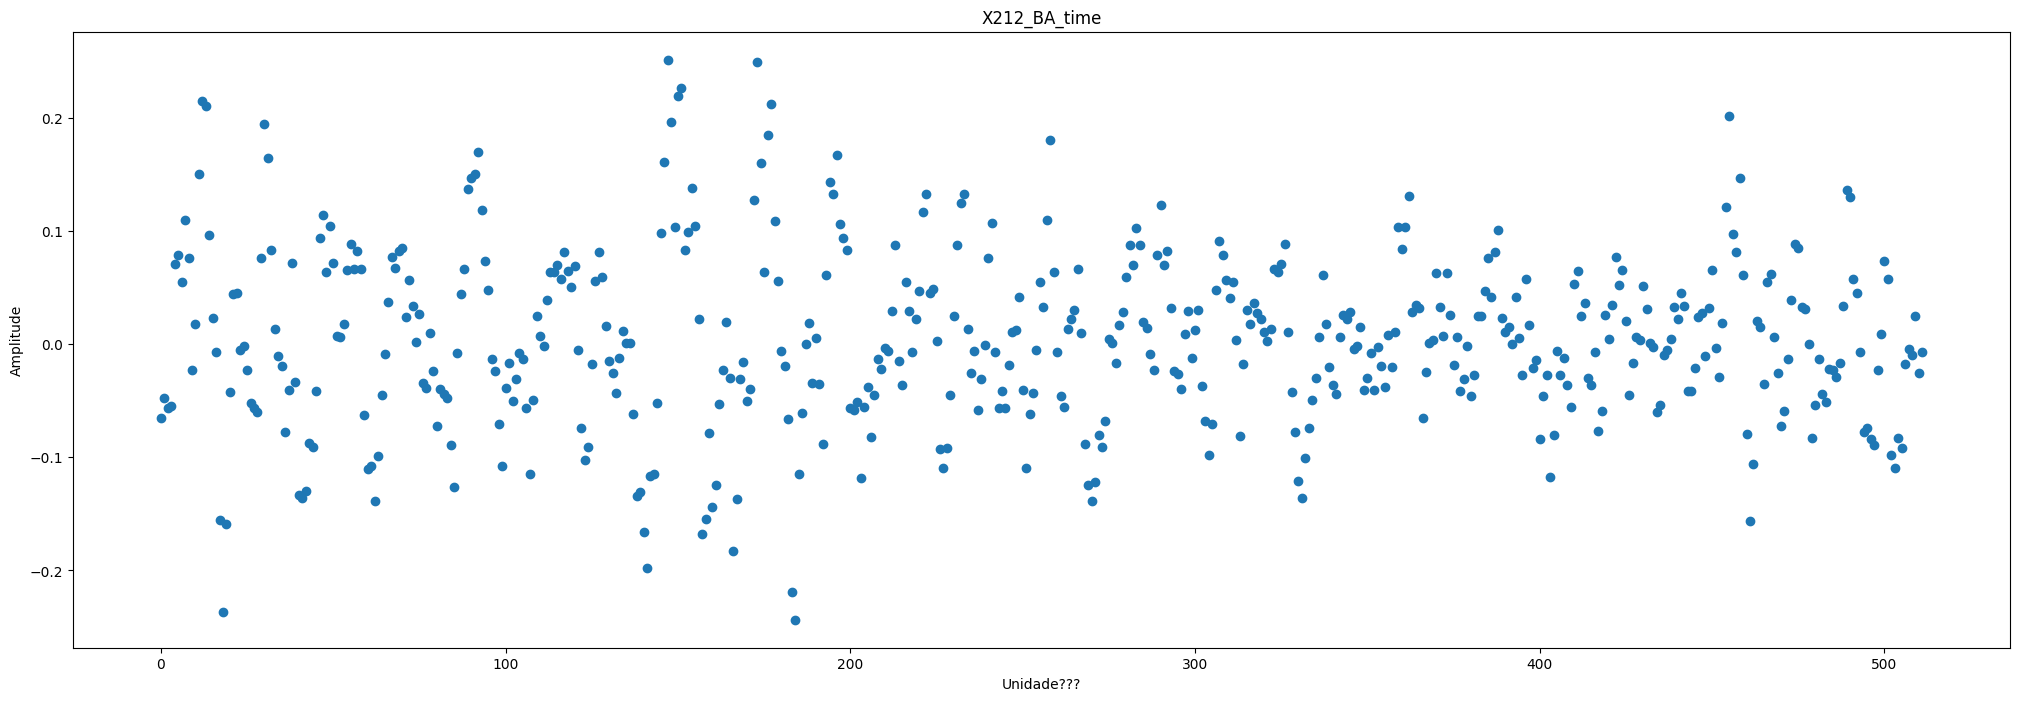

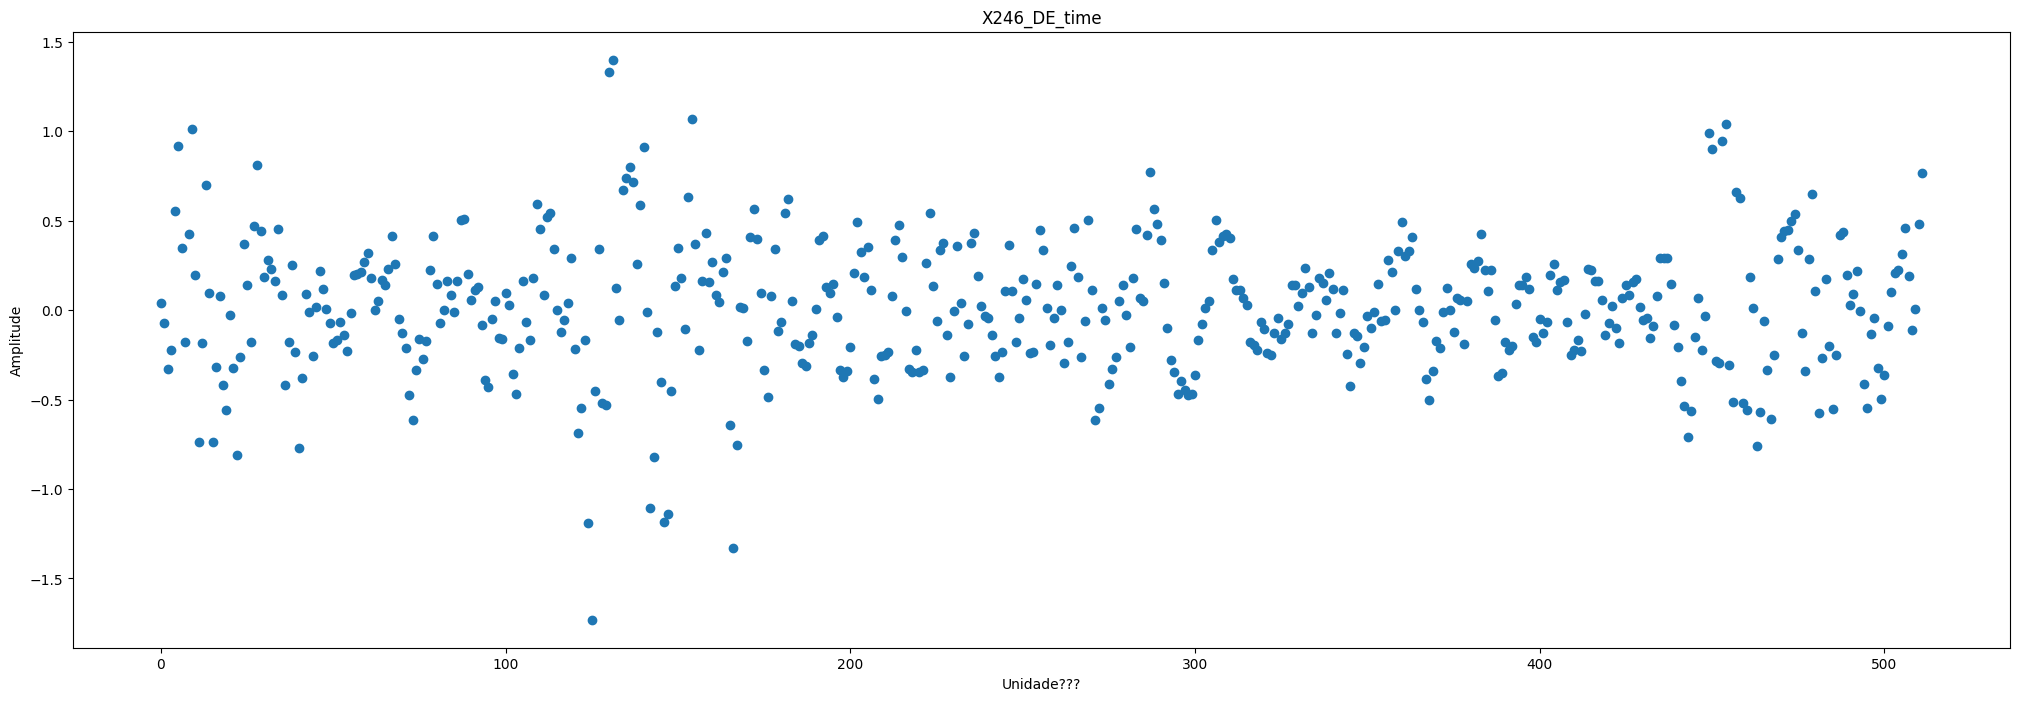

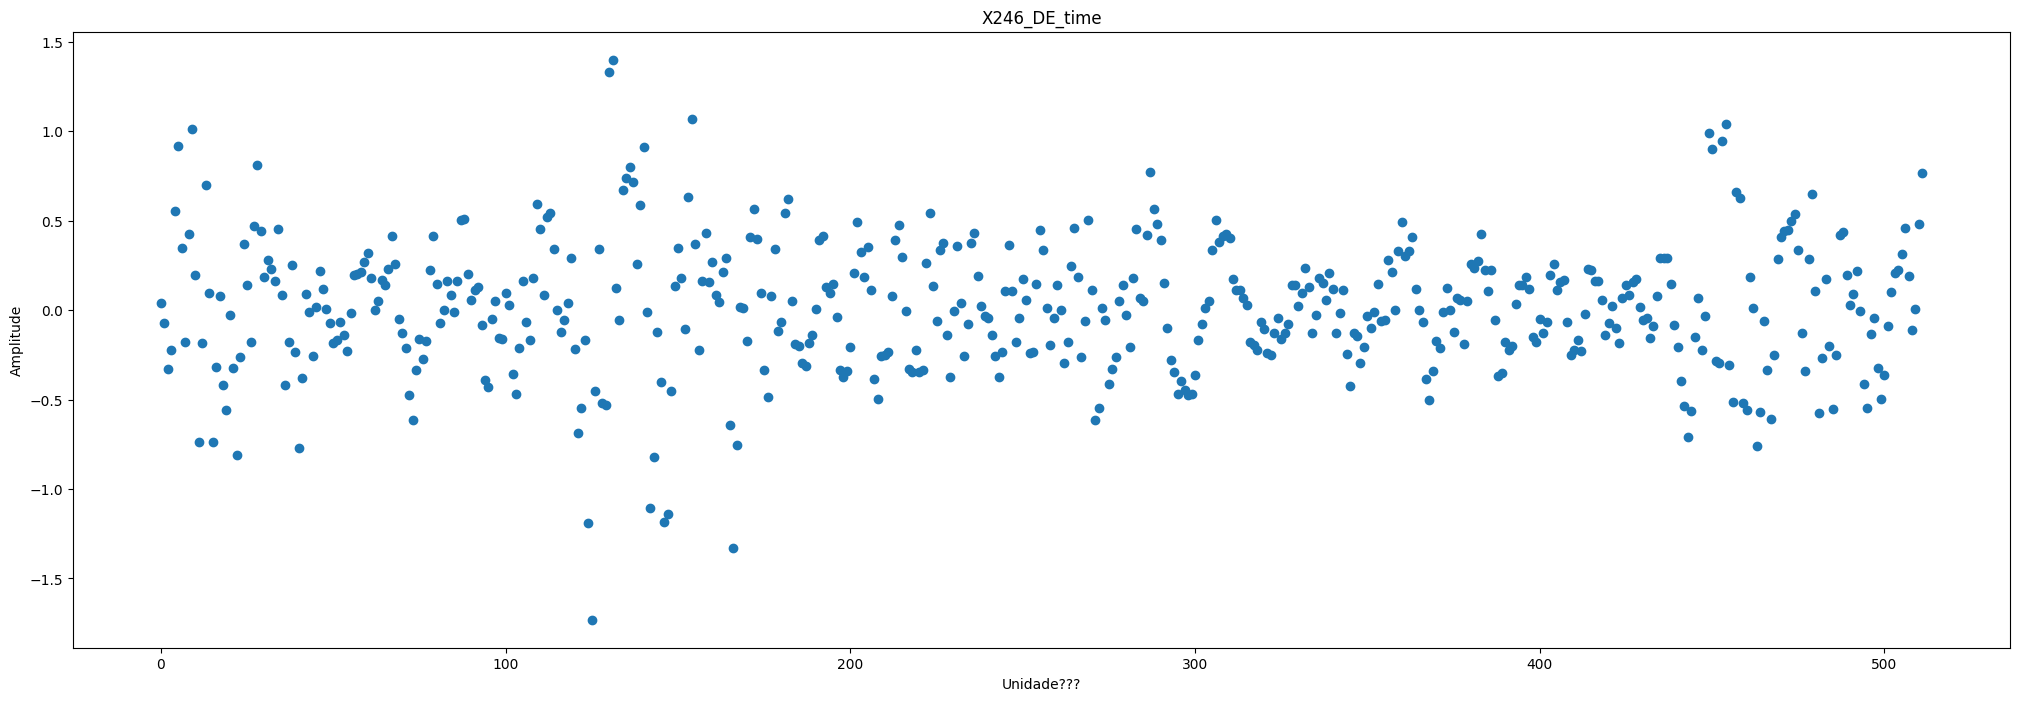

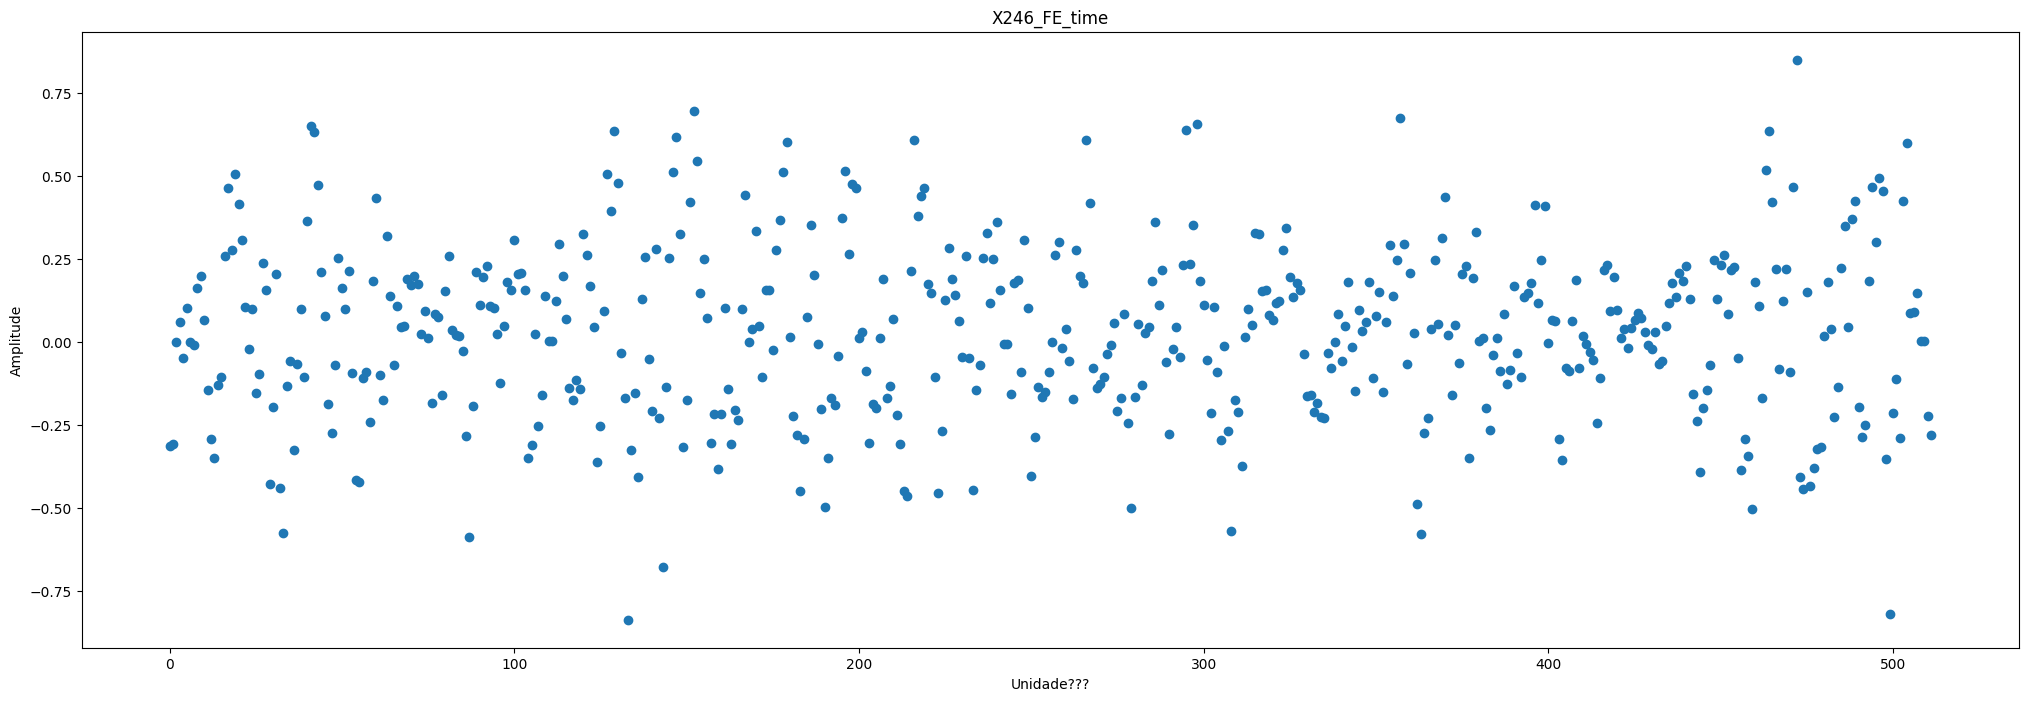

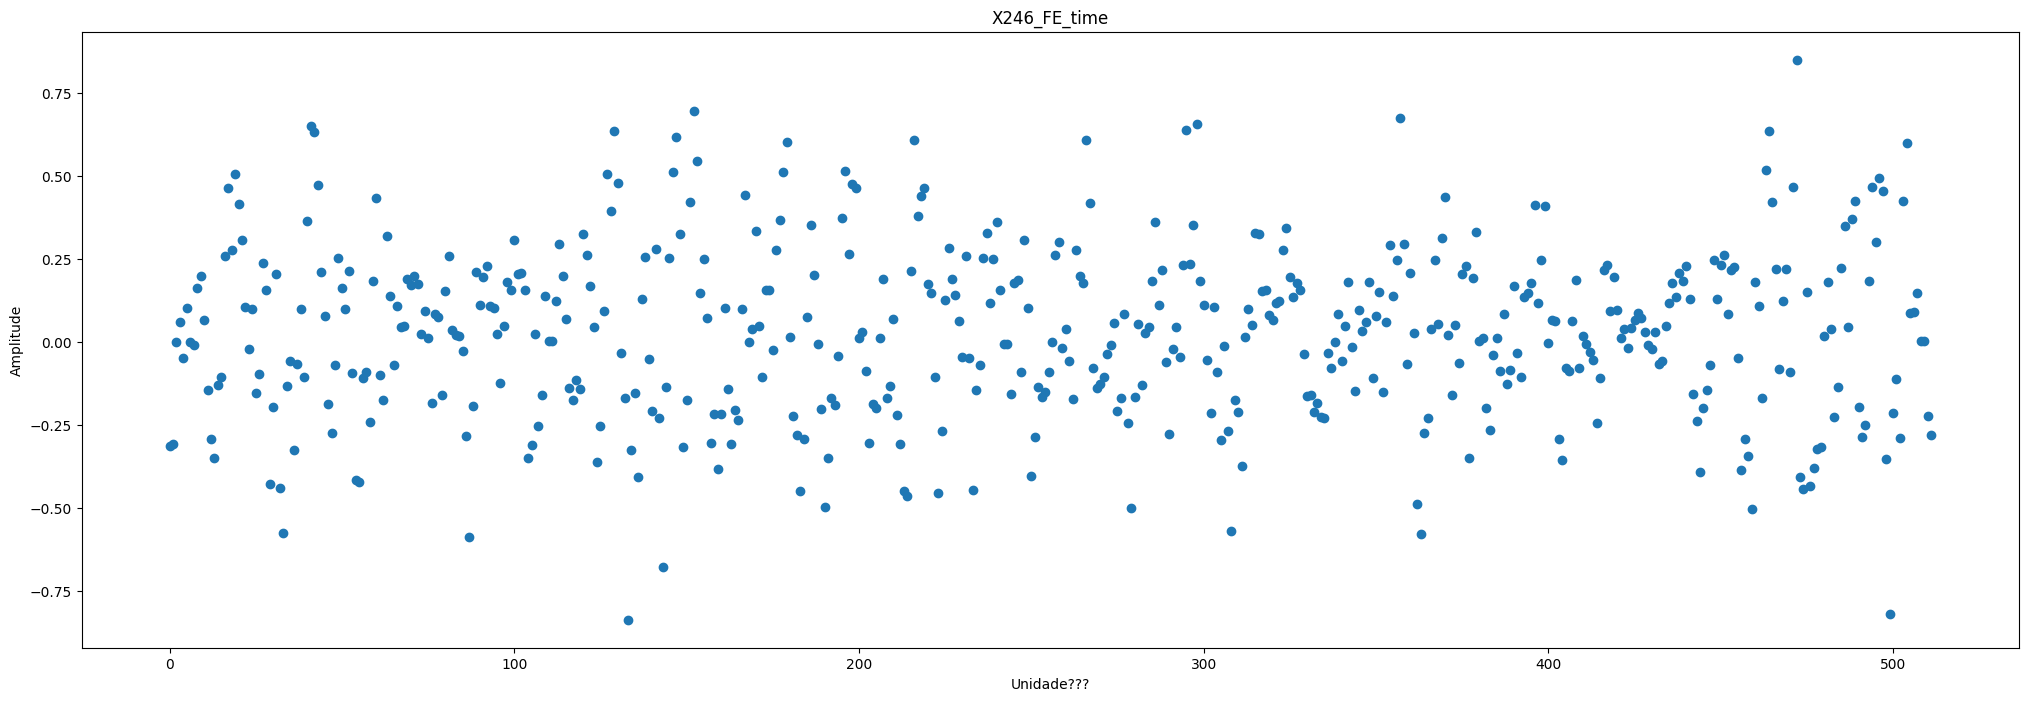

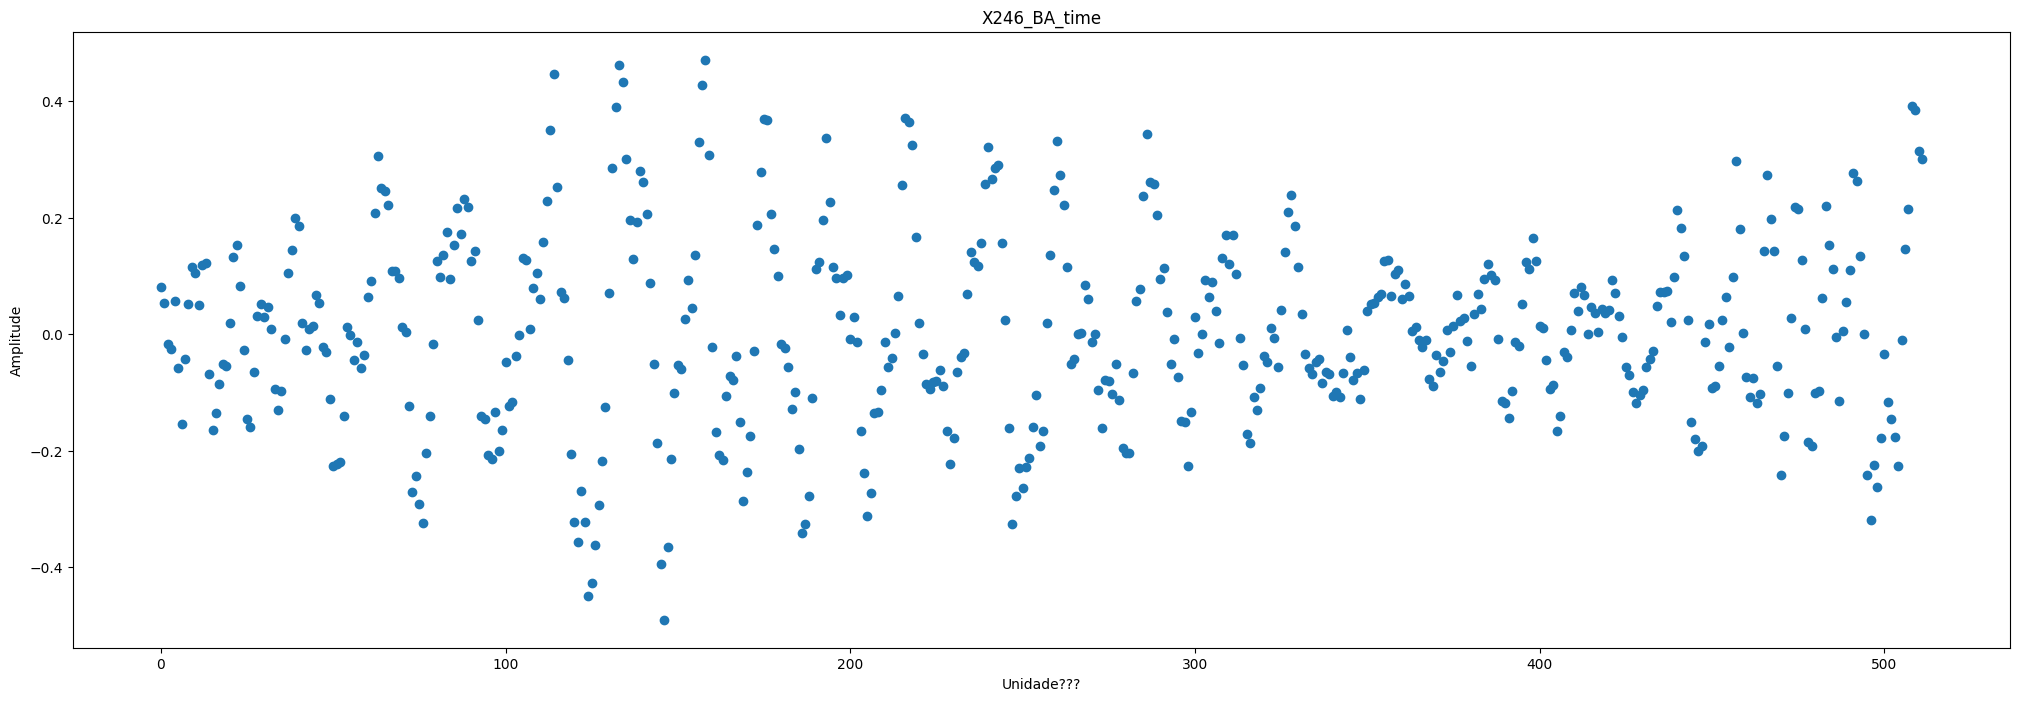

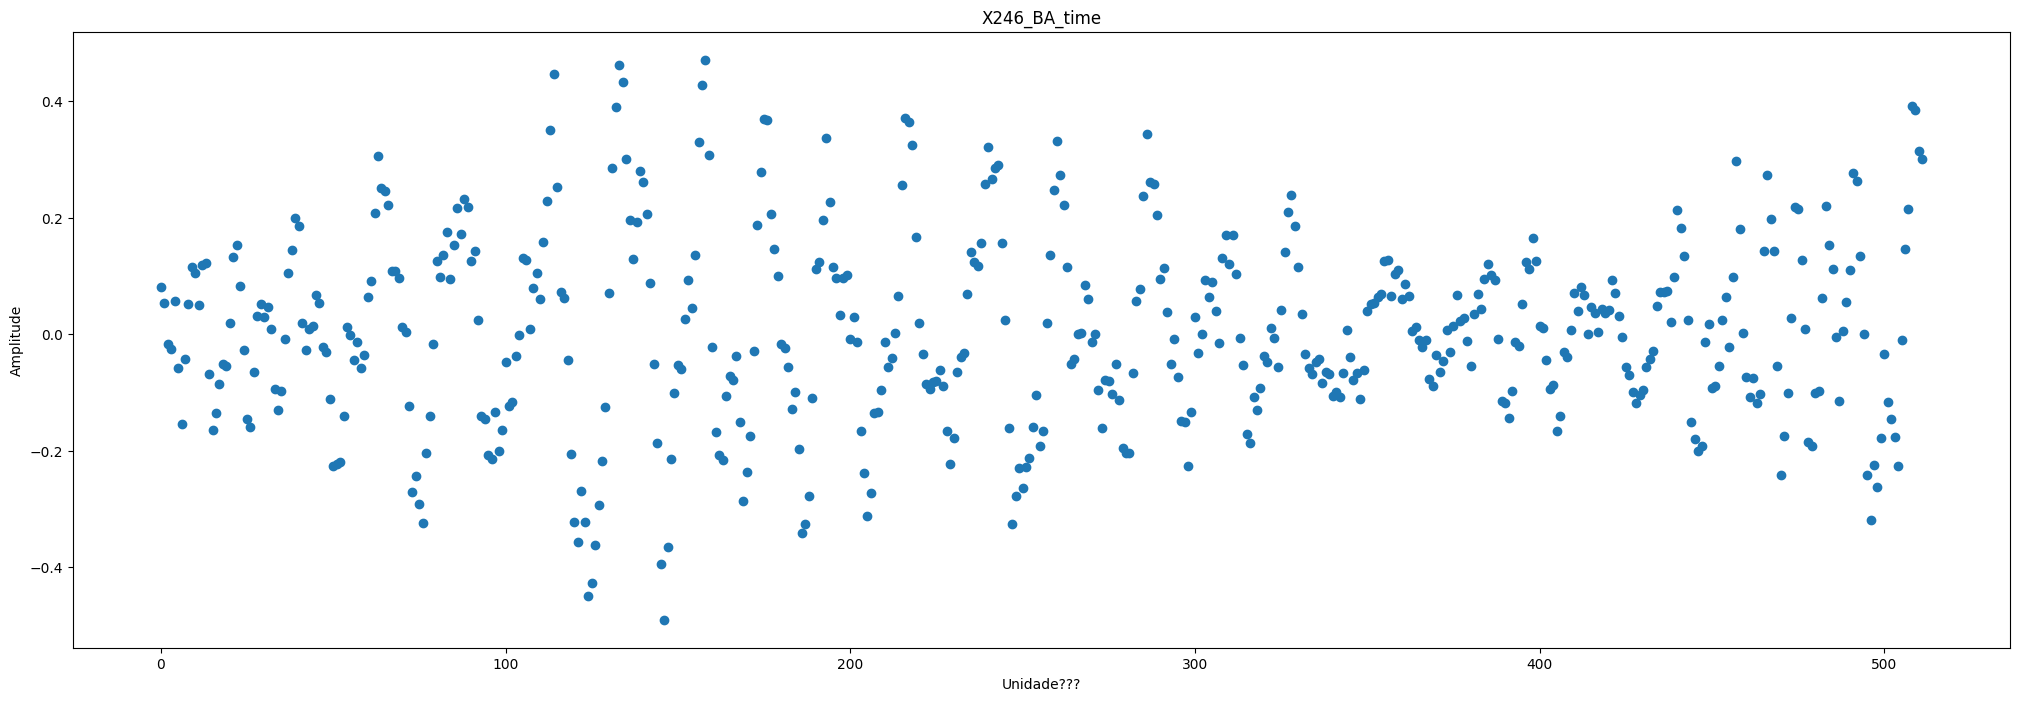

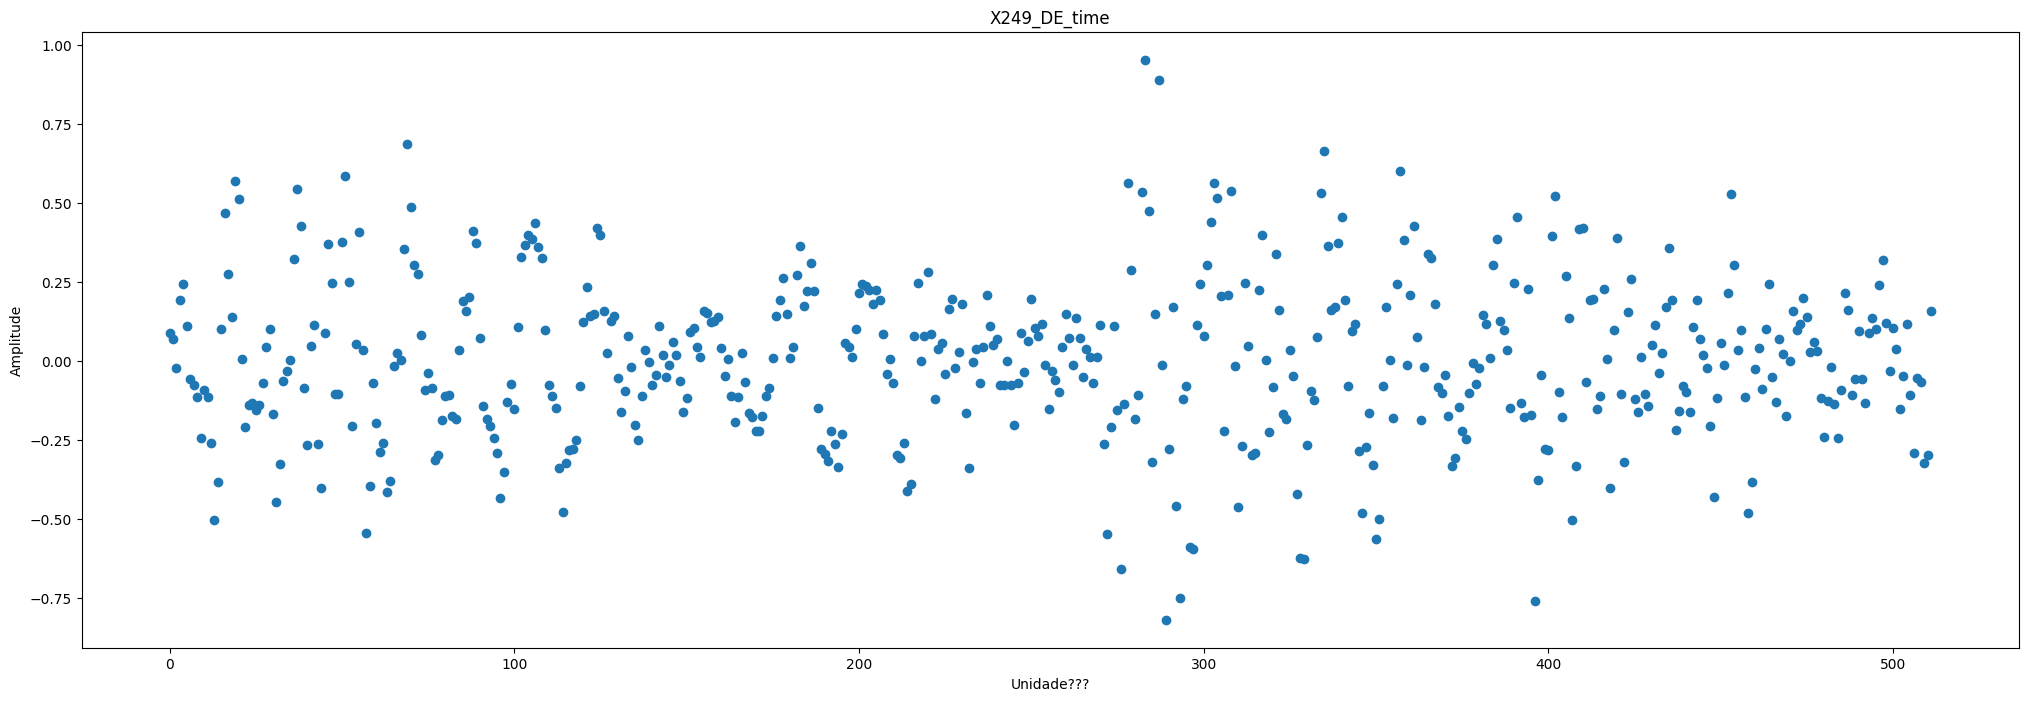

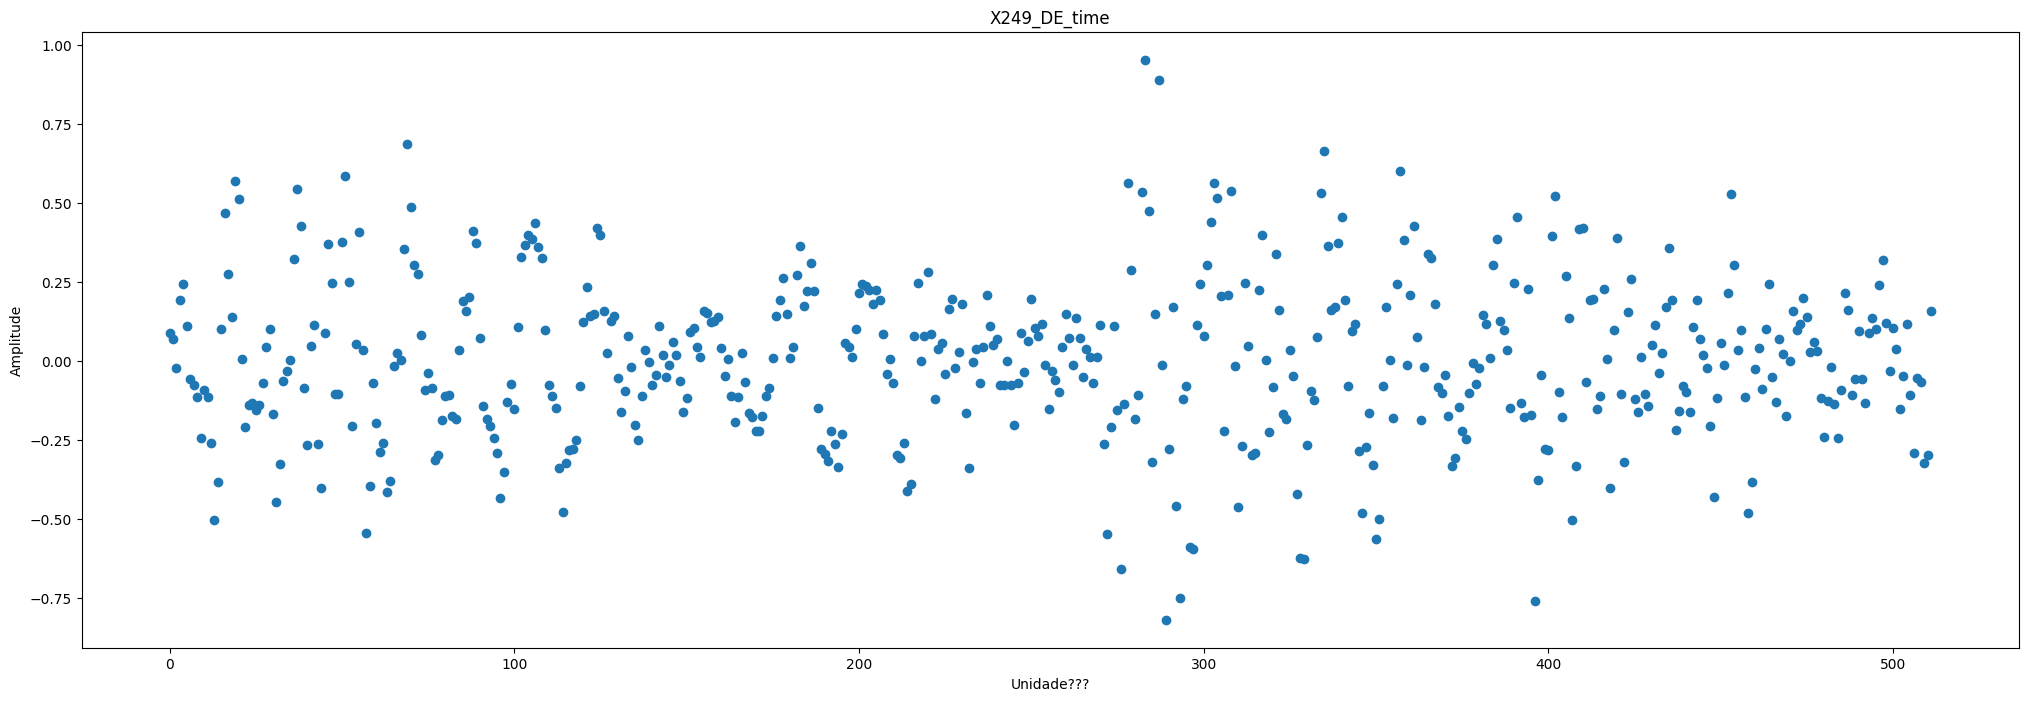

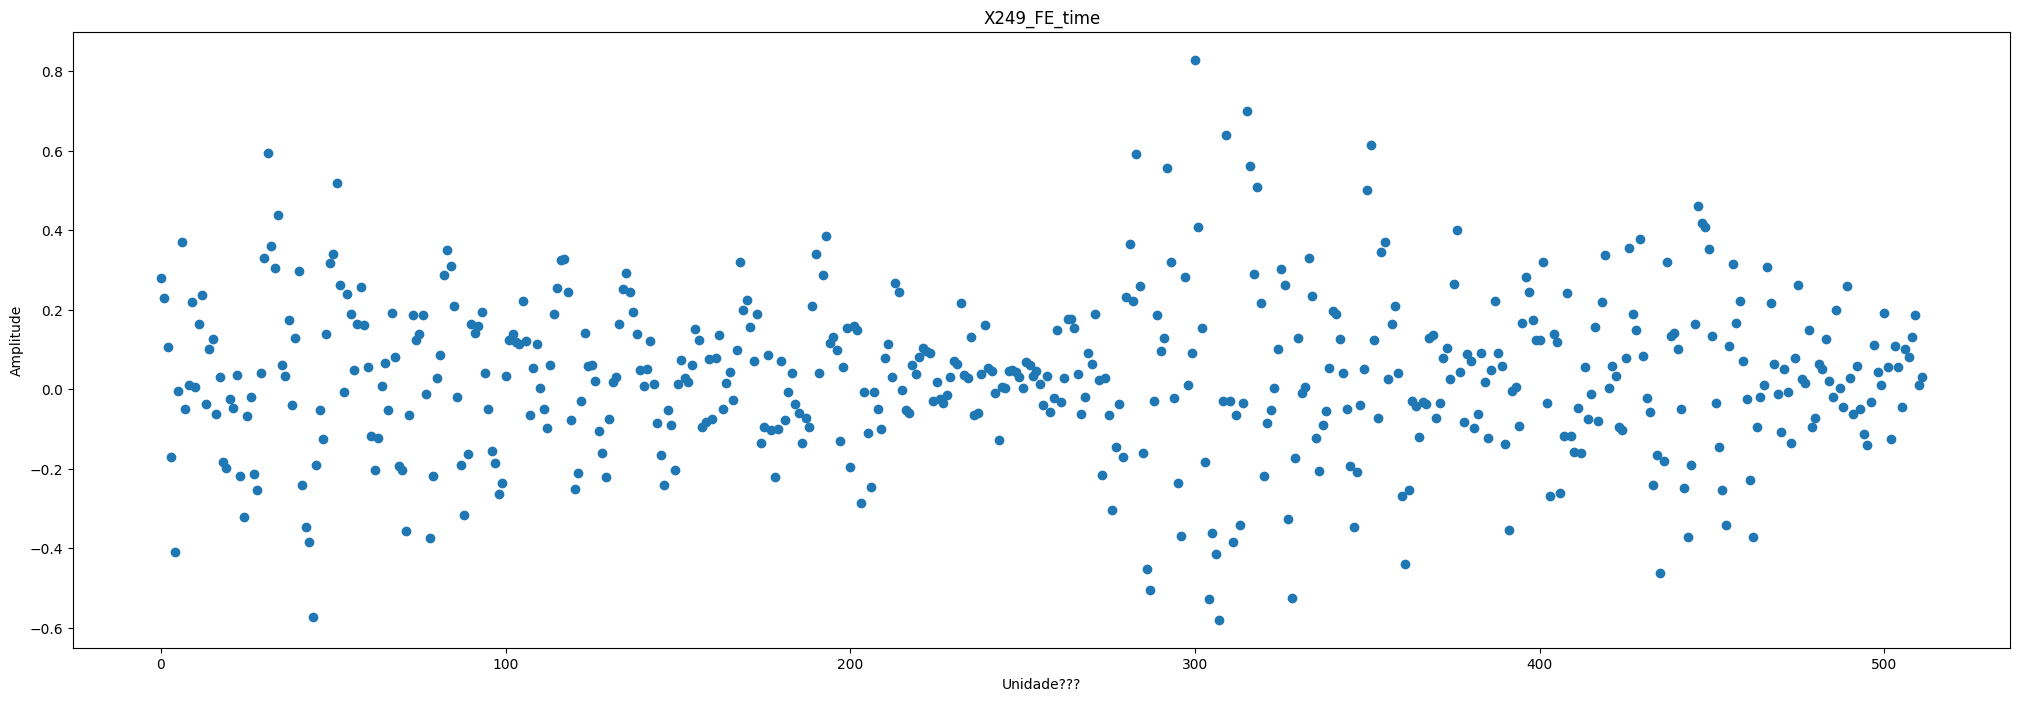

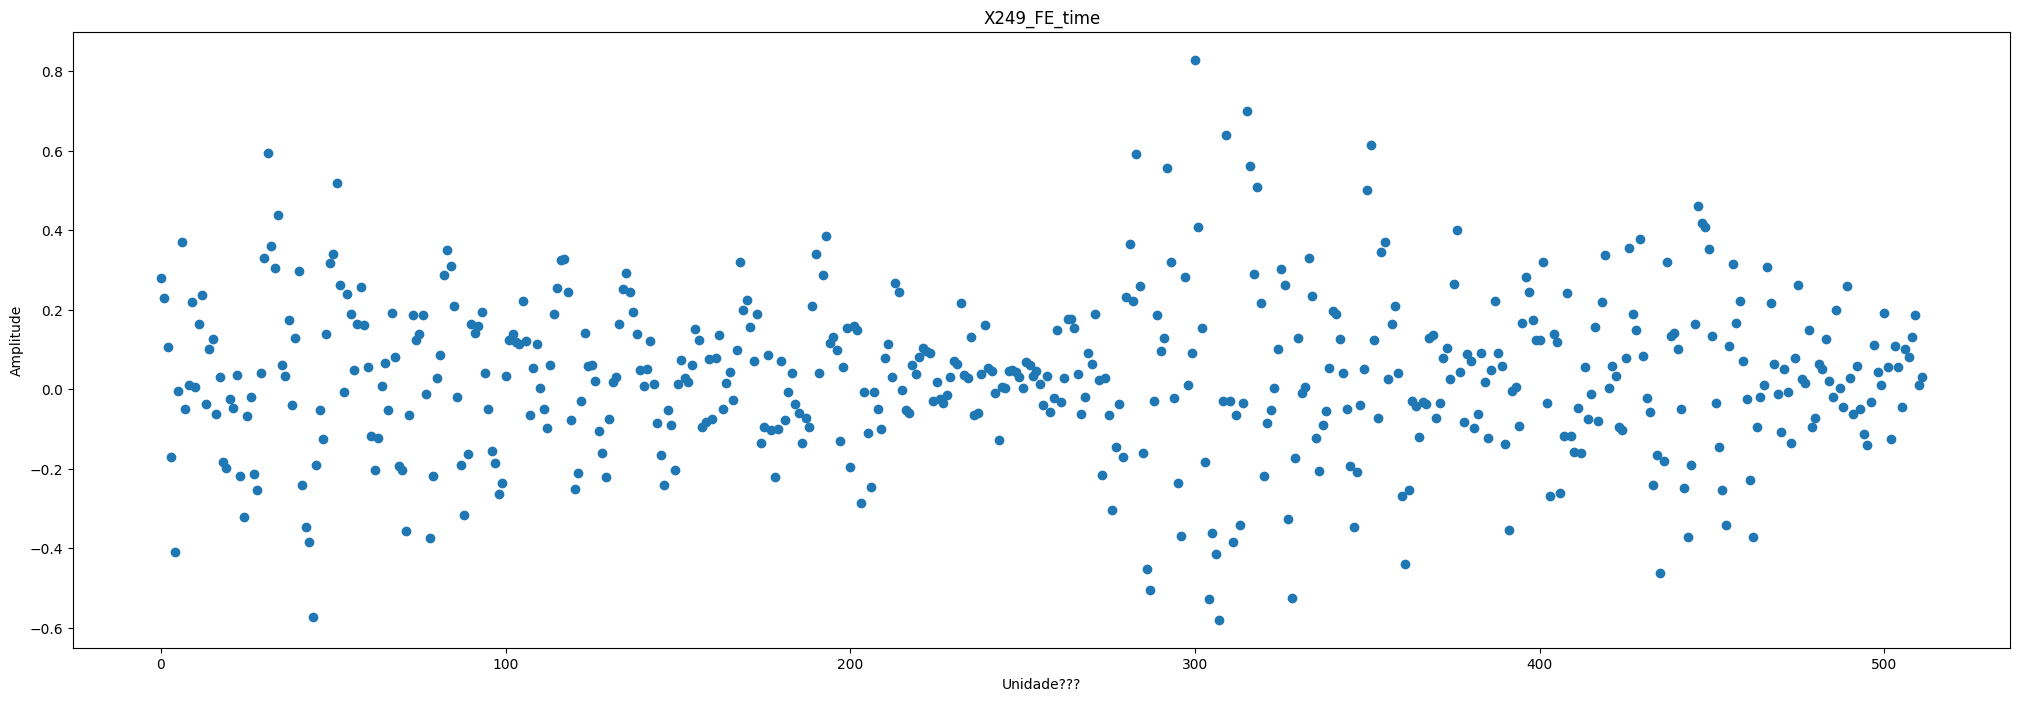

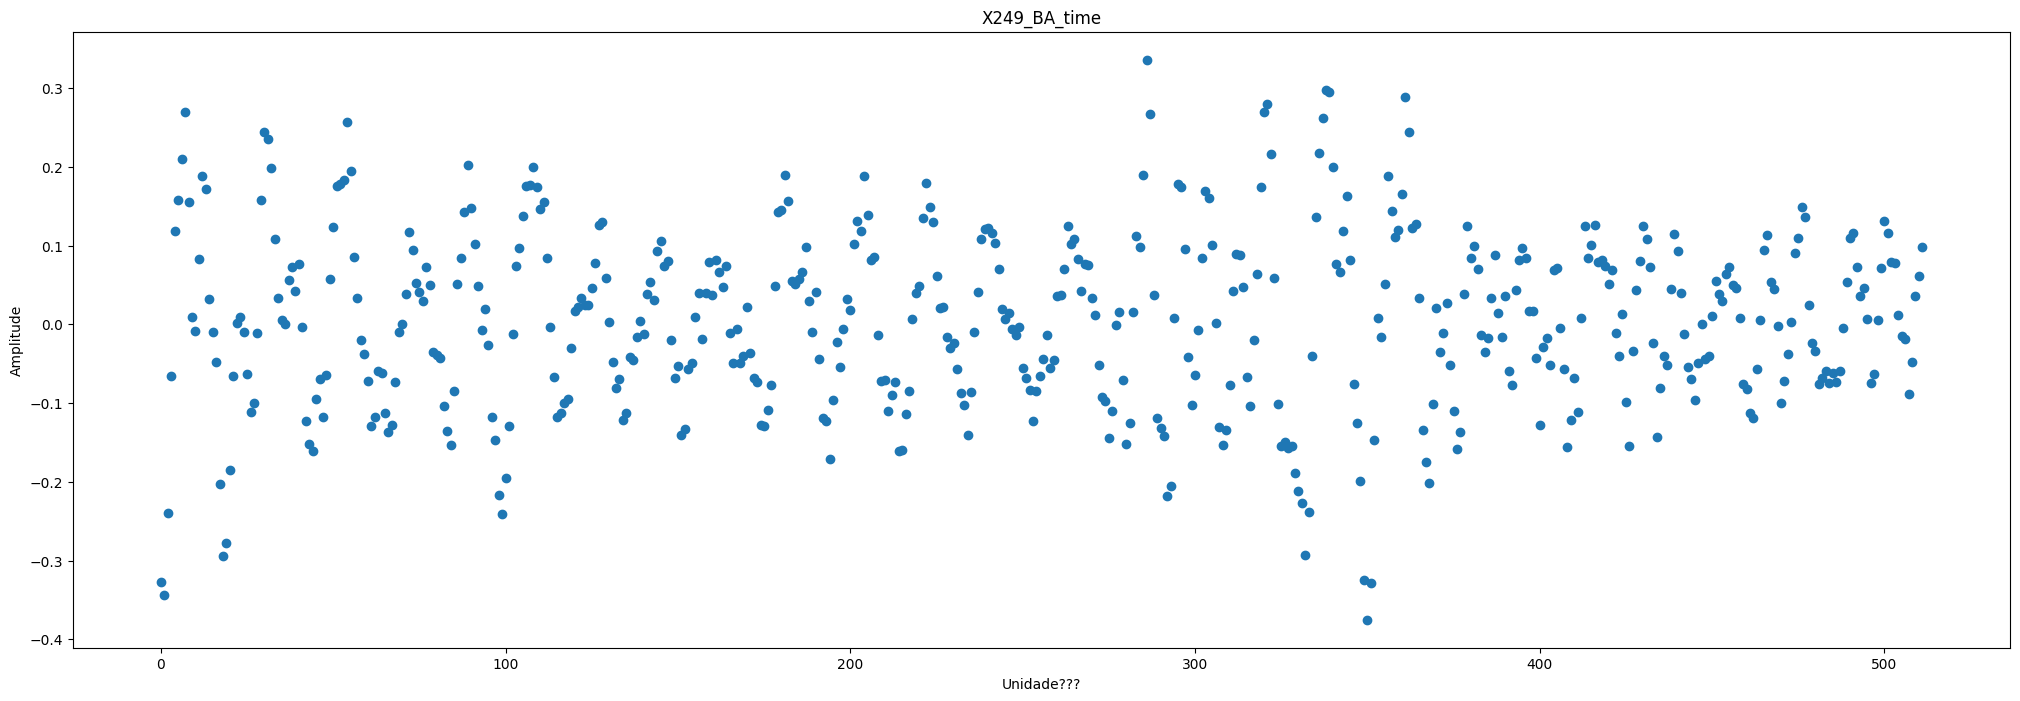

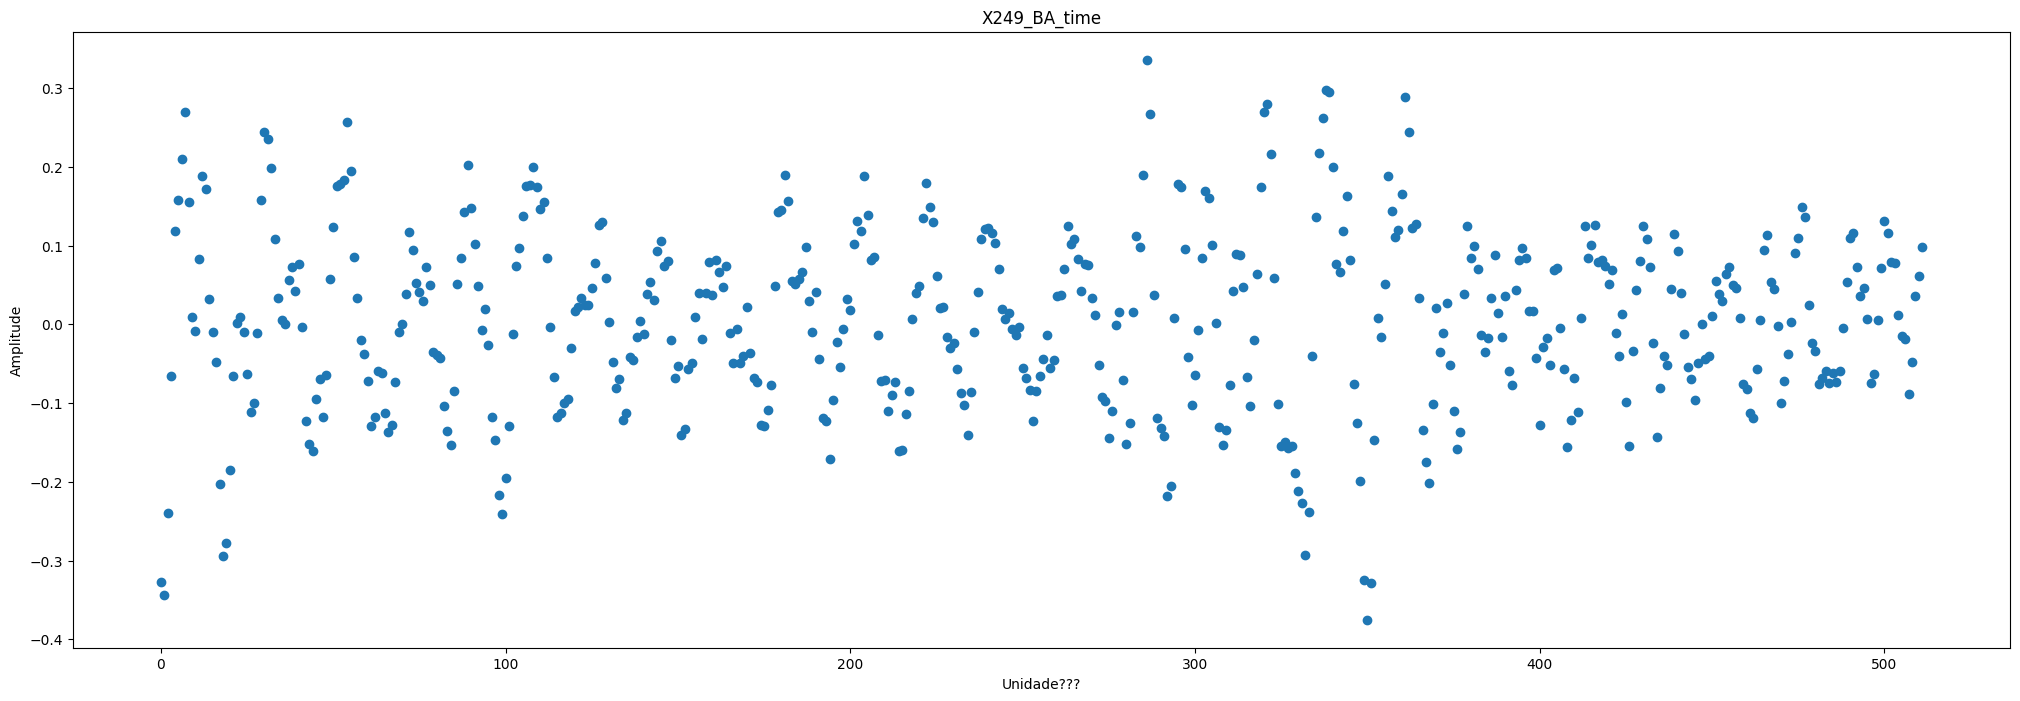

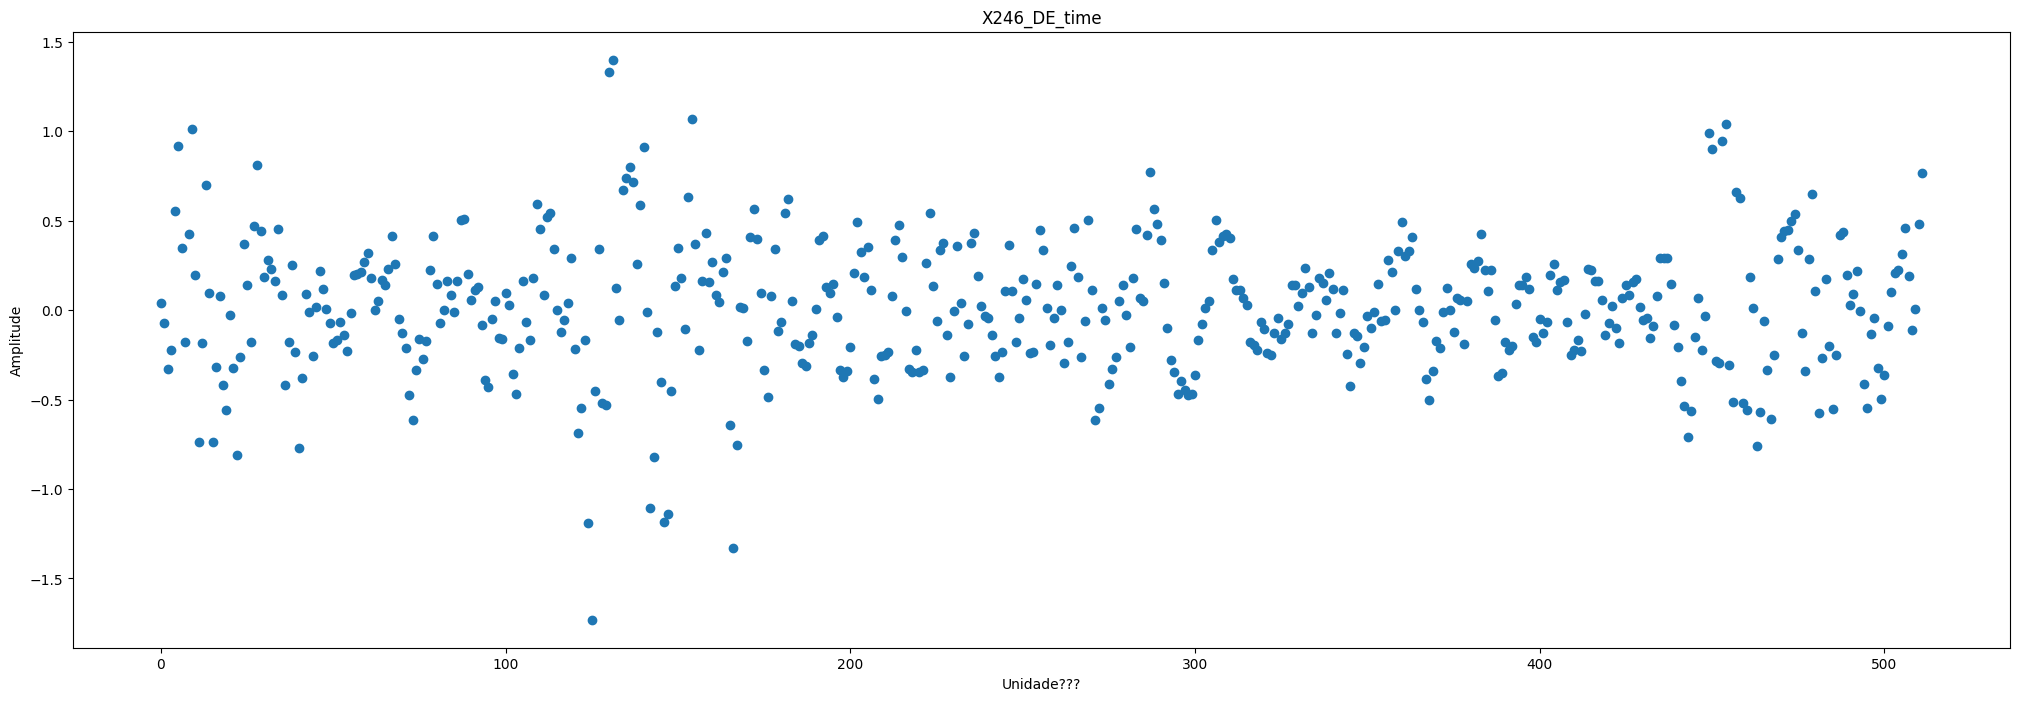

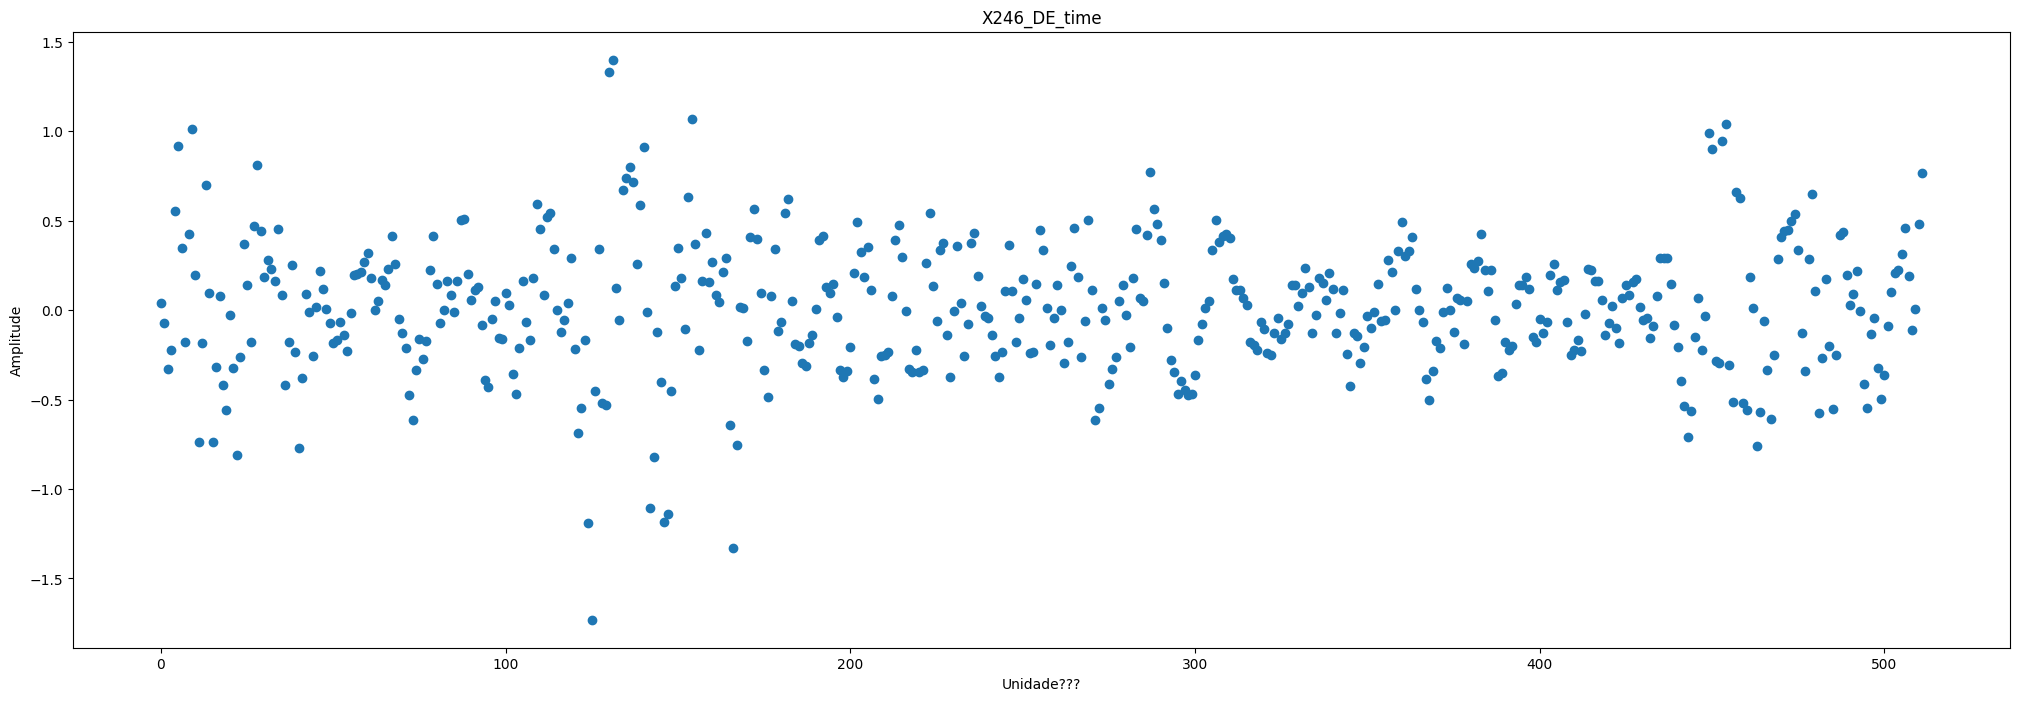

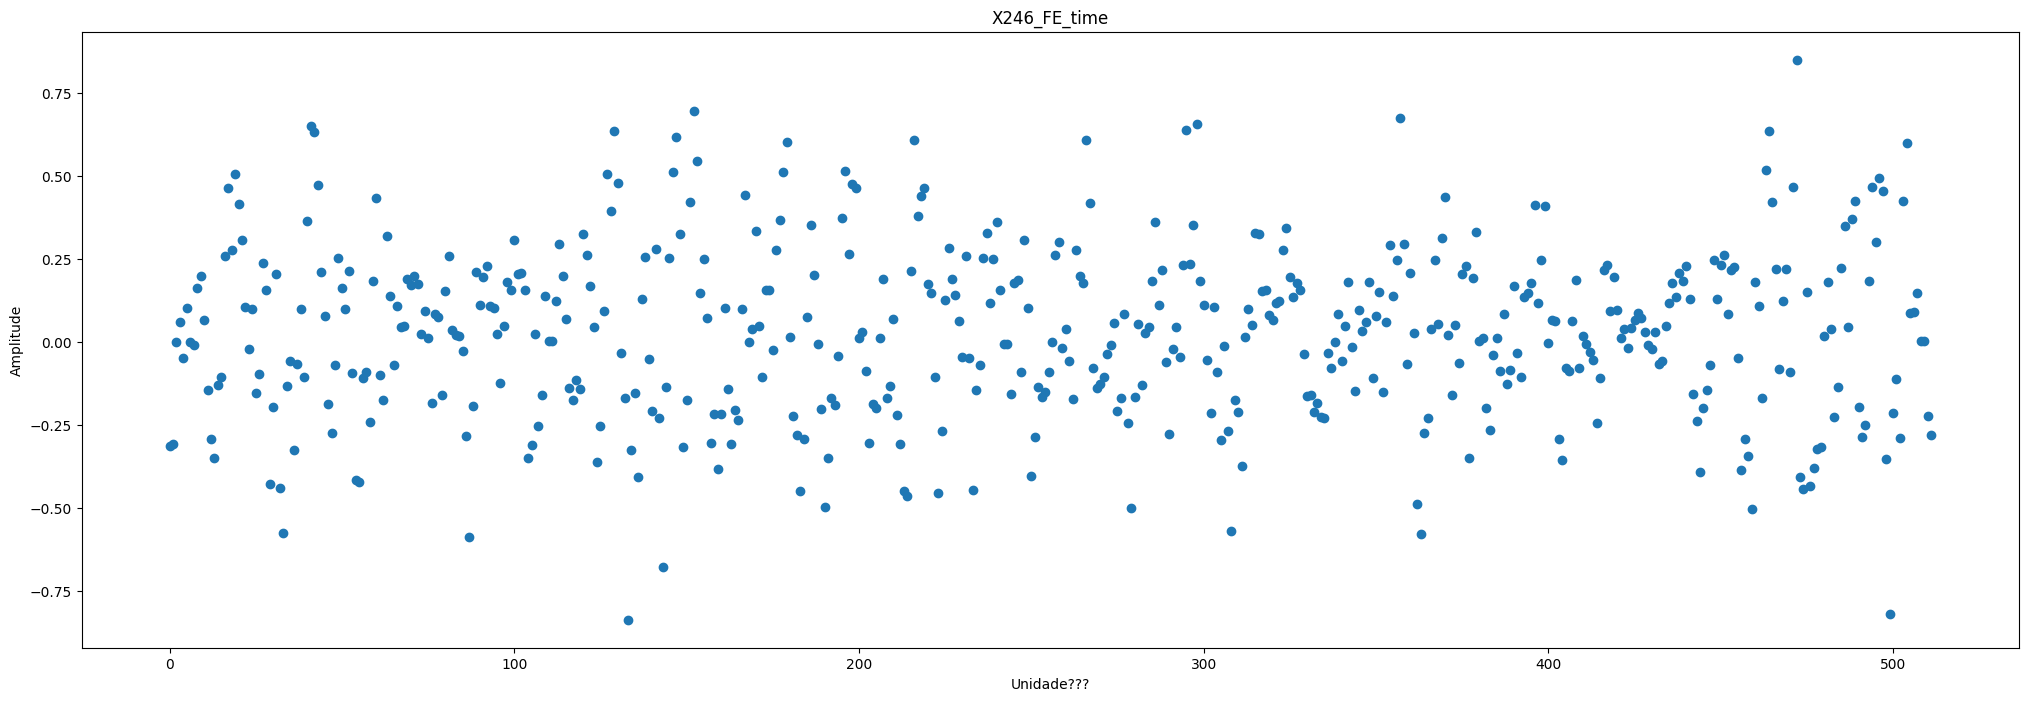

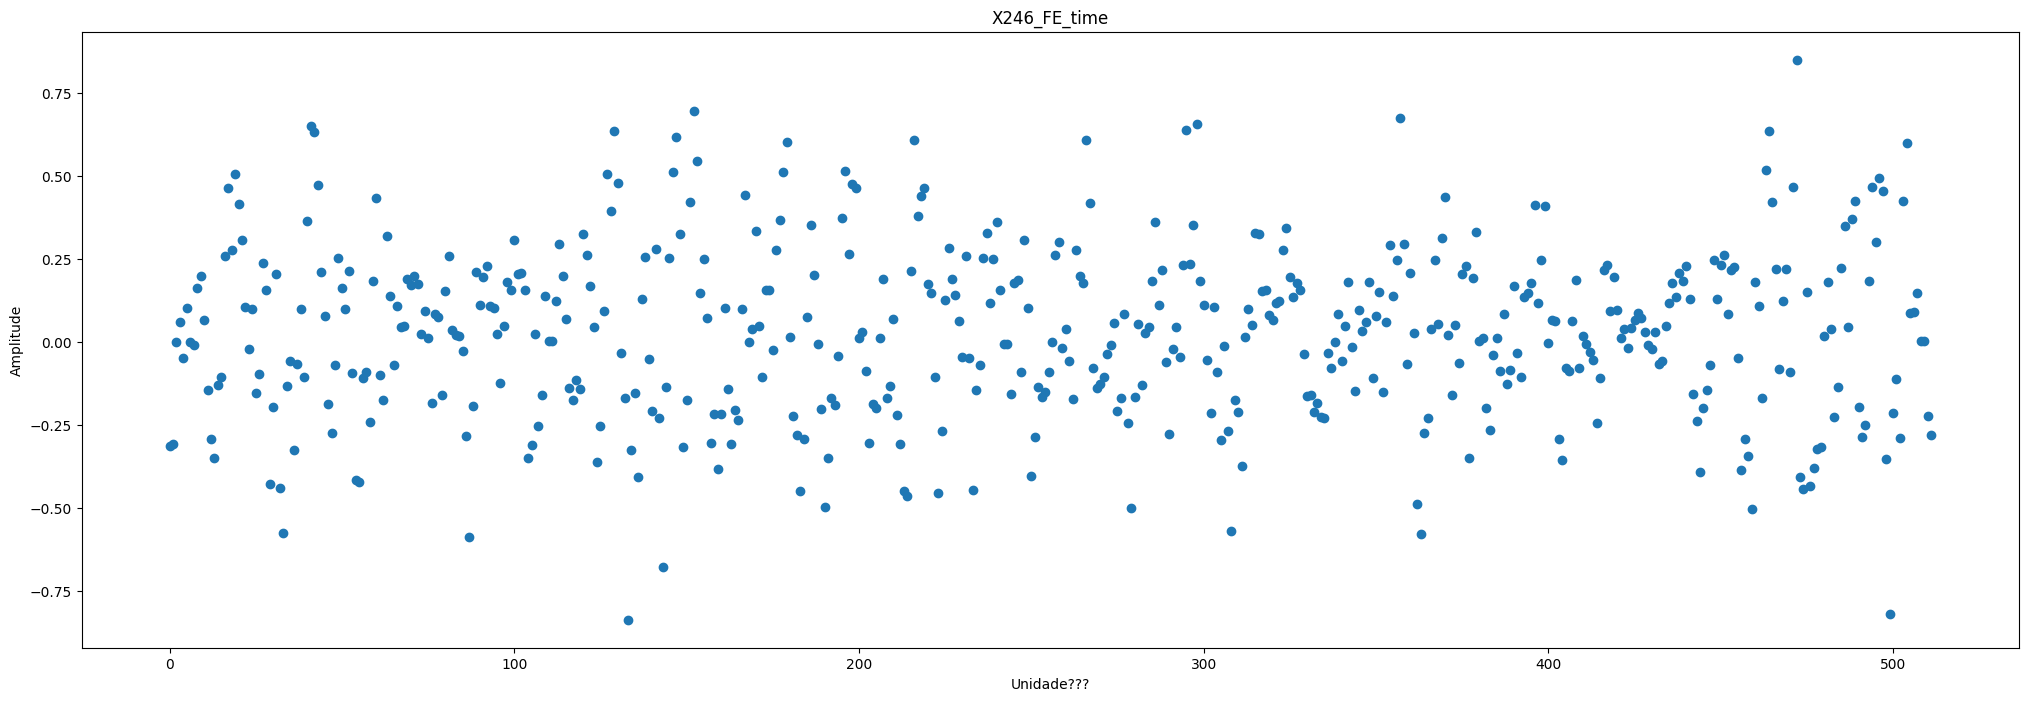

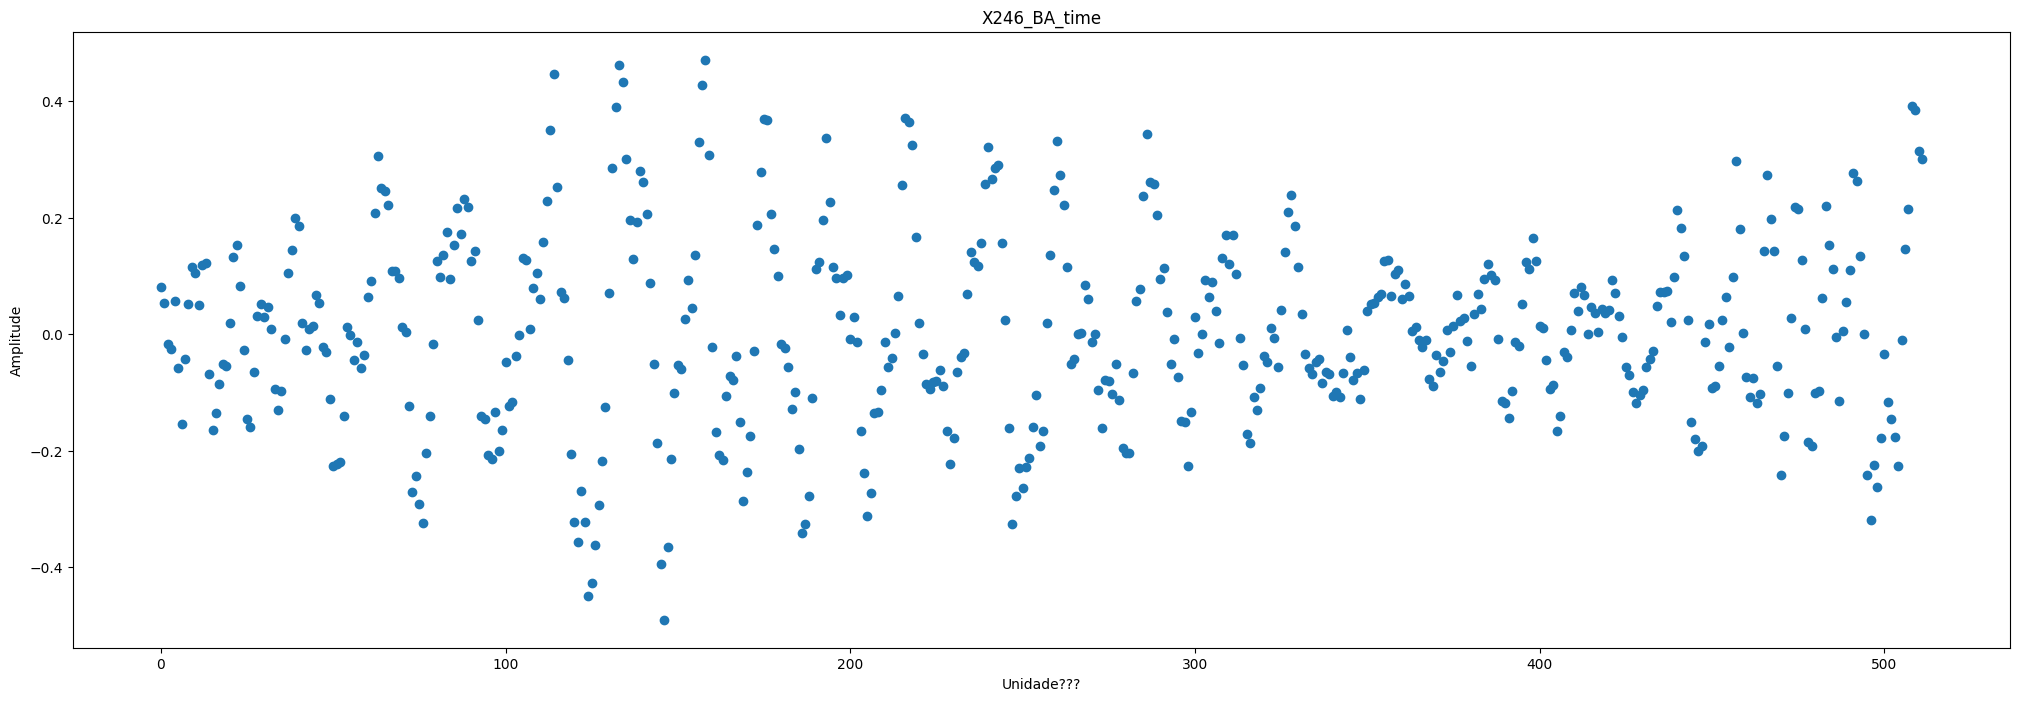

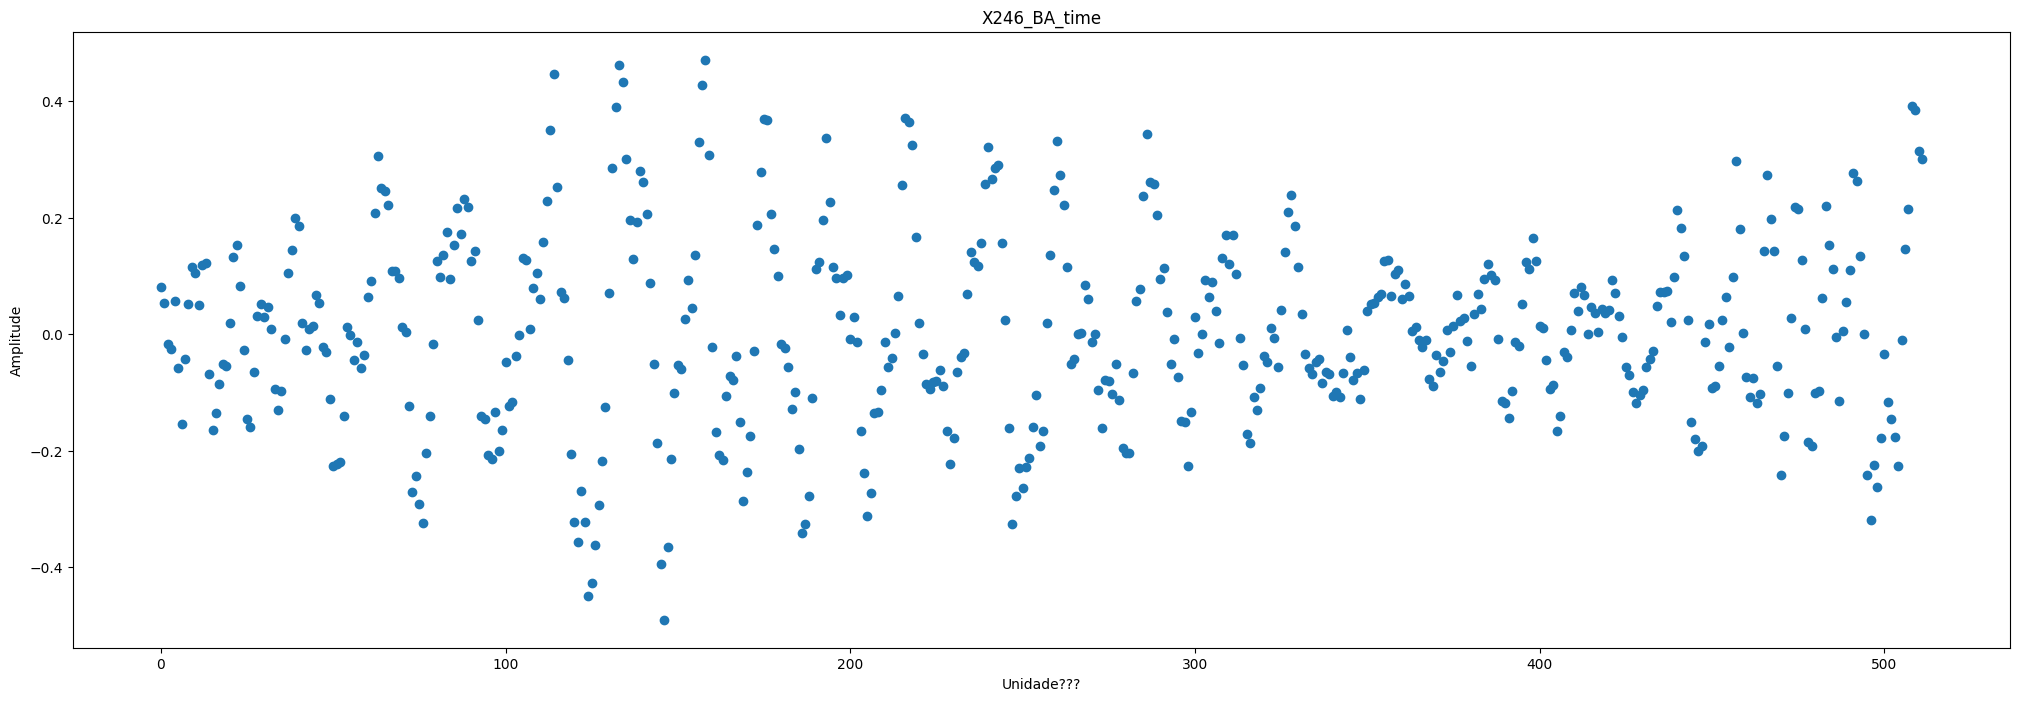

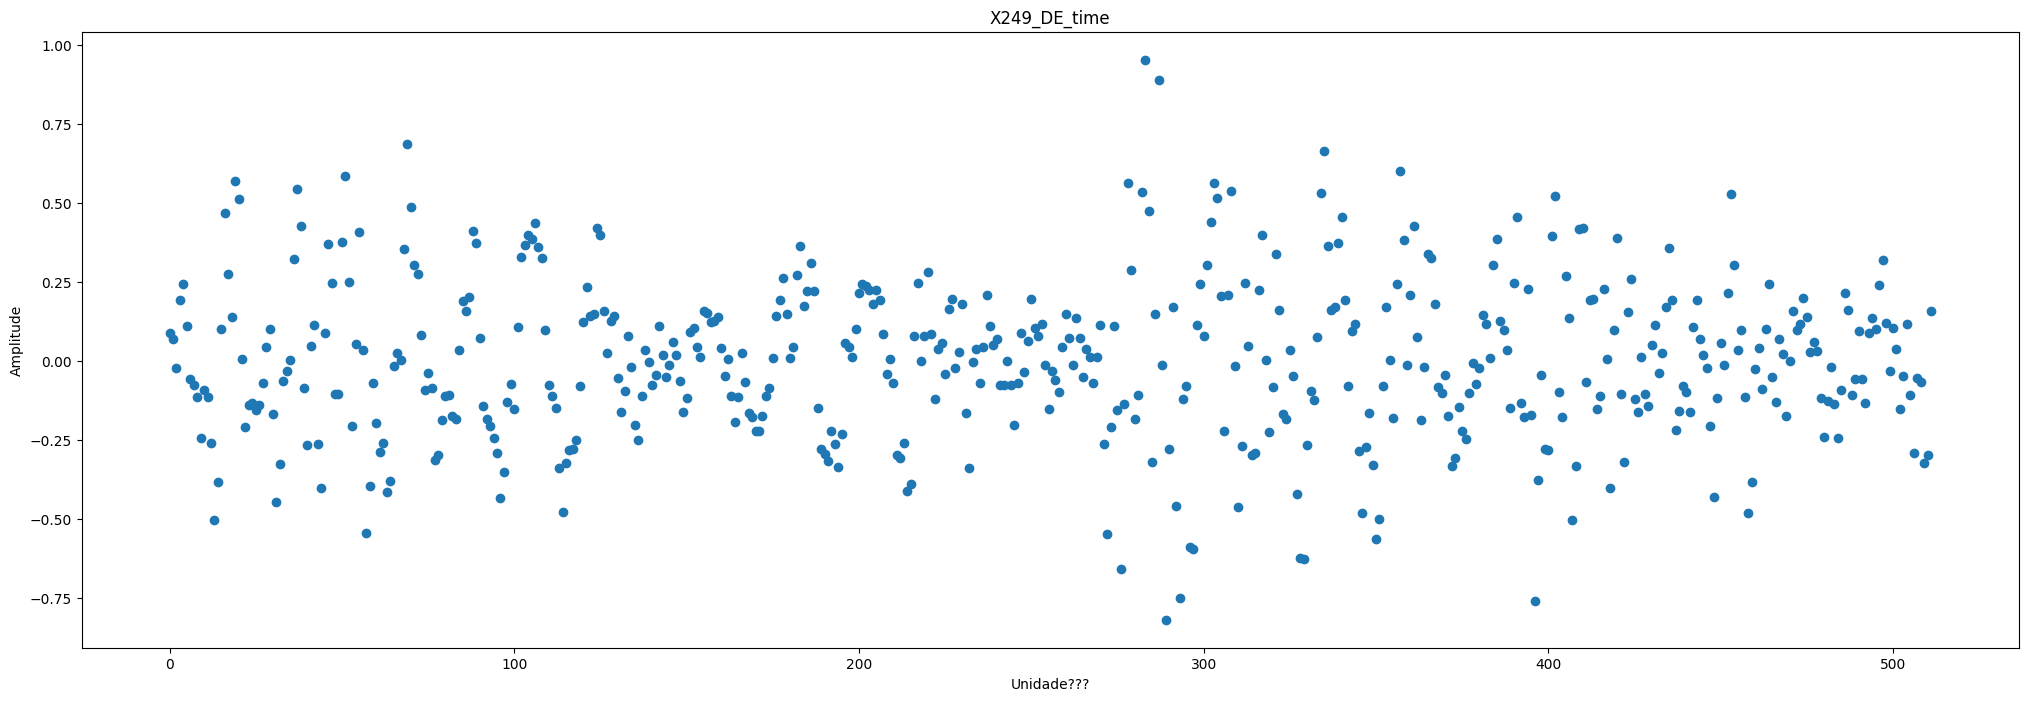

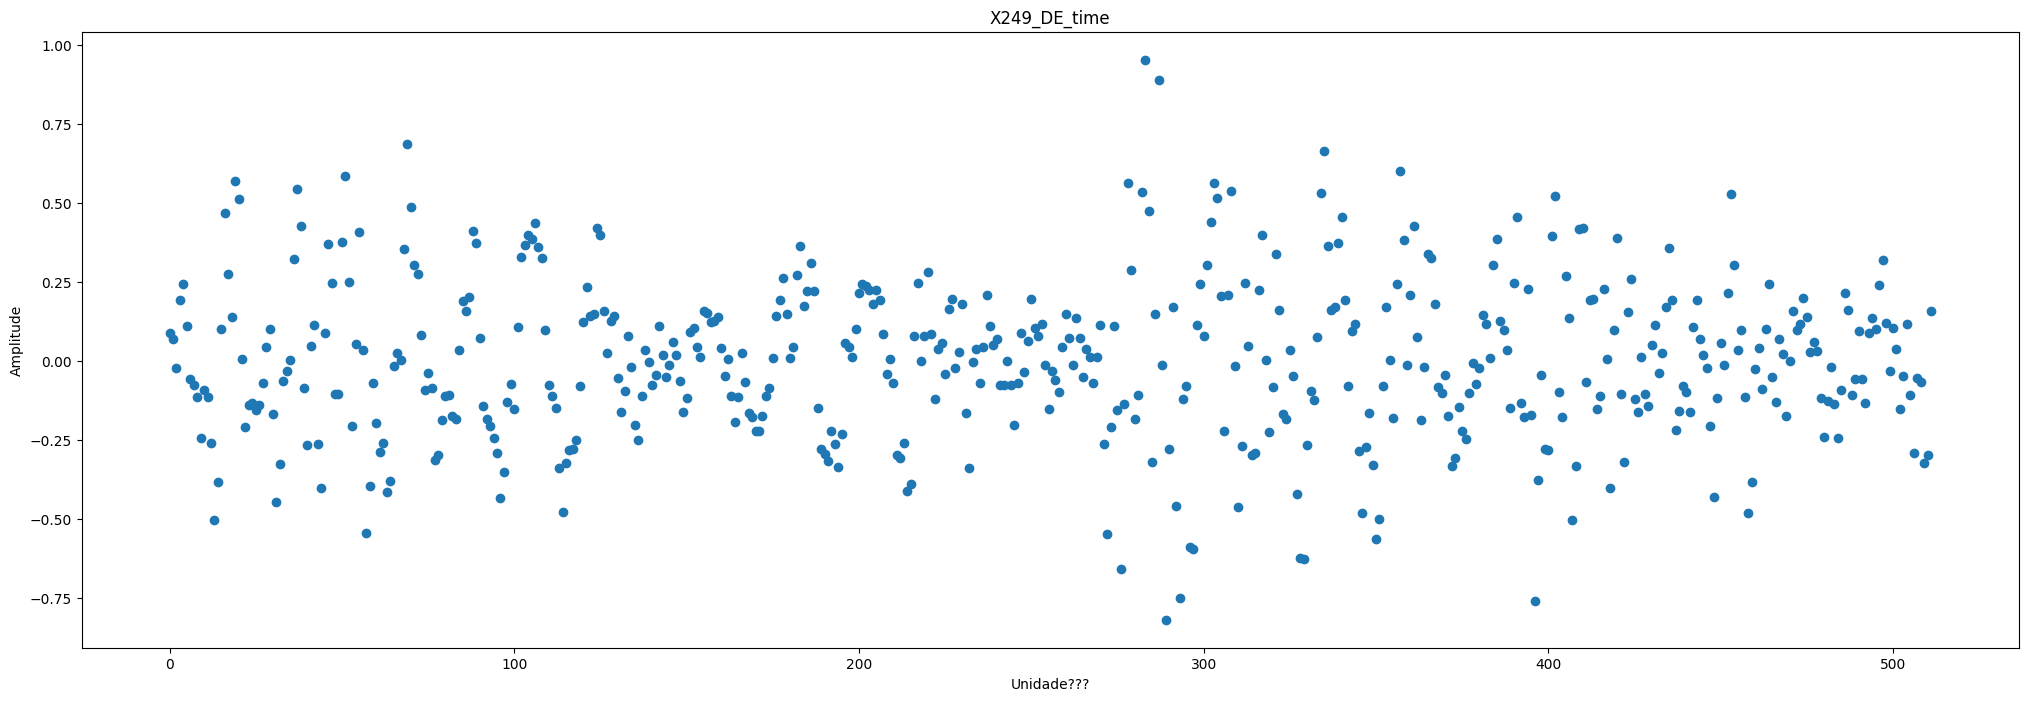

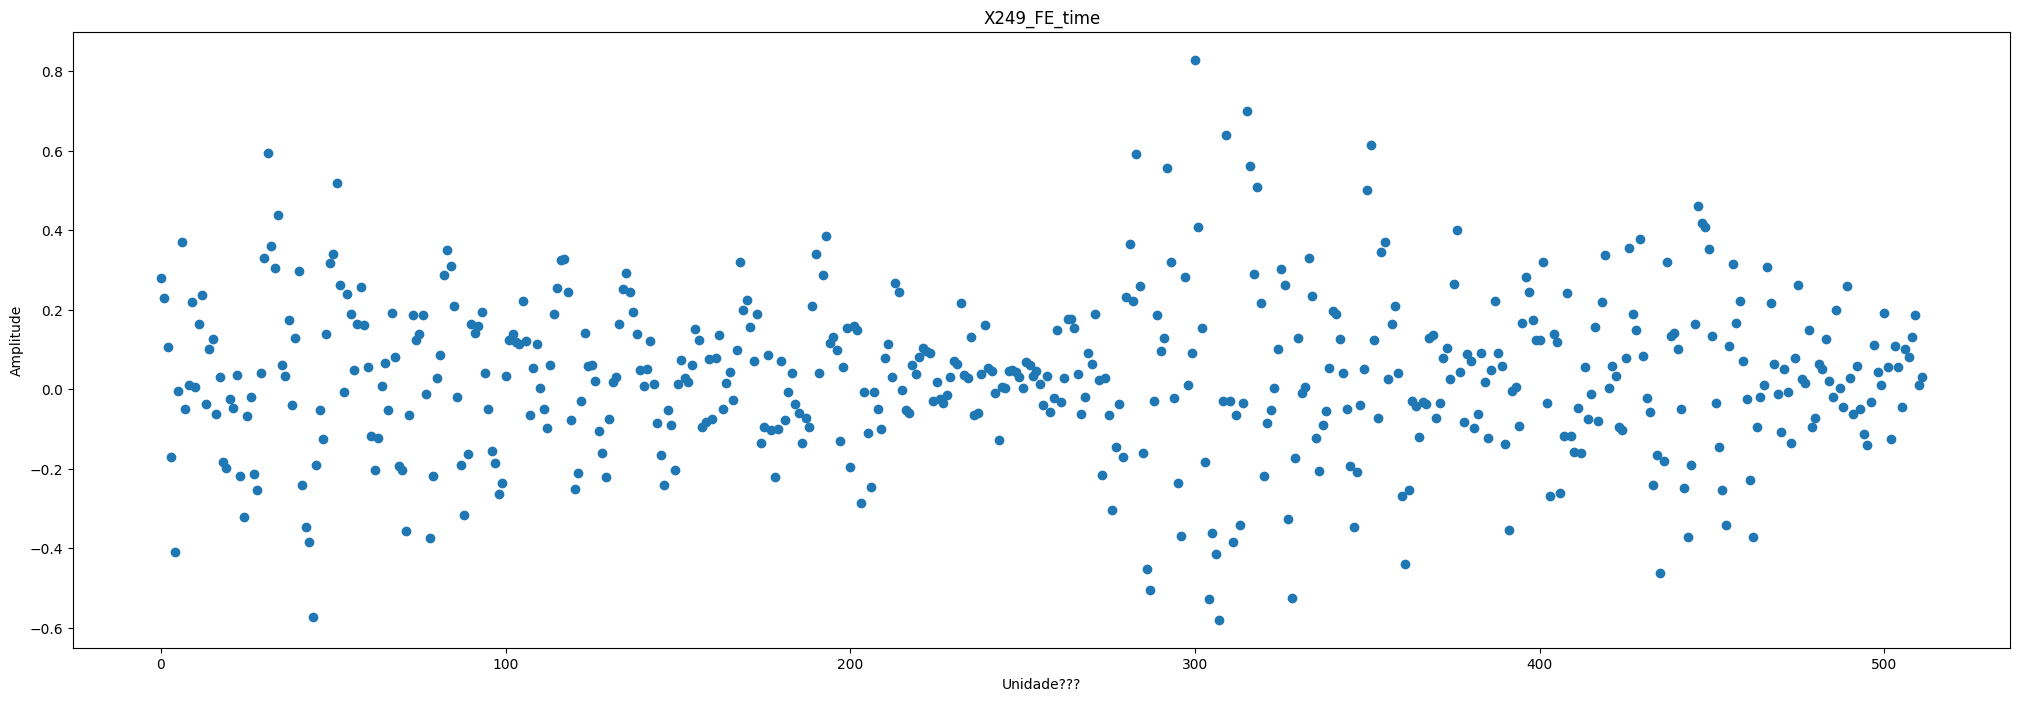

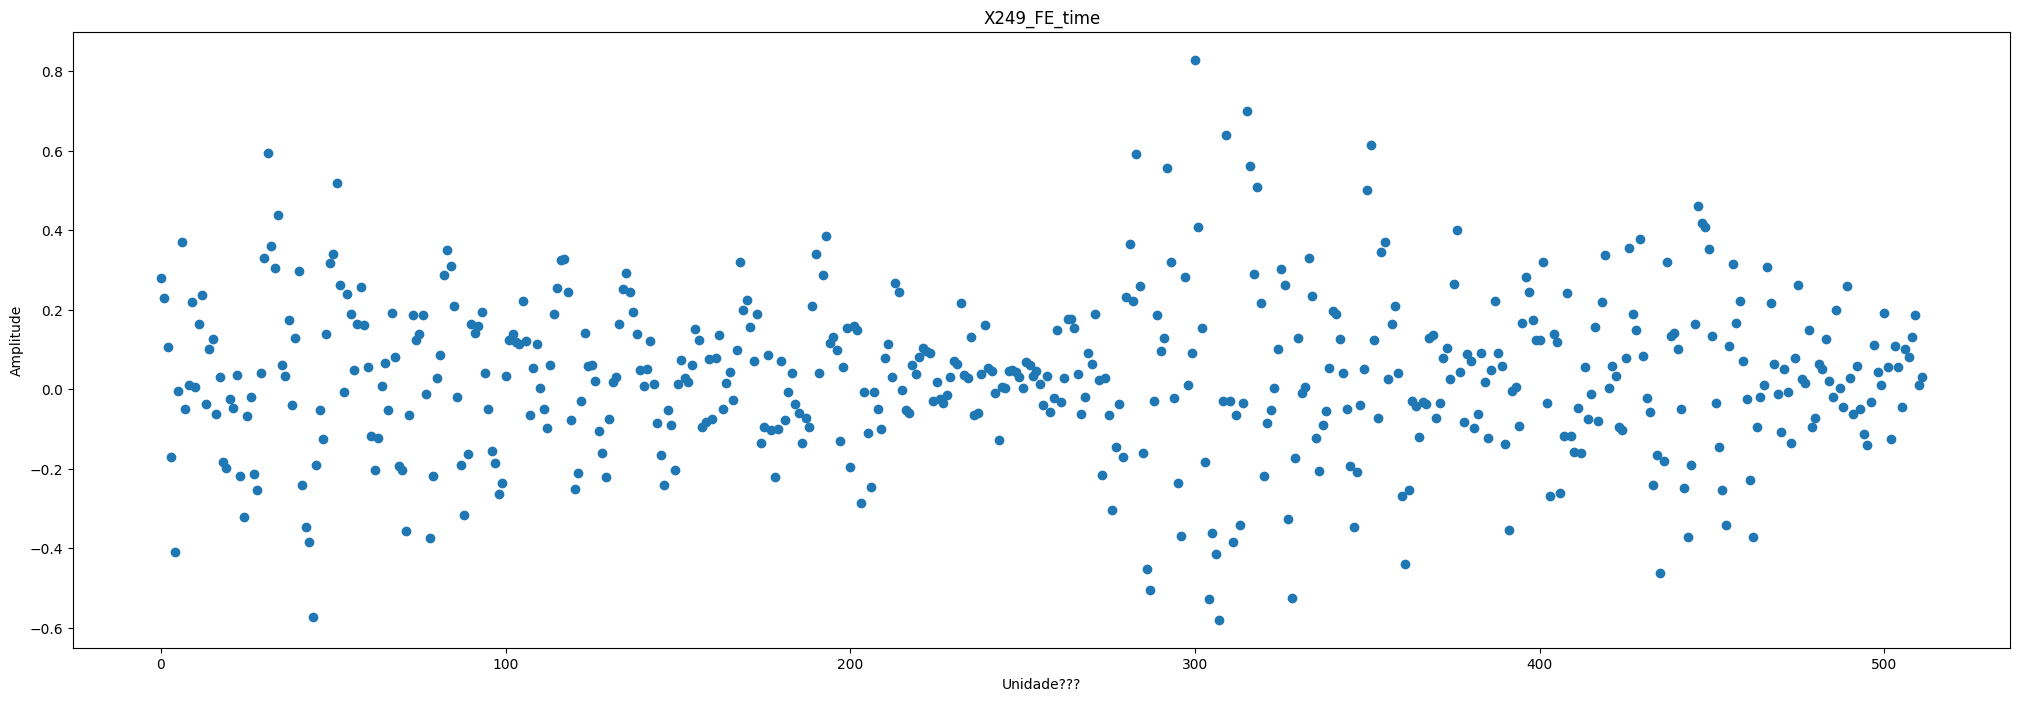

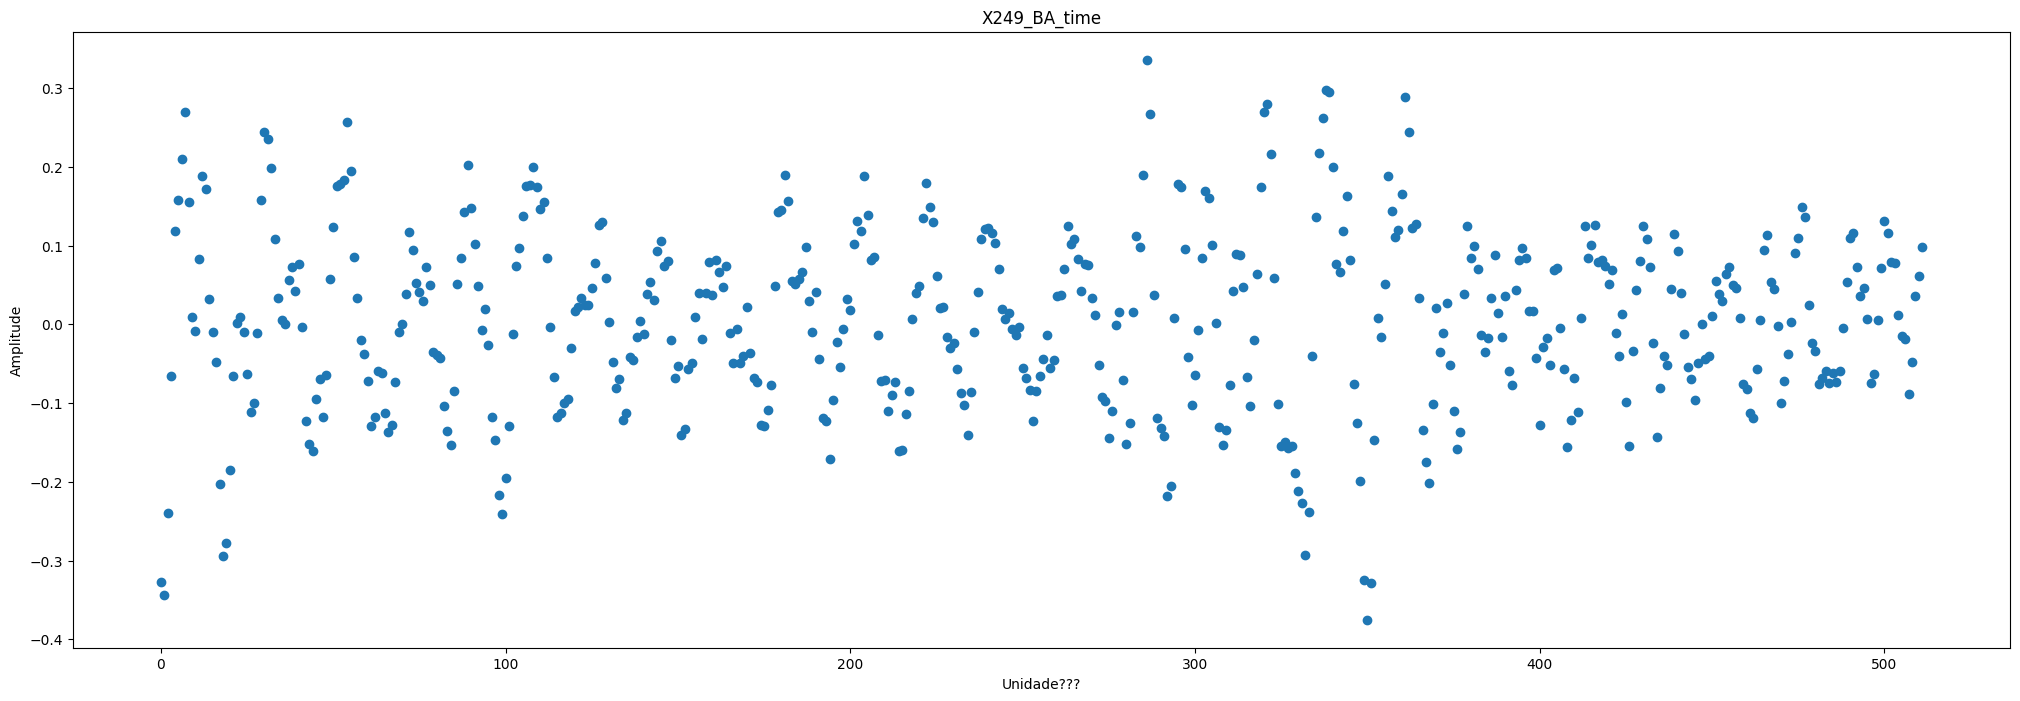

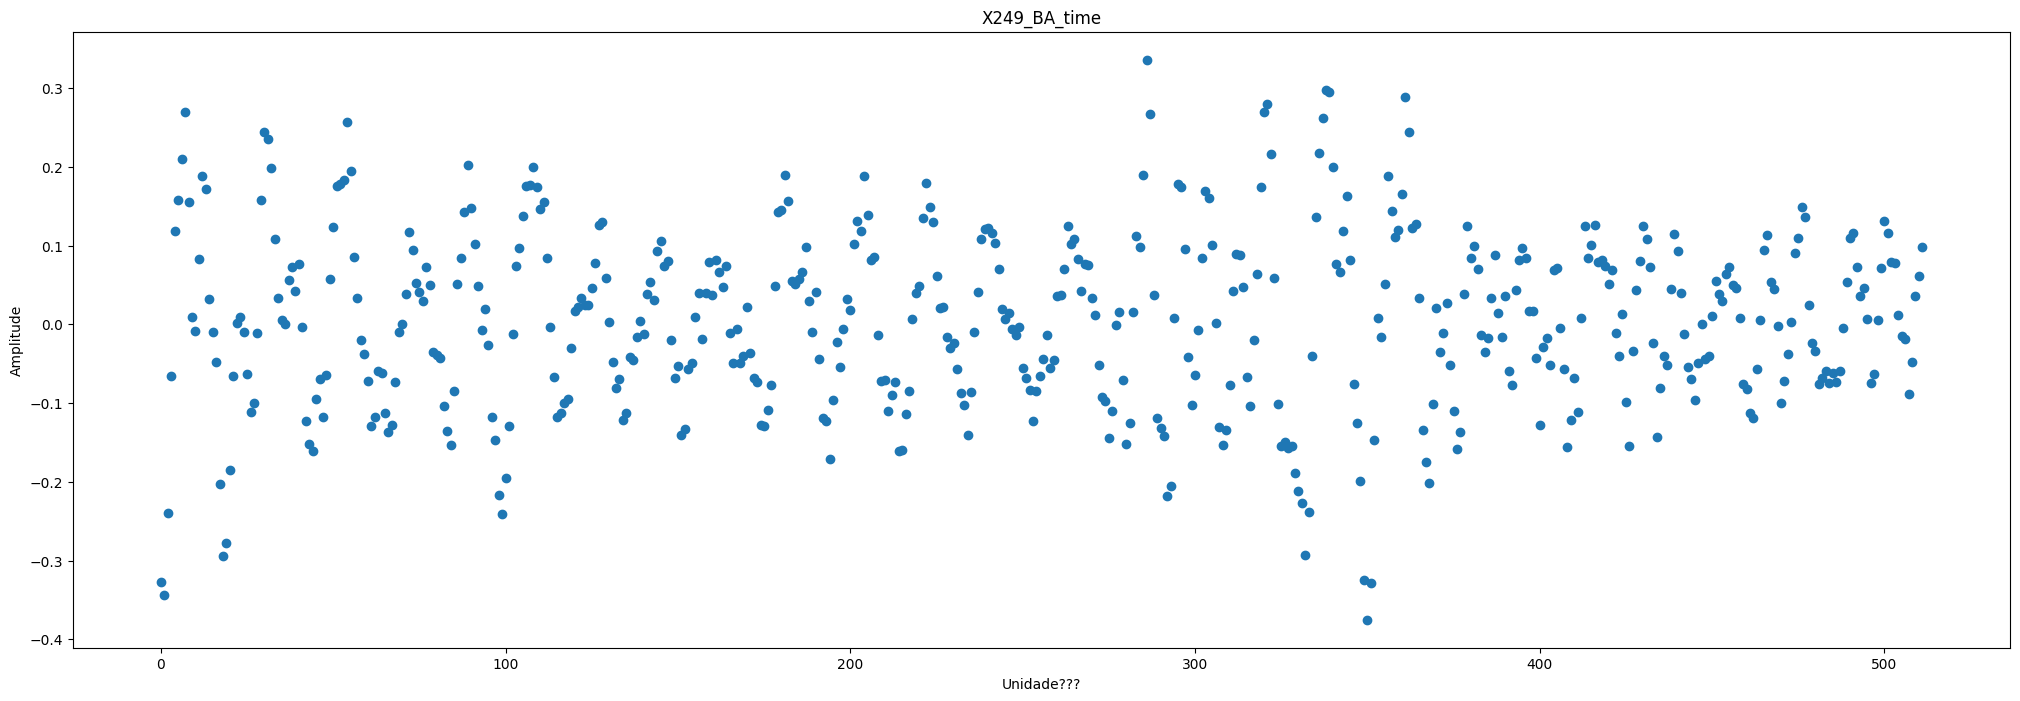

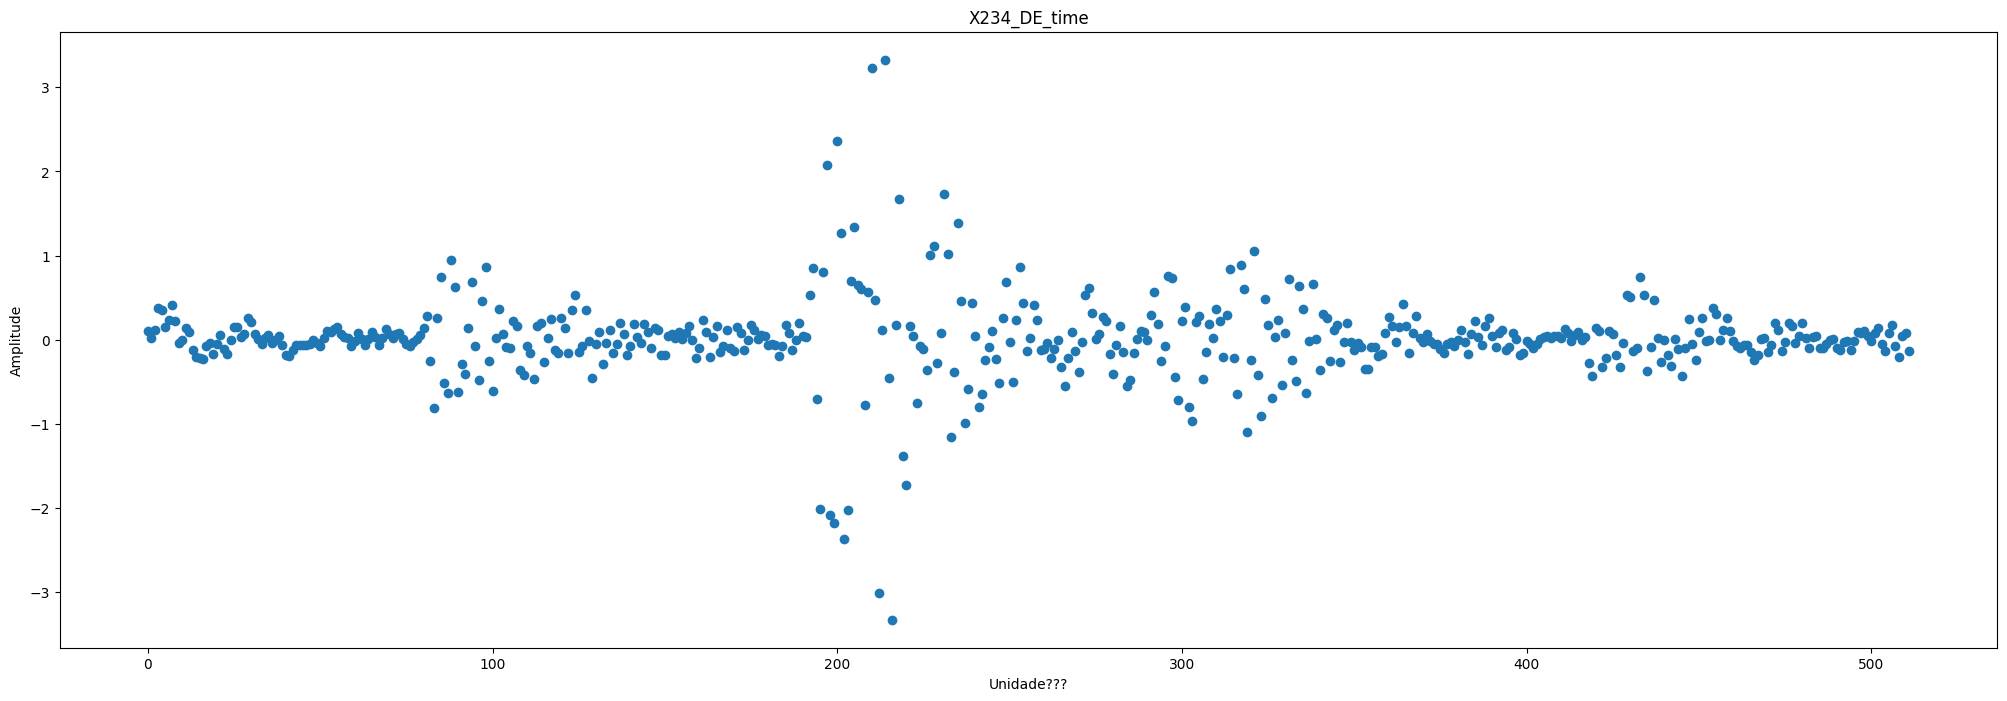

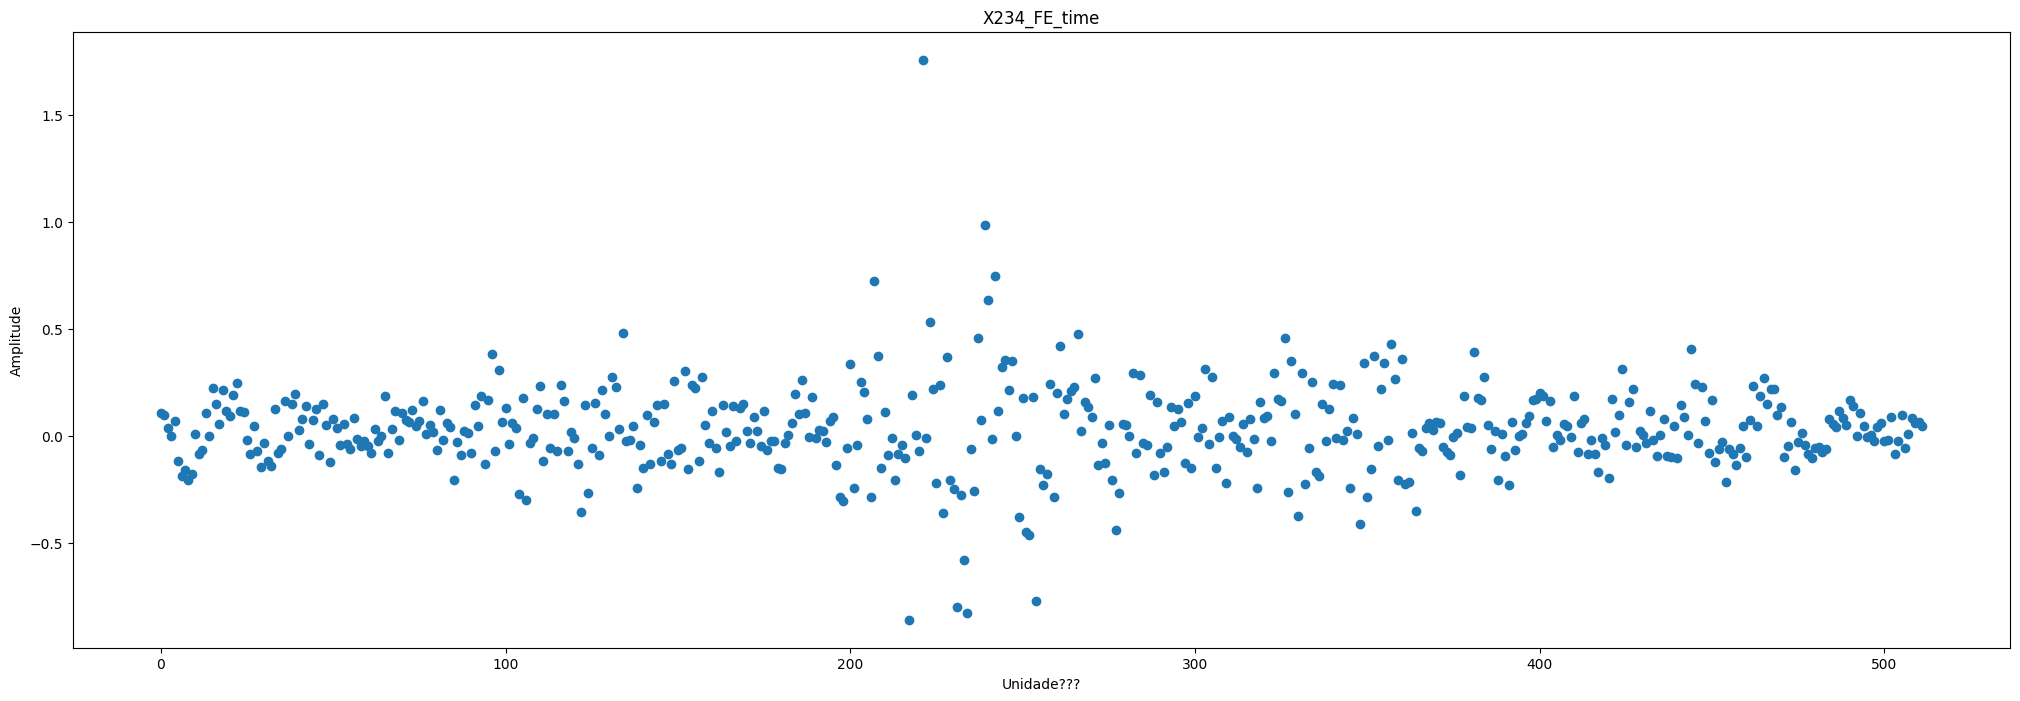

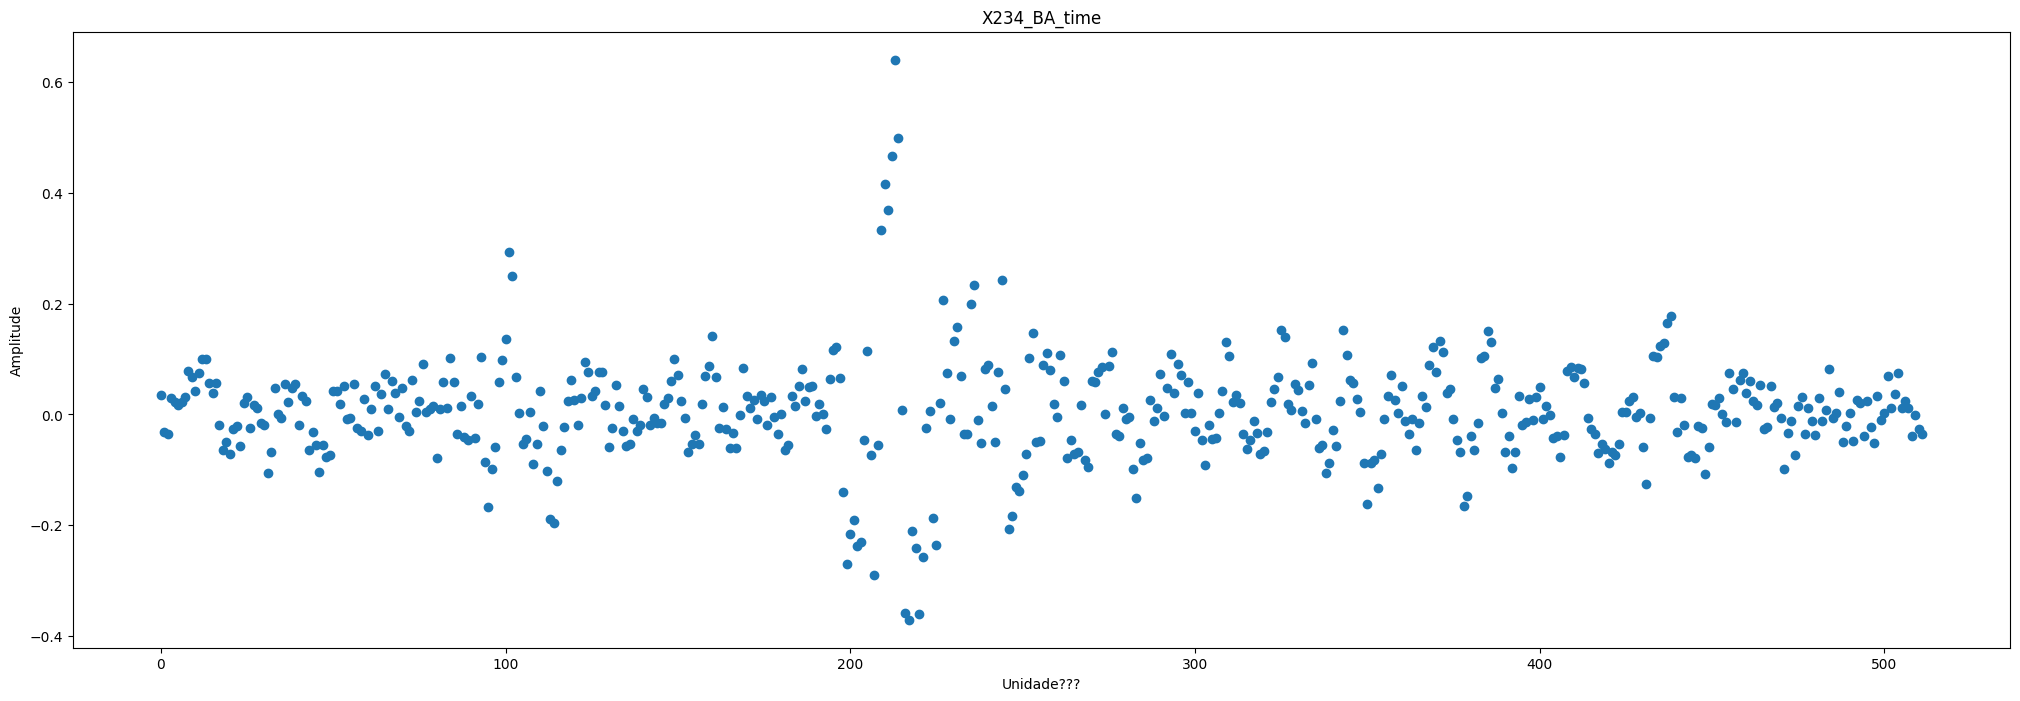

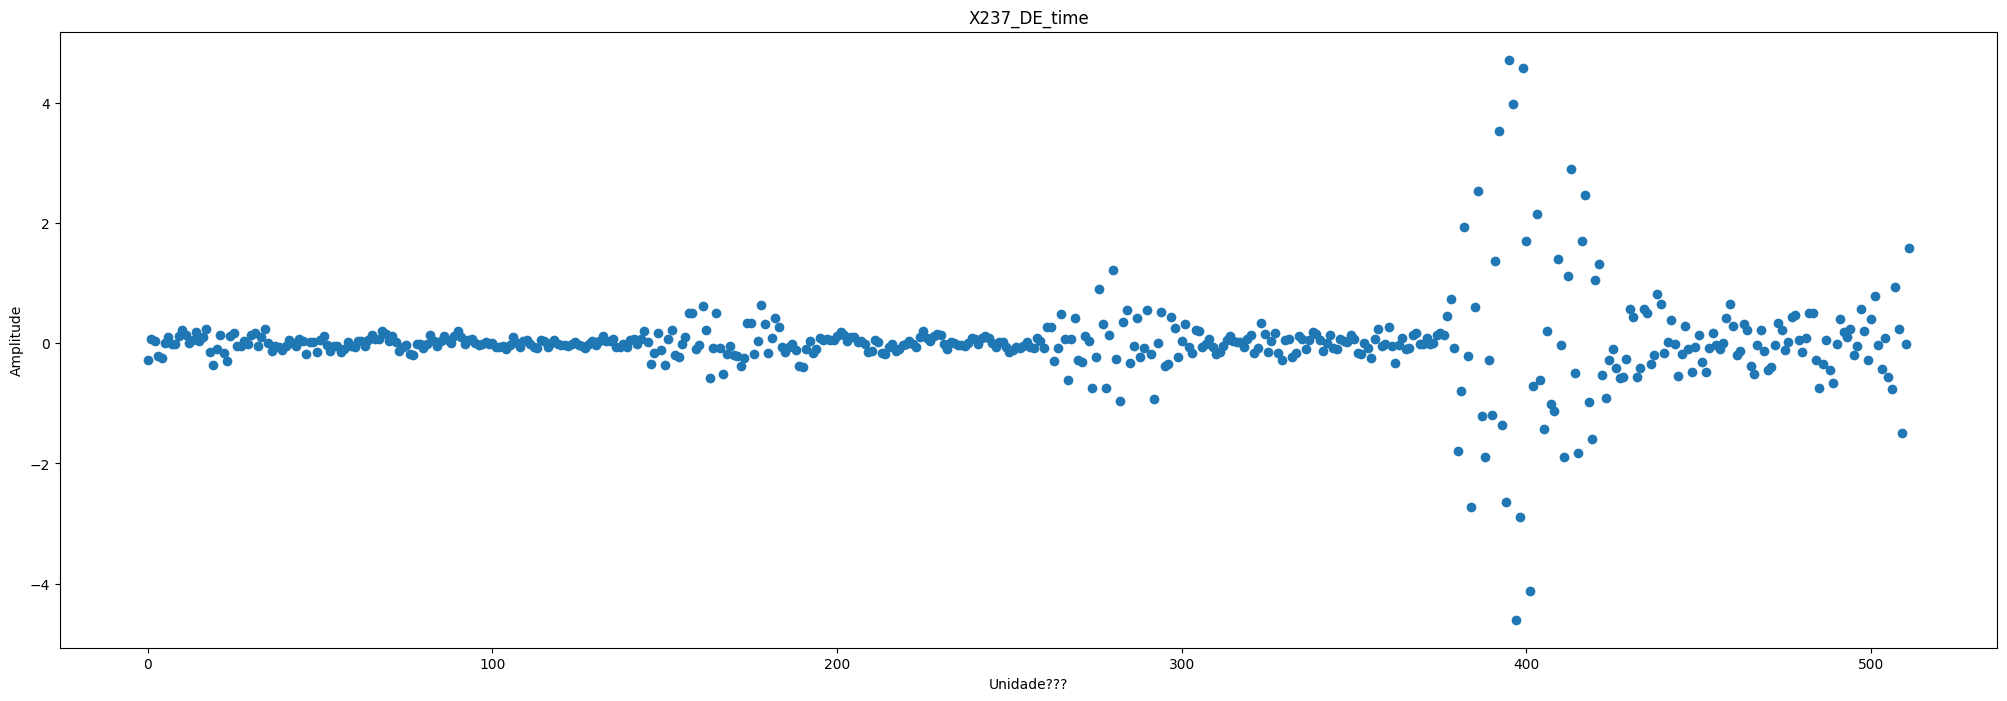

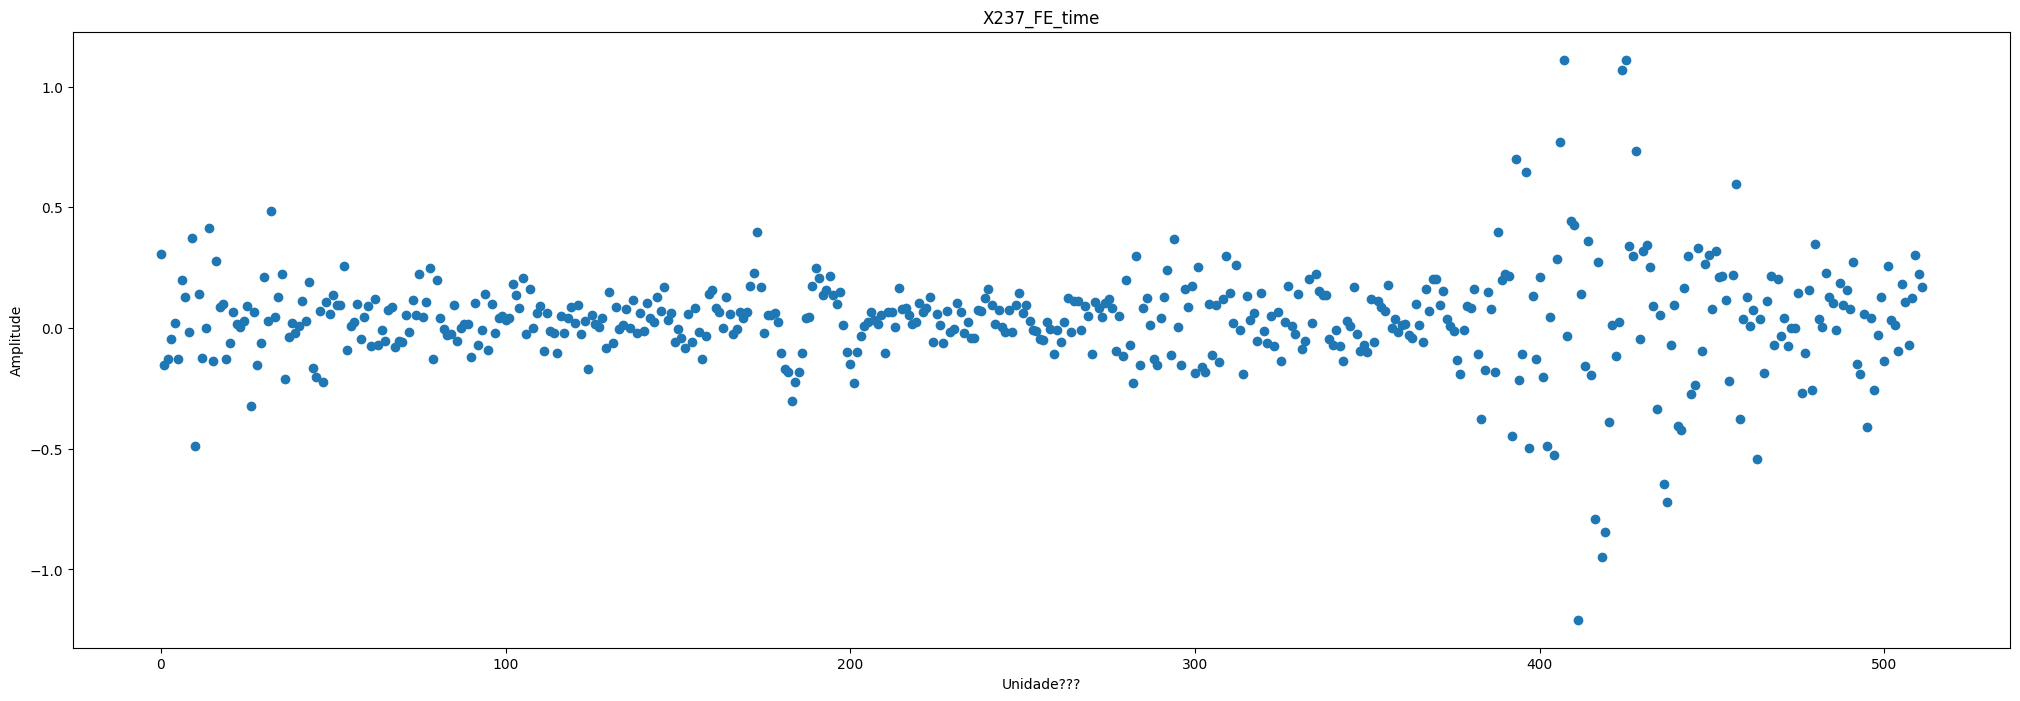

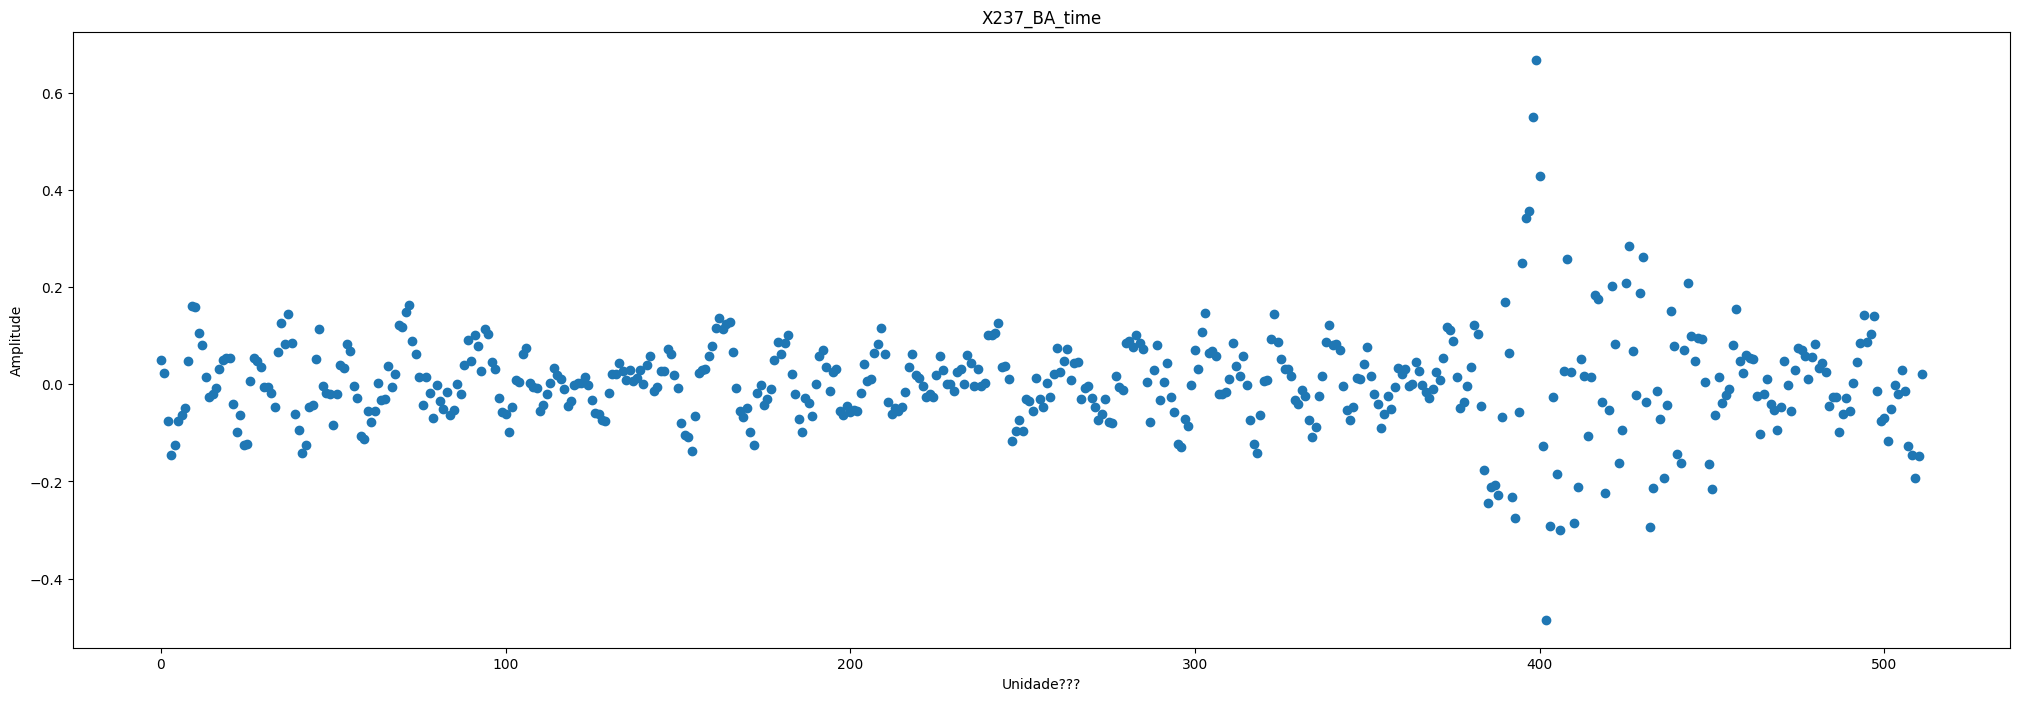

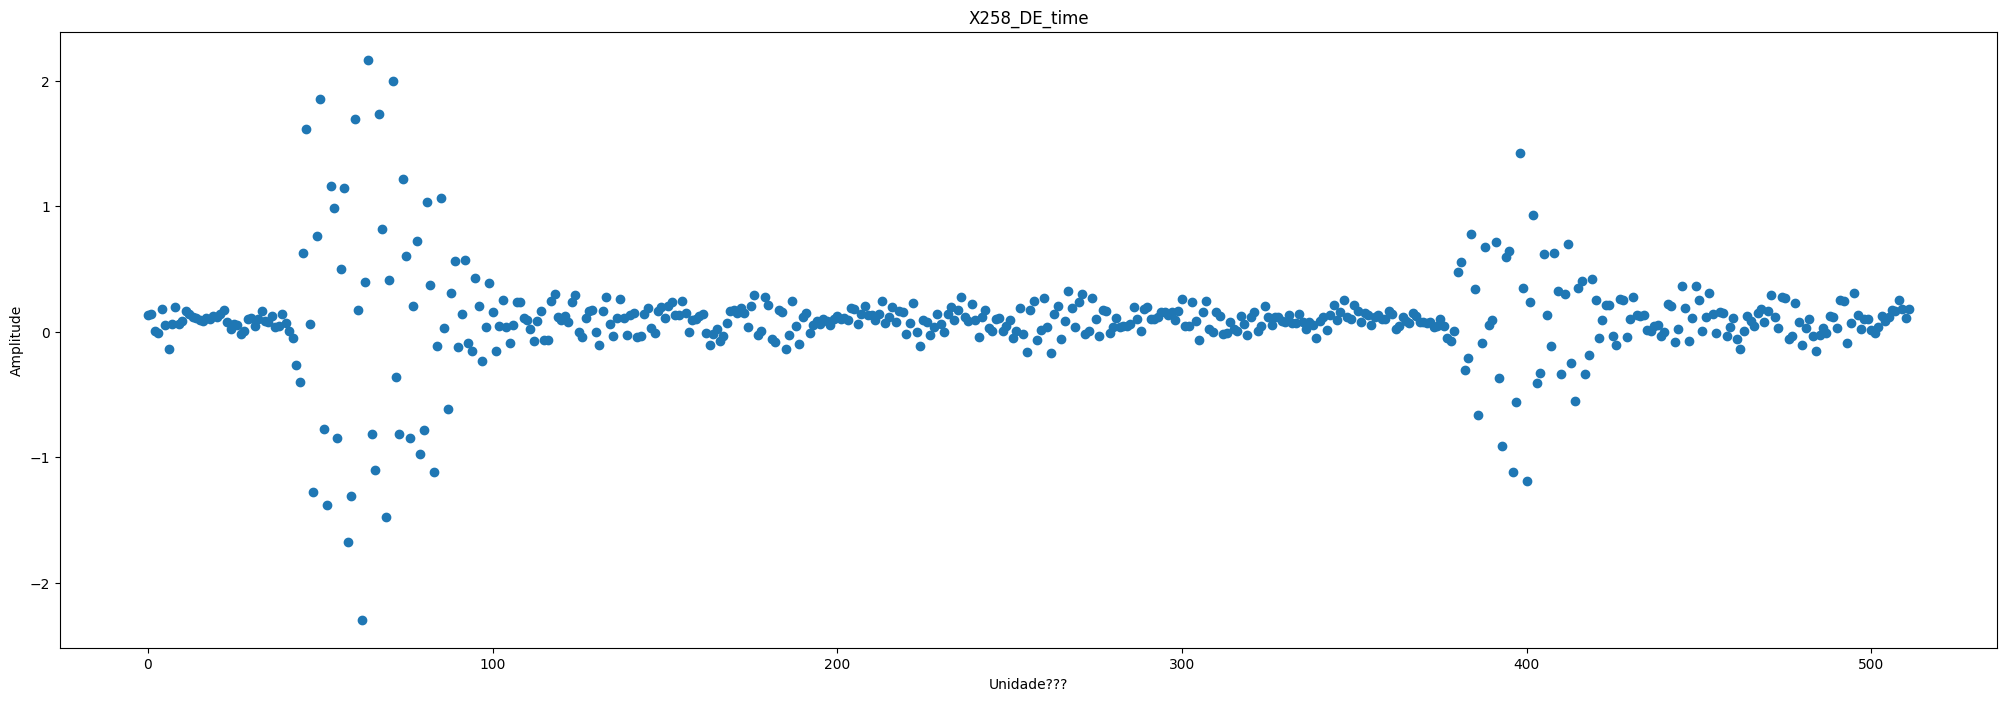

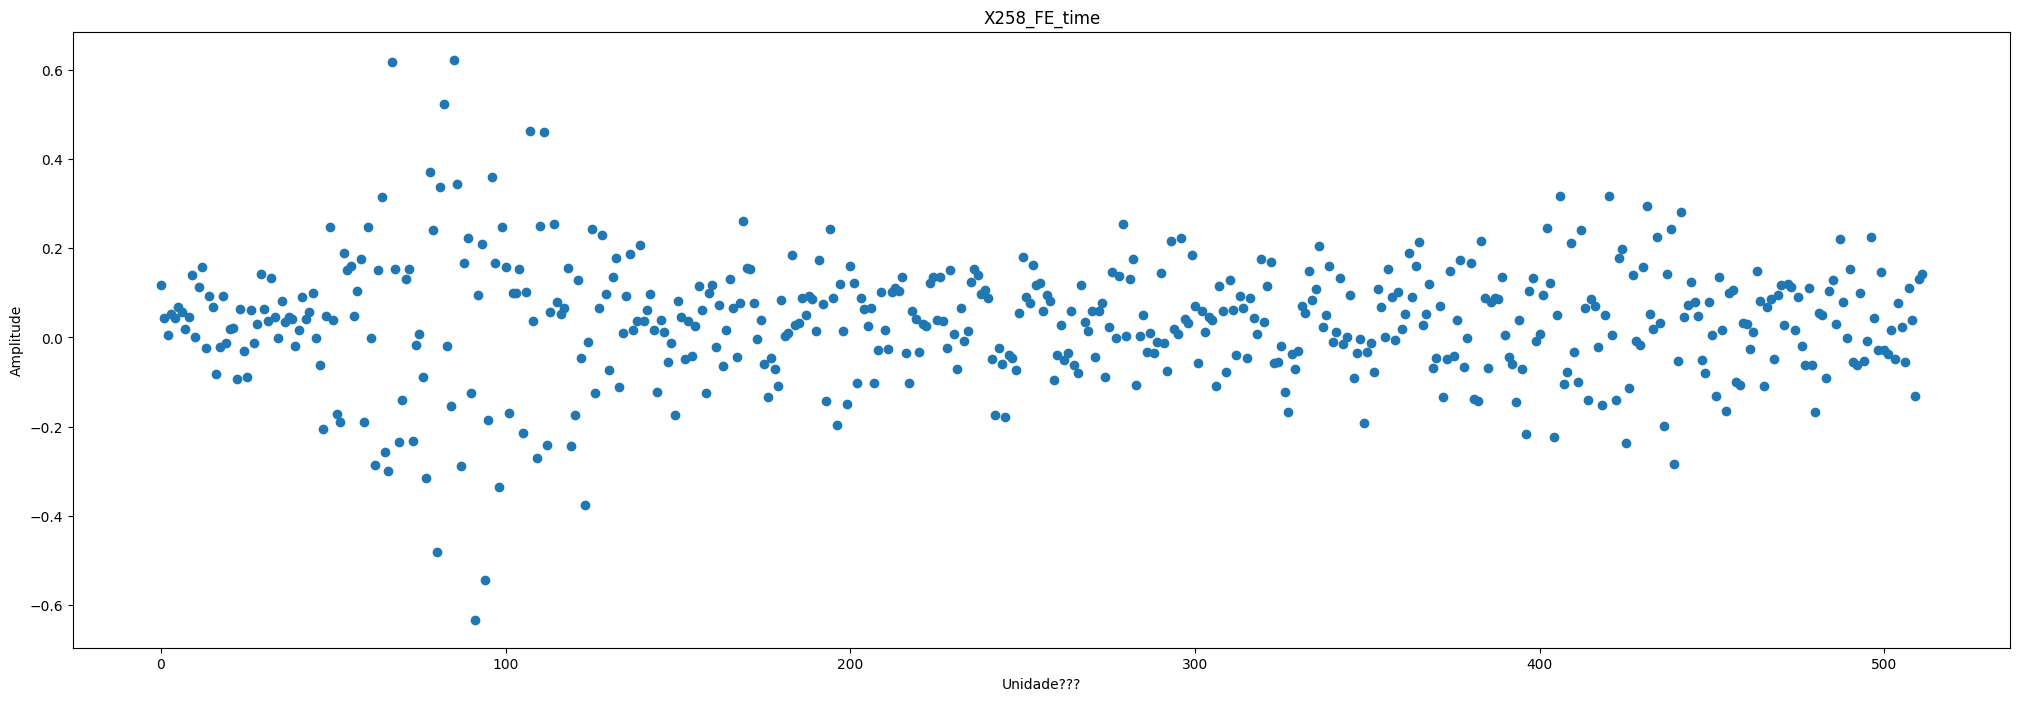

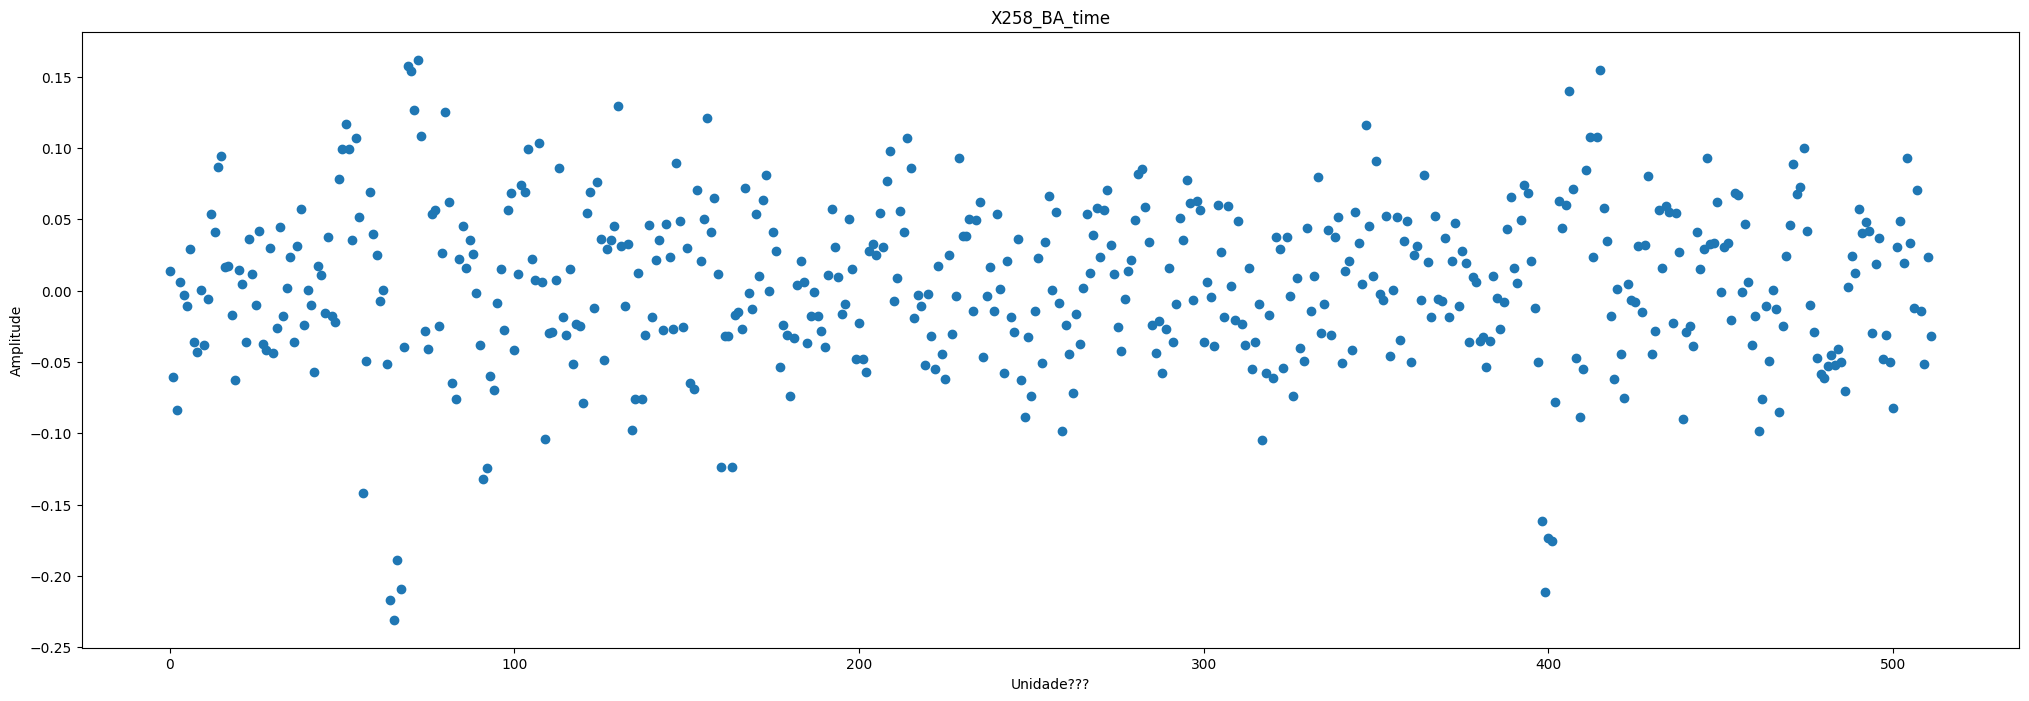

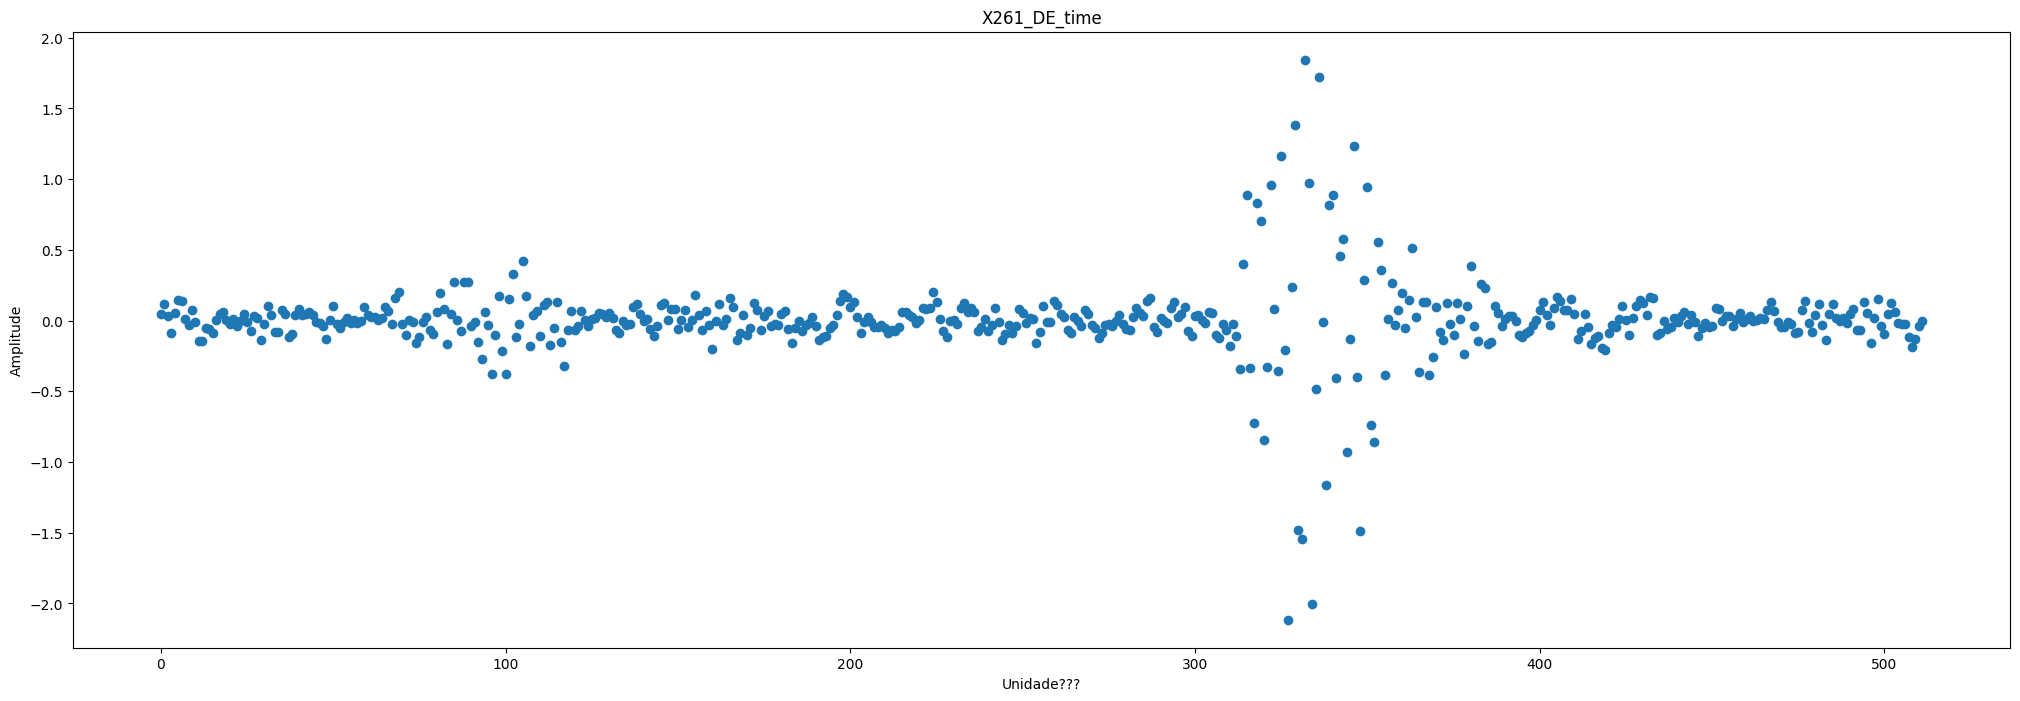

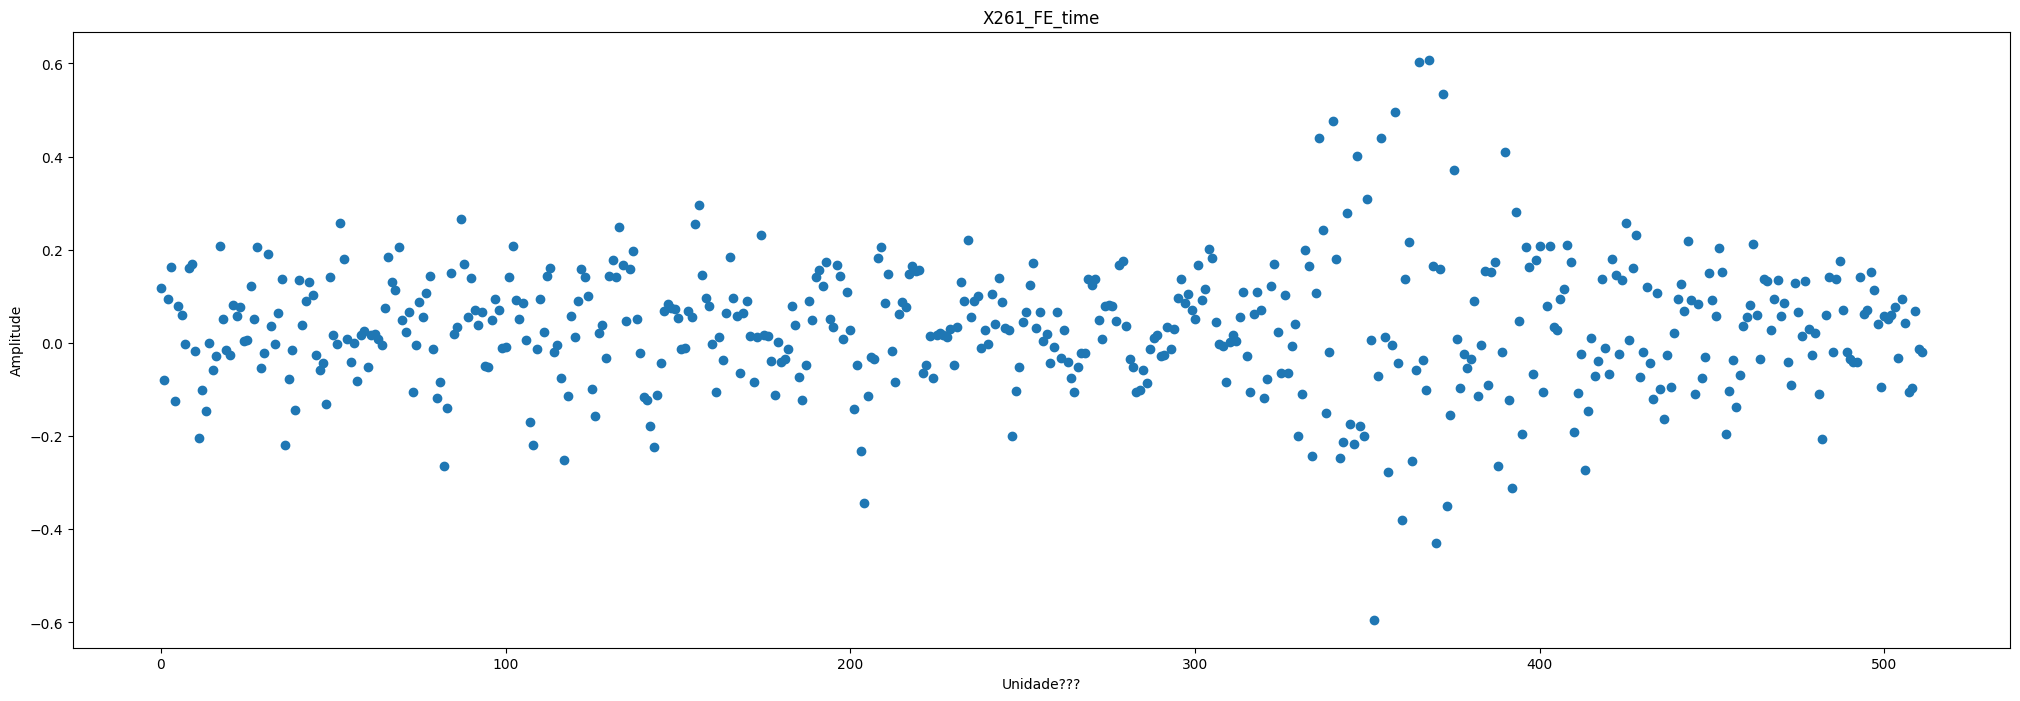

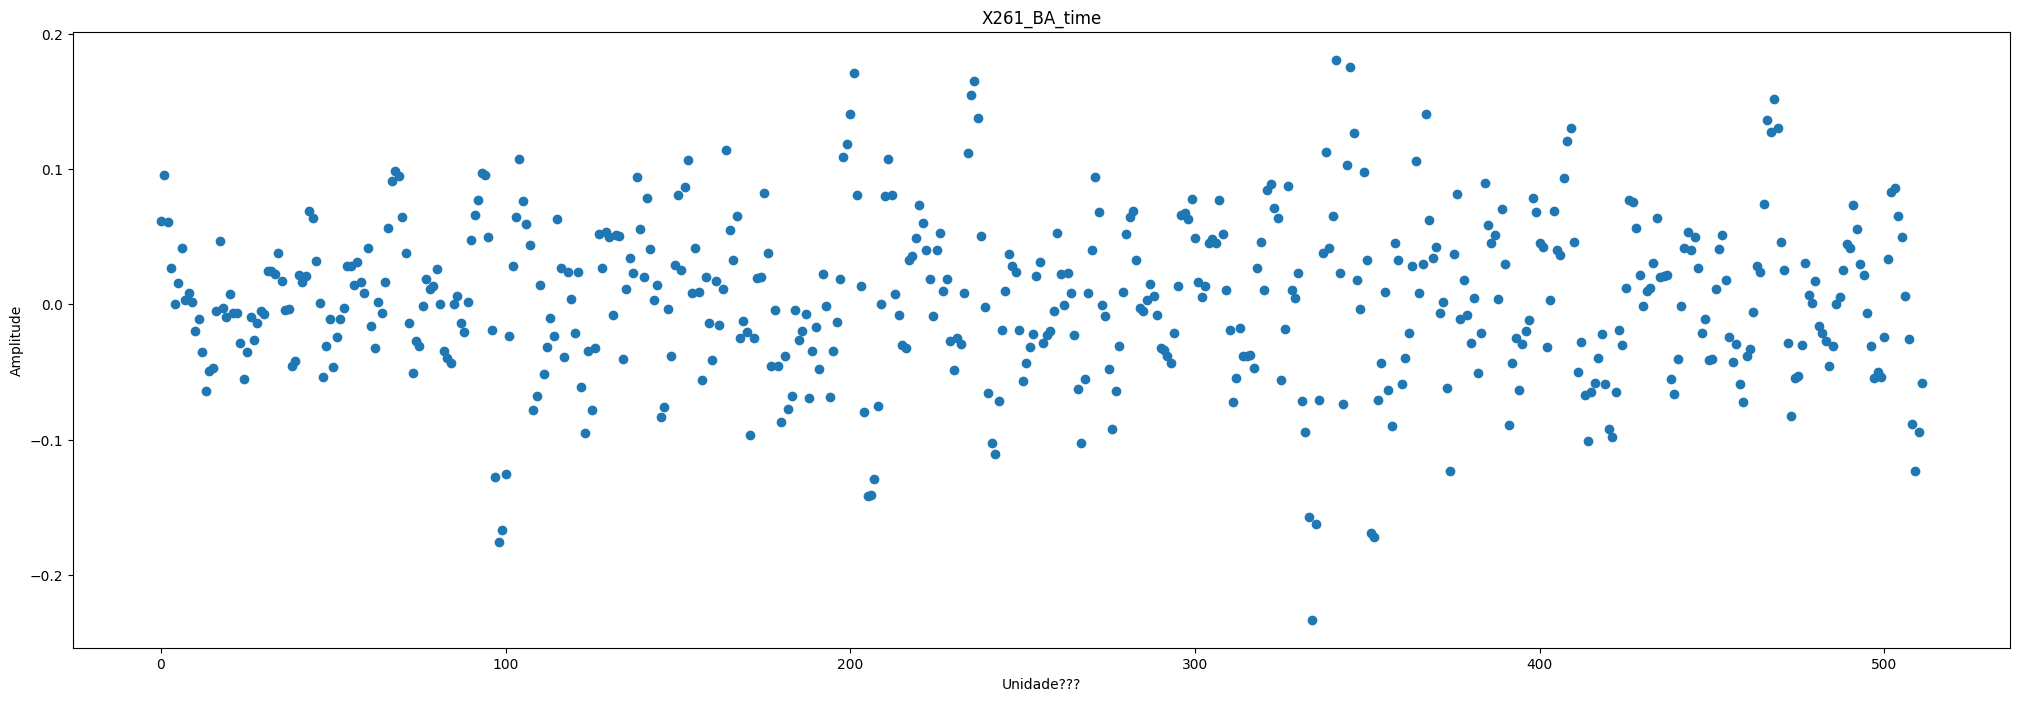

In [82]:
plot_sample(sample_12k)